In [2]:
import numpy as np
import pandas as pd
import pylab as plt
# import seaborn as sns
# sns.set(style="ticks", context="poster")

import astropy.coordinates as ac
_ = ac.galactocentric_frame_defaults.set('v4.0') 
from astropy.coordinates import Angle
import astropy.units as u
from astropy.table import Table
from astropy.io import fits
import gala.coordinates as gc
import galstreams

from pyia import GaiaData

from xdgmm import XDGMM
from sklearn.mixture import GaussianMixture
from astroML.utils import log_multivariate_gaussian

import warnings
warnings.filterwarnings('ignore')

In [2]:
mwsts = galstreams.MWStreams(verbose=False, implement_Off=True)

Initializing galstreams library from master_log... 


In [44]:
#without width
pd.set_option('display.max_columns', None)
mwsts.summary

Imp     On         TrackName          Name  TrackRefs  \
TrackName                                                                
20.0-1-M18        po   True        20.0-1-M18        20.0-1  mateu2018   
300S-F18          st   True          300S-F18          300S     fu2018   
AAU-AliqaUma-L21  st   True  AAU-AliqaUma-L21  AAU-AliqaUma     li2021   
AAU-ATLAS-L21     st   True     AAU-ATLAS-L21     AAU-ATLAS     li2021   
ATLAS-I21         st  False         ATLAS-I21     AAU-ATLAS  ibata2021   
...               ..    ...               ...           ...        ...   
Turbio-S18        ep   True        Turbio-S18        Turbio  shipp2018   
Turranburra-S19   st   True   Turranburra-S19   Turranburra  shipp2019   
Wambelong-S18     ep   True     Wambelong-S18     Wambelong  shipp2018   
Willka_Yaku-S18   ep   True   Willka_Yaku-S18   Willka_Yaku  shipp2018   
Ylgr-I21          st   True          Ylgr-I21          Ylgr  ibata2021   

                       TrackRefsLatex Notes     length        ra_o      dec_o  \
TrackName                                                                       
20.0-1-M18                  Mateu2018     -  36.619756  280.225879 -41.031405   
300S-F18                       Fu2018     -  11.084050  151.800005  16.046962   
AAU-AliqaUma-L21               Li2021     -   9.677187   31.157872 -32.879053   
AAU-ATLAS-L21                  Li2021     -  23.561680    8.928511 -20.206287   
ATLAS-I21                   Ibata2021     -  18.115243   17.350232 -25.248735   
...                               ...   ...        ...         ...        ...   
Turbio-S18        Shipp2018,Shipp2019     -  15.000114   28.000000 -61.000000   
Turranburra-S19   Shipp2019,Shipp2018     -  13.729050   59.707970 -18.554702   
Wambelong-S18     Shipp2018,Shipp2019     -  14.162214   90.500000 -45.600000   
Willka_Yaku-S18   Shipp2018,Shipp2019     -   6.394108   36.100000 -64.600000   
Ylgr-I21                    Ibata2021     -  44.794166  163.803441   2.365532   

                  distance_o        ra_f      dec_f  distance_f      ra_mid  \
TrackName                                                                     
20.0-1-M18         27.652559  311.522817 -16.281973   25.126725  298.182168   
300S-F18           17.963333  163.170009  14.448969   14.350060  157.510431   
AAU-AliqaUma-L21   25.609823   40.876171 -38.486811   30.845905   20.293004   
AAU-ATLAS-L21      18.995105   30.745903 -33.545164   25.557784   19.837356   
ATLAS-I21          24.839015   35.120208 -34.861329   20.394279   25.819117   
...                      ...         ...        ...         ...         ...   
Turbio-S18         16.600000   27.900000 -46.000000   16.600000   27.941104   
Turranburra-S19    27.500000   72.587631 -25.275911   27.500000   67.141164   
Wambelong-S18      15.100000   79.300000 -34.300000   15.100000   84.434473   
Willka_Yaku-S18    34.700000   38.400000 -58.300000   34.700000   37.366336   
Ylgr-I21            8.642171  181.737531 -39.239537   10.046529  172.461343   

                    dec_mid  distance_mid     ra_pole   dec_pole InfoFlags  \
TrackName                                                                    
20.0-1-M18       -29.913159     26.839948  235.758575  38.821881      0000   
300S-F18          15.343949     15.929409  308.056470  72.509388      1101   
AAU-AliqaUma-L21 -26.233552     21.981943   74.259068  47.933124      1111   
AAU-ATLAS-L21    -26.863125     21.478244   74.259068  47.933124      1111   
ATLAS-I21        -30.331205     24.642130   80.544842  44.626077      1110   
...                     ...           ...         ...        ...       ...   
Turbio-S18       -53.500010     16.600000  297.765257  -0.130120      0020   
Turranburra-S19  -22.183041     27.500000  123.473122  53.283631      1010   
Wambelong-S18    -40.084053     15.100000  328.673187 -27.312855      0020   
Willka_Yaku-S18  -61.454796     34.700000  315.982039   4.658813      0020   
Ylgr-I21         -18.343052      9.4

In [3]:
#with widths
pd.set_option('display.max_columns', None)
mwsts.summary

Imp     On         TrackName          Name  TrackRefs  \
TrackName                                                                
20.0-1-M18        po   True        20.0-1-M18        20.0-1  mateu2018   
300S-F18          st   True          300S-F18          300S     fu2018   
AAU-AliqaUma-L21  st   True  AAU-AliqaUma-L21  AAU-AliqaUma     li2021   
AAU-ATLAS-L21     st   True     AAU-ATLAS-L21     AAU-ATLAS     li2021   
ATLAS-I21         st  False         ATLAS-I21     AAU-ATLAS  ibata2021   
...               ..    ...               ...           ...        ...   
Turbio-S18        ep   True        Turbio-S18        Turbio  shipp2018   
Turranburra-S19   st   True   Turranburra-S19   Turranburra  shipp2019   
Wambelong-S18     ep   True     Wambelong-S18     Wambelong  shipp2018   
Willka_Yaku-S18   ep   True   Willka_Yaku-S18   Willka_Yaku  shipp2018   
Ylgr-I21          st   True          Ylgr-I21          Ylgr  ibata2021   

                       TrackRefsLatex  from-Members Notes  width_phi2  \
TrackName                                                               
20.0-1-M18                  Mateu2018         False     -        1.80   
300S-F18                       Fu2018         False     -        0.40   
AAU-AliqaUma-L21               Li2021          True     -        0.26   
AAU-ATLAS-L21                  Li2021          True     -        0.30   
ATLAS-I21                   Ibata2021          True     -        0.30   
...                               ...           ...   ...         ...   
Turbio-S18        Shipp2018,Shipp2019         False     -        0.20   
Turranburra-S19   Shipp2019,Shipp2018          True     -        0.50   
Wambelong-S18     Shipp2018,Shipp2019         False     -        0.40   
Willka_Yaku-S18   Shipp2018,Shipp2019         False     -        0.20   
Ylgr-I21                    Ibata2021          True     -        0.90   

                 width_phi2_Ref  width_pm_phi1_cosphi2  \
TrackName                                                
20.0-1-M18            Riley2020                  -9.00   
300S-F18                 Fu2018                  -9.00   
AAU-AliqaUma-L21   from-Members                   0.16   
AAU-ATLAS-L21      from-Members                   0.14   
ATLAS-I21          from-Members                   0.30   
...                         ...                    ...   
Turbio-S18            Riley2020                  -9.00   
Turranburra-S19    from-Members                   0.10   
Wambelong-S18         Riley2020                  -9.00   
Willka_Yaku-S18       Riley2020                  -9.00   
Ylgr-I21           from-Members                   0.70   

                 width_pm_phi1_cosphi2_Ref  width_pm_phi2 width_pm_phi2_Ref  \
TrackName                                                                     
20.0-1-M18                     -----------          -9.00      ------------   
300S-F18                       -----------          -9.00      ------------   
AAU-AliqaUma-L21              from-Members           0.09      from-Members   
AAU-ATLAS-L21                 from-Members           0.13      from-Members   
ATLAS-I21                     from-Members           0.30      from-Members   
...                                    ...            ...               ...   
Turbio-S18                     -----------          -9.00      ------------   
Turranburra-S19               from-Members           0.10      from-Members   
Wambelong-S18                  -----------          -9.00      ------------   
Willka_Yaku-S18                -----------          -9.00      ------------   
Ylgr-I21                      from-Members           0.60      from-Members   

                  total_v_sigma total_v_sigma_Ref  Lv_stream     L_Ref  \
TrackName                                                                
20.0-1-M18                 -9.0       -----------        0.0  --------   
300S-F18                   -9.0       -----------        0.0  --------   
AAU-AliqaUma-L21         

In [9]:
has_pm = (mwsts.summary.has_pm == 1) 
has_pm2 = (mwsts.summary.has_pm == 2)
(has_pm | has_pm2).sum()

81

In [763]:
mwsts.summary[mwsts.summary.TrackName == 'Pal5-PW19']

Imp    On  TrackName  Name        TrackRefs  \
TrackName                                               
Pal5-PW19  st  True  Pal5-PW19  Pal5  pricewhelan2019   

                            TrackRefsLatex  from-Members Notes  width_phi2  \
TrackName                                                                    
Pal5-PW19  PriceWhelan2019_pal5,Bonaca2020          True    GC         0.0   

          width_phi2_Ref  width_pm_phi1_cosphi2 width_pm_phi1_cosphi2_Ref  \
TrackName                                                                   
Pal5-PW19   from-Members                    0.0              from-Members   

           width_pm_phi2 width_pm_phi2_Ref  total_v_sigma total_v_sigma_Ref  \
TrackName                                                                     
Pal5-PW19            0.0      from-Members           -1.0      from-Members   

           Lv_stream     L_Ref    length        ra_o     dec_o  distance_o  \
TrackName                                                                    
Pal5-PW19        0.0  --------  21.38902  242.093825  6.883095   22.023408   

                ra_f     dec_f  distance_f      ra_mid   dec_mid  \
TrackName                                                          
Pal5-PW19  224.65739 -4.800515   19.088234  229.005945 -0.105794   

           distance_mid     ra_pole   dec_pole InfoFlags  has_empirical_track  \
TrackName                                                                       
Pal5-PW19     20.537974  319.205273 -56.489779      1110                    1   

           has_D  has_pm  has_vrad    DiscoveryRefs  ID  
TrackName                                                
Pal5-PW19      1       1         0  Odenkirchen2001  99

In [761]:
mwsts.get_track_names_for_stream('NGC')

['NGC1261-I21',
 'NGC1851-I21',
 'NGC2298-I21',
 'NGC2298-S20',
 'NGC2808-I21',
 'NGC288-I21',
 'NGC288-S20',
 'NGC3201-I21',
 'NGC3201-P21',
 'Gjoll-I21',
 'NGC5466-G06',
 'NGC5466-I21',
 'NGC5466-J21',
 'NGC6101-I21',
 'NGC6362-S20',
 'NGC6397-I21']

In [248]:
f = fits.open('../catalogs/globular_clusters_Vasiliev&Baumgardt2021.fit')
globs = f[1].data
Name = 'NGC 7089'

vasiliev_st = globs[globs['Name'] == Name]
Table(vasiliev_st)


<Table length=1>
_RAJ2000 _DEJ2000     Name       OName    ... Nstar         SimbadName         recno
float64  float64     str12       str10    ... int32           str26            int32
-------- -------- ------------ ---------- ... ----- -------------------------- -----
 323.363   -0.823 NGC 7089     M 2        ...  3091 NGC 7089                     166

In [247]:
globs_d = pd.read_csv('../catalogs/globular_clusters_Baumgardt&Vasiliev2021.txt', header=0, sep='\s+')

Name_d = 'NGC_7089'
globs_d[globs_d.Cluster == Name_d]

Cluster          RA        DEC       l        b   Rsun e_Rsun   R_GC  \
163  NGC_7089  323.362579  -0.823250  53.371  -35.770  11.69   0.11  10.54   

        RV  e_RV  ...      U    DU       V    DV        W    DW R_PERI  \
163  -3.78  0.30  ...  73.27  0.47  146.63  0.42  -173.80  0.45   0.88   

    e_R_PERI  R_APO e_R_APO  
163     0.06  18.74    0.22  

[1 rows x 31 columns]

In [396]:
from astropy.coordinates import Angle

f = fits.open('../catalogs/darwf_galaxies_localgroup_McConnachie2012.fit')
darwf_galax = f[1].data

skip_galax = darwf_galax[(Angle(darwf_galax['RAJ2000'] + 'hours').value*15 > ra_lim[0]) & (Angle(darwf_galax['RAJ2000'] + 'hours').value*15 < ra_lim[1]) & 
                         (Angle(darwf_galax['DEJ2000'] + 'degrees').value > dec_lim[0]) & (Angle(darwf_galax['DEJ2000'] + 'degrees').value < dec_lim[1])]

In [389]:
Tucana_g = ac.SkyCoord(ra=359.15*u.deg,
                      dec=-59.15*u.deg,
                      distance=25.1*u.kpc) #Drlica-Wagner
Tucana_st = Tucana_g.transform_to(mwsts['TucanaIII-S19'].stream_frame)

In [764]:
st_names = ['Fimbulthul-I21', 'OmegaCen-I21', 'Fjorm-I21', 'M68-I21', 'M68-P19', 'Gjoll-I21', 'NGC3201-I21', 'NGC3201-P21', 'M2-G22', 'M2-I21', 'M5-G19', 'M5-I21', 'M92-I21', 'NGC288-I21', 'NGC2298-I21', 'NGC5466-I21', 'NGC5466-J21', 'Pal5-I21', 'Pal5-PW19', 'TucanaIII-S19', 'NGC1261-I21', 'NGC1851-I21', 'NGC2808-I21', 'NGC6101-I21', 'NGC6397-I21']
c_names = ['NGC 5139', 'NGC 4590', 'NGC 3201', 'NGC 7089', 'NGC 5904', 'NGC 6341', 'NGC 288', 'NGC 2298', 'NGC 5466', 'Pal 5', 'NGC 1261', 'NGC 1851', 'NGC 2808', 'NGC 6101', 'NGC 6397']
d_names = ['NGC_5139', 'NGC_4590','NGC_3201', 'NGC_7089', 'NGC_5904', 'NGC_6341', 'NGC_288', 'NGC_2298', 'NGC_5466', 'Pal_5', 'NGC_1261', 'NGC_1851', 'NGC_2808', 'NGC_6101', 'NGC_6397']

In [361]:
st = 'Pal5-PW19'

if (st == 'Fimbulthul-I21') | (st == 'OmgeaCen-I21'):
    Name, Name_d = 'NGC 5139', 'NGC_5139'
if (st == 'Fjorm-I21') | (st == 'M68-I21') | (st == 'M68-P19'):
    Name, Name_d = 'NGC 4509', 'NGC_4509'
if (st == 'Gjoll-I21') | (st == 'NGC3201-I21') | (st == 'NGC3201-P21'):
    Name, Name_d = 'NGC 3201', 'NGC_3201'
if (st == 'M2-G22') | (st == 'M2-I21') | (st == 'M5-G19'):
    Name, Name_d = 'NGC 7089', 'NGC_7089'
if (st == 'M5-G19') | (st == 'M5-I21'):
    Name, Name_d = 'NGC 5904', 'NGC_5904'
if (st == 'M92-I21'):
    Name, Name_d = 'NGC 6341', 'NGC_6341'
if (st == 'NGC288-I21'):
    Name, Name_d = 'NGC 288', 'NGC_288'
if (st == 'NGC2298-I21'):
    Name, Name_d = 'NGC 2298', 'NGC_2298'
if (st == 'NGC5466-I21') | (st == 'NGC5466-J21'):
    Name, Name_d = 'NGC 5466', 'NGC_5466'
if (st == 'Pal5-I21') | (st == 'Pal5-PW19'):
    Name, Name_d = 'Pal 5', 'Pal_5'

# Widths

In [765]:
st_names = ['Fimbulthul-I21', 'OmegaCen-I21', 'Fjorm-I21', 'M68-I21', 'M68-P19', 'Gjoll-I21', 'NGC3201-I21', 'NGC3201-P21', 'M2-G22', 'M2-I21', 'M5-G19', 'M5-I21', 'M92-I21', 'NGC288-I21', 'NGC2298-I21', 'NGC5466-I21', 'NGC5466-J21', 'Pal5-I21', 'Pal5-PW19', 'TucanaIII-S19', 'NGC1261-I21', 'NGC1851-I21', 'NGC2808-I21', 'NGC6101-I21', 'NGC6397-I21']
print(len(st_names))

25


In [766]:
widths_galstreams = mwsts.summary.loc[mwsts.summary.TrackName.isin(st_names), ['width_phi2', 'width_phi2_Ref', 'width_pm_phi1_cosphi2',	'width_pm_phi1_cosphi2_Ref', 'width_pm_phi2', 'width_pm_phi2_Ref']].sort_values('TrackName')
widths_galstreams

width_phi2 width_phi2_Ref  width_pm_phi1_cosphi2  \
TrackName                                                          
Fimbulthul-I21         0.1   from-Members                    0.4   
Fjorm-I21              0.0   from-Members                    0.0   
Gjoll-I21              0.7   from-Members                    1.0   
M2-G22                 0.8   from-Members                    0.2   
M2-I21                 0.2         visual                   -9.0   
M5-G19                 0.0   from-Members                    0.5   
M5-I21                 0.4   from-Members                    0.8   
M68-I21                0.0   from-Members                    0.0   
M68-P19                0.7   from-Members                    0.3   
M92-I21                1.4   from-Members                    0.8   
NGC1261-I21            3.0         visual                   -9.0   
NGC1851-I21            2.3         visual                   -9.0   
NGC2298-I21            0.4         visual                   -9.0   
NGC2808-I21            0.6         visual                   -9.0   
NGC288-I21             1.3         visual                   -9.0   
NGC3201-I21            0.7   from-Members                    1.0   
NGC3201-P21            0.7   from-Members                    0.6   
NGC5466-I21            0.3         visual                   -9.0   
NGC5466-J21            1.2   from-Members                    0.2   
NGC6101-I21            0.4         visual                   -9.0   
NGC6397-I21            0.5   from-Members                    0.4   
OmegaCen-I21           2.4         visual                   -9.0   
Pal5-I21               0.4   from-Members                    0.5   
Pal5-PW19              0.0   from-Members                    0.0   
TucanaIII-S19          0.1   from-Members                    0.1   

               width_pm_phi1_cosphi2_Ref  width_pm_phi2 width_pm_phi2_Ref  
TrackName                                                                  
Fimbulthul-I21              from-Members            0.2      from-Members  
Fjorm-I21                   from-Members            0.0      from-Members  
Gjoll-I21                   from-Members            0.3      from-Members  
M2-G22                      from-Members            0.2      from-Members  
M2-I21                       -----------           -9.0      ------------  
M5-G19                      from-Members            0.4      from-Members  
M5-I21                      from-Members            0.9      from-Members  
M68-I21                     from-Members            0.0      from-Members  
M68-P19                     from-Members            0.5      from-Members  
M92-I21                     from-Members            0.8      from-Members  
NGC1261-I21                  -----------           -9.0      ------------  
NGC1851-I21                  -----------           -9.0      ------------  
NGC2298-I21                  -----------           -9.0      ------------  
NGC2808-I21                  -----------           -9.0      ------------  
NGC288-I21                   -----------           -9.0      ------------  
NGC3201-I21                 from-Members            0.3      from-Members  
NGC3201-P21                 from-Members            0.4      from-Members  
NGC5466-I21                  -----------           -9.0      ------------  
NGC5466-J21                 from-Members            0.3      from-Members  
NGC6101-I21                  -----------           -9.0      ------------  
NGC6397-I21                 from-Members            0.6      from-Members  
OmegaCen-I21                 -----------           -9.0      ------------  
Pal5-I21                    from-Members            0.3      from-Members  
Pal5-PW19                   from-Members            0.0      from-Members  
TucanaIII-S19               from-Members            0.1      from-Members

In [849]:
# widths = pd.DataFrame(columns = ['width_phi2', 'width_dist', 'width_pmphi1', 'width_pmphi2'], index = st_names)
# widths.index.name = 'TrackName'
widths.sort_values('TrackName')
# widths.to_csv('widths_st_cluster.csv')#, index=False)

width_phi2 width_dist width_pmphi1 width_pmphi2
TrackName                                                     
Fimbulthul-I21   3.824924    0.78802     3.412031     3.736645
Fjorm-I21        2.847056   1.154675     1.494764     1.263825
Gjoll-I21         0.69876   0.307324     2.254171     0.478484
M2-G22           4.679204        0.0     2.167662     0.424777
M2-I21           0.501923    1.20532     0.853582     0.327026
M5-G19           1.135932   1.006221     1.210678     0.573935
M5-I21           0.424955   0.638833     0.828208     0.936785
M68-I21          0.516401   0.404418     1.416439     0.689793
M68-P19          2.303455   3.086828     1.490779     0.861307
M92-I21          2.121984   1.503154     0.875972     1.075951
NGC1261-I21      1.297877   4.693632     0.452035     0.349501
NGC1851-I21      2.442767   3.593385     0.148716     0.095102
NGC2298-I21      0.501923    1.20532     0.853582     0.327026
NGC2808-I21      0.510359   2.291752     1.777029     0.940116
NGC288-I21       0.885729   0.733475     0.271176     0.315491
NGC3201-I21      0.659707   0.808572     1.558403      0.59159
NGC3201-P21      2.500204   2.905074    10.730593     0.791338
NGC5466-I21      0.501923    1.20532     0.853582     0.327026
NGC5466-J21      1.202667   3.381192     0.553975     0.382638
NGC6101-I21      0.501923    1.20532     0.853582     0.327026
NGC6397-I21      0.585611   0.087273      0.65705      0.76483
OmegaCen-I21     3.824924    0.78802     3.412031     3.736645
Pal5-I21         0.772193   3.052754     0.530438     0.379372
Pal5-PW19        0.870904   1.151671     0.379799      0.29421
TucanaIII-S19     0.11786   4.836893     0.140064      0.11077

In [784]:
I21 = pd.read_csv('../catalogs/streams/members/ibata2021.tab01.wnames.cat', header=0, sep=' ')

M68_P19 = pd.read_csv('../catalogs/streams/members/palau2019.m68.tableE1.csv')

NGC3201_P21 = pd.read_csv('../catalogs/streams/members/palau2020.ngc3201.tableC1.csv')

M2_G22 =  pd.read_csv('../catalogs/streams/members/grillmair2022.m2.tables1and2.dat', header=0, sep='\s+')

M2_I21radec = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_M2_radec.csv', header=None)
M2_I21rad = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_M2_rad.csv', header=None)
M2_I21rapmra = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_M2_rapmra.csv', header=None)
M2_I21rapmdec = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_M2_rapmdec.csv', header=None)

M5_G19 =  pd.read_csv('../catalogs/streams/members/grillmair2019.m5.table1.dat', header=0, sep='\s+')

NGC2298_I21radec = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_NGC2298_radec.csv', header=None)
NGC2298_I21rad = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_NGC2298_rad.csv', header=None)
NGC2298_I21rapmra = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_NGC2298_rapmra.csv', header=None)
NGC2298_I21rapmdec = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_NGC2298_rapmdec.csv', header=None)

NGC1261_I21radec = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_NGC1261_radec.csv', header=None)
NGC1261_I21rad = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_NGC1261_rad.csv', header=None)
NGC1261_I21rapmra = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_NGC1261_rapmra.csv', header=None)
NGC1261_I21rapmdec = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_NGC1261_rapmdec.csv', header=None)

NGC1851_I21radec = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_NGC1851_radec.csv', header=None)
NGC1851_I21rad = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_NGC1851_rad.csv', header=None)
NGC1851_I21rapmra = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_NGC1851_rapmra.csv', header=None)
NGC1851_I21rapmdec = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_NGC1851_rapmdec.csv', header=None)

NGC2808_I21radec = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_NGC2808_radec.csv', header=None)
NGC2808_I21rad = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_NGC2808_rad.csv', header=None)
NGC2808_I21rapmra = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_NGC2808_rapmra.csv', header=None)
NGC2808_I21rapmdec = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_NGC2808_rapmdec.csv', header=None)

NGC288_I21radec = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_NGC288_radec.csv', header=None)
NGC288_I21rad = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_NGC288_rad.csv', header=None)
NGC288_I21rapmra = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_NGC288_rapmra.csv', header=None)
NGC288_I21rapmdec = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_NGC288_rapmdec.csv', header=None)

NGC5466_I21radec = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_NGC5466_radec.csv', header=None)
NGC5466_I21rad = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_NGC5466_rad.csv', header=None)
NGC5466_I21rapmra = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_NGC5466_rapmra.csv', header=None)
NGC5466_I21rapmdec = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_NGC5466_rapmdec.csv', header=None)

NGC5466_J21 = pd.read_csv('../catalogs/streams/members/jensen2021.ngc5466.csv')

NGC6101_I21radec = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_NGC6101_radec.csv', header=None)
NGC6101_I21rad = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_NGC6101_rad.csv', header=None)
NGC6101_I21rapmra = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_NGC6101_rapmra.csv', header=None)
NGC6101_I21rapmdec = pd.read_csv('../catalogs/streams/members/ibata21_figs13_14/Ibata21_Fig14_NGC6101_rapmdec.csv', header=None)

f = fits.open('../catalogs/streams/pal5/RRLwithprobthin.fit')
Pal5_PW19 = f[1].data

S19 = pd.read_csv('../catalogs/streams/members/shipp2019.stream_members.tab7.gedr3.csv')



f = fits.open('../catalogs/globular_clusters_Vasiliev&Baumgardt2021.fit')
globs = f[1].data
globs_d = pd.read_csv('../catalogs/globular_clusters_Baumgardt&Vasiliev2021.txt', header=0, sep='\s+')

## Fimbulthul - OmegaCen

Fimbulthul-21 y OmegaCen-21 son iguales en galstreams?? Capaz que solo en la versión de width-track, chequear.. (en el paper no son iguales), en la tabla de ibata (wnames) no hay distinción entre ambos: OmegaCen-Fimbulthul

In [724]:
globs_ = globs[globs['Name'] == 'NGC 5139']

globs_d = pd.read_csv('../catalogs/globular_clusters_Baumgardt&Vasiliev2021.txt', header=0, sep='\s+')
globs_d_ = globs_d[globs_d.Cluster == 'NGC_5139']

glob_g = ac.SkyCoord(ra=globs_.RAJ2000[0]*u.deg,
                      dec=globs_.DEJ2000[0]*u.deg,
                      distance=float(globs_d_.Rsun.values[0])*u.kpc,
                      pm_ra_cosdec=globs_.pmRA[0]*u.mas/u.yr,
                      pm_dec=globs_.pmDE[0]*u.mas/u.yr,
                      radial_velocity=0*u.km/u.s)

width_phi2: 3.8249235546958325
width_pmphi1: 3.412030593865834
width_pmphi2: 3.7366452506756556
width_dist: 0.7880195412166028


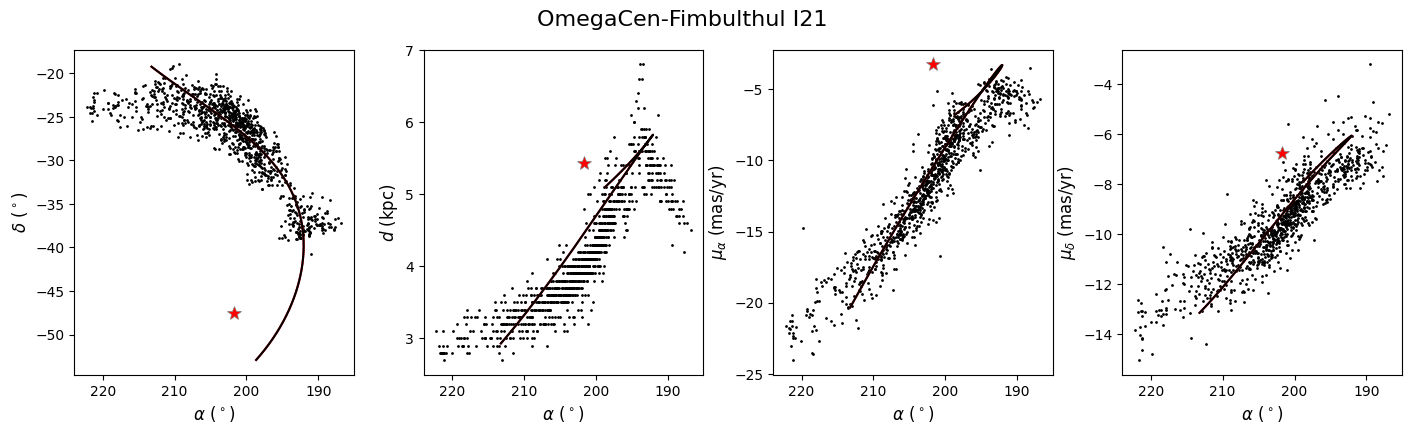

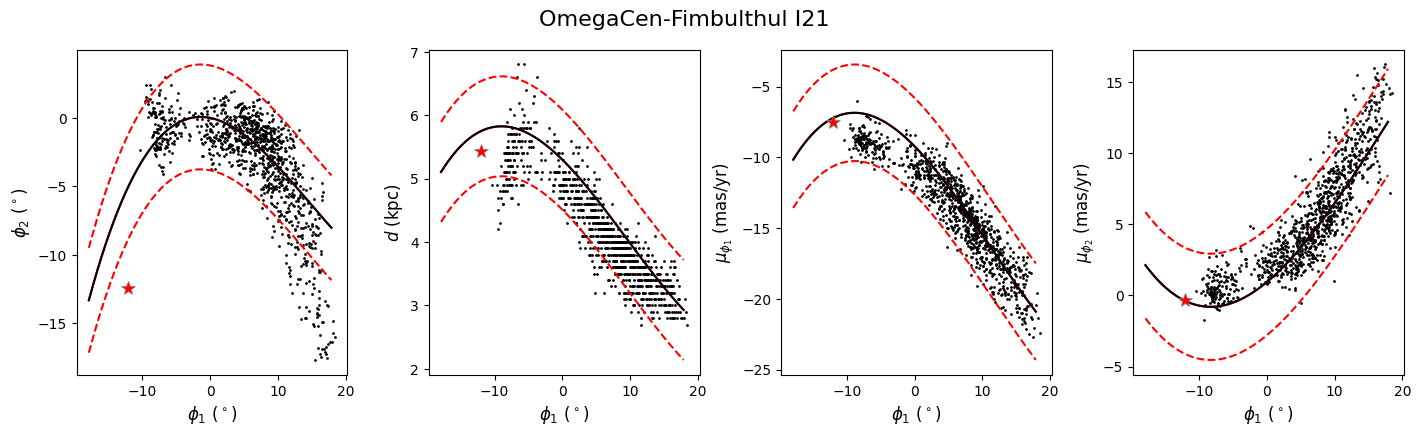

In [651]:
glob_st = glob_g.transform_to(mwsts['Fimbulthul-I21'].stream_frame)
n=2 #numero de medios sigmas a cada lado de la media (n=2 hay 1sigma a cada lado)

Fimbulthul_I21 = I21[I21.StreamName == 'OmegaCen-Fimbulthul']
Fimbulthul_I21_g = ac.SkyCoord(ra=np.array(Fimbulthul_I21.ra_epoch2000)*u.deg,
                                  dec=np.array(Fimbulthul_I21.dec_epoch2000)*u.deg,
                                  distance=np.array(Fimbulthul_I21.dis)*u.kpc,
                                  pm_ra_cosdec=np.array(Fimbulthul_I21.pmra)*u.mas/u.yr,
                                  pm_dec=np.array(Fimbulthul_I21.pmdec)*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(Fimbulthul_I21.pmdec))*u.km/u.s)
    
Fimbulthul_I21_c = Fimbulthul_I21_g.transform_to(mwsts['Fimbulthul-I21'].stream_frame)


print('width_phi2:',np.std(Fimbulthul_I21_c.phi2.value))
print('width_pmphi1:',np.std(Fimbulthul_I21_c.pm_phi1_cosphi2.value))
print('width_pmphi2:',np.std(Fimbulthul_I21_c.pm_phi2.value))
print('width_dist:',np.std(Fimbulthul_I21_g.distance.value))

widths.loc['Fimbulthul-I21'].width_phi2 = np.std(Fimbulthul_I21_c.phi2.value)
widths.loc['Fimbulthul-I21'].width_dist = np.std(Fimbulthul_I21_g.distance.value)
widths.loc['Fimbulthul-I21'].width_pmphi1 = np.std(Fimbulthul_I21_c.pm_phi1_cosphi2.value)
widths.loc['Fimbulthul-I21'].width_pmphi2 = np.std(Fimbulthul_I21_c.pm_phi2.value)

widths.loc['OmegaCen-I21'].width_phi2 = np.std(Fimbulthul_I21_c.phi2.value)
widths.loc['OmegaCen-I21'].width_dist = np.std(Fimbulthul_I21_g.distance.value)
widths.loc['OmegaCen-I21'].width_pmphi1 = np.std(Fimbulthul_I21_c.pm_phi1_cosphi2.value)
widths.loc['OmegaCen-I21'].width_pmphi2 = np.std(Fimbulthul_I21_c.pm_phi2.value)

fig=plt.figure(1,figsize=(15,5))    
fig.subplots_adjust(wspace=0.25,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax=fig.add_subplot(141)
ax.plot(mwsts['Fimbulthul-I21'].track.ra, mwsts['Fimbulthul-I21'].track.dec,'-k', lw=1.5, zorder=99)
ax.plot(mwsts['OmegaCen-I21'].track.ra, mwsts['OmegaCen-I21'].track.dec,'-',c='red', lw=1.5,zorder=98)
ax.plot(Fimbulthul_I21_g.ra, Fimbulthul_I21_g.dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\delta$ ($^\circ$)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(142)
ax.plot(mwsts['Fimbulthul-I21'].track.ra, mwsts['Fimbulthul-I21'].track.distance,'-k', lw=1.5, zorder=99)
ax.plot(mwsts['OmegaCen-I21'].track.ra, mwsts['OmegaCen-I21'].track.distance,'-',c='red', lw=1.5,zorder=98)
ax.plot(Fimbulthul_I21_g.ra, Fimbulthul_I21_g.distance,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$d$ (kpc)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(143)
ax.plot(mwsts['Fimbulthul-I21'].track.ra, mwsts['Fimbulthul-I21'].track.pm_ra_cosdec,'-k', lw=1.5,zorder=99)
ax.plot(mwsts['OmegaCen-I21'].track.ra, mwsts['OmegaCen-I21'].track.pm_ra_cosdec,'-',c='red', lw=1.5,zorder=98)
ax.plot(Fimbulthul_I21_g.ra, Fimbulthul_I21_g.pm_ra_cosdec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_ra_cosdec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\\alpha$ (mas/yr)',fontsize=12)
ax.invert_xaxis()


ax=fig.add_subplot(144)
ax.plot(mwsts['Fimbulthul-I21'].track.ra, mwsts['Fimbulthul-I21'].track.pm_dec,'-k', lw=1.5,zorder=100)
ax.plot(mwsts['OmegaCen-I21'].track.ra, mwsts['OmegaCen-I21'].track.pm_dec,'-',c='red', lw=1.5,zorder=99)
ax.plot(Fimbulthul_I21_g.ra, Fimbulthul_I21_g.pm_dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\delta$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

plt.suptitle('OmegaCen-Fimbulthul I21',fontsize=16);



fig2=plt.figure(2,figsize=(15,5))    
fig2.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax2=fig2.add_subplot(141)
ax2.plot(mwsts['Fimbulthul-I21'].track.transform_to(mwsts['Fimbulthul-I21'].stream_frame).phi1, mwsts['Fimbulthul-I21'].track.transform_to(mwsts['Fimbulthul-I21'].stream_frame).phi2,'-k', lw=1.5, zorder=99)
ax2.plot(mwsts['OmegaCen-I21'].track.transform_to(mwsts['Fimbulthul-I21'].stream_frame).phi1, mwsts['OmegaCen-I21'].track.transform_to(mwsts['Fimbulthul-I21'].stream_frame).phi2,'-',c='red', lw=1.5,zorder=98)
ax2.plot(Fimbulthul_I21_c.phi1, Fimbulthul_I21_c.phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['Fimbulthul-I21'].track.transform_to(mwsts['Fimbulthul-I21'].stream_frame).phi1, mwsts['Fimbulthul-I21'].track.transform_to(mwsts['Fimbulthul-I21'].stream_frame).phi2 + n*widths.loc['Fimbulthul-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['Fimbulthul-I21'].track.transform_to(mwsts['Fimbulthul-I21'].stream_frame).phi1, mwsts['Fimbulthul-I21'].track.transform_to(mwsts['Fimbulthul-I21'].stream_frame).phi2 - n*widths.loc['Fimbulthul-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\phi_2$ ($^\circ$)',fontsize=12)

ax2=fig2.add_subplot(142)
ax2.plot(mwsts['Fimbulthul-I21'].track.transform_to(mwsts['Fimbulthul-I21'].stream_frame).phi1, mwsts['Fimbulthul-I21'].track.distance,'-k', lw=1.5, zorder=99)
ax2.plot(mwsts['OmegaCen-I21'].track.transform_to(mwsts['Fimbulthul-I21'].stream_frame).phi1, mwsts['OmegaCen-I21'].track.distance,'-',c='red', lw=1.5,zorder=98)
ax2.plot(Fimbulthul_I21_c.phi1, Fimbulthul_I21_g.distance,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['Fimbulthul-I21'].track.transform_to(mwsts['Fimbulthul-I21'].stream_frame).phi1, mwsts['Fimbulthul-I21'].track.distance + n*widths.loc['Fimbulthul-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['Fimbulthul-I21'].track.transform_to(mwsts['Fimbulthul-I21'].stream_frame).phi1, mwsts['Fimbulthul-I21'].track.distance - n*widths.loc['Fimbulthul-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$d$ (kpc)',fontsize=12)

ax2=fig2.add_subplot(143)
ax2.plot(mwsts['Fimbulthul-I21'].track.transform_to(mwsts['Fimbulthul-I21'].stream_frame).phi1, mwsts['Fimbulthul-I21'].track.transform_to(mwsts['Fimbulthul-I21'].stream_frame).pm_phi1_cosphi2,'-k', lw=1.5,zorder=99)
ax2.plot(mwsts['OmegaCen-I21'].track.transform_to(mwsts['Fimbulthul-I21'].stream_frame).phi1, mwsts['OmegaCen-I21'].track.transform_to(mwsts['Fimbulthul-I21'].stream_frame).pm_phi1_cosphi2,'-',c='red', lw=1.5,zorder=98)
ax2.plot(Fimbulthul_I21_c.phi1, Fimbulthul_I21_c.pm_phi1_cosphi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi1_cosphi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['Fimbulthul-I21'].track.transform_to(mwsts['Fimbulthul-I21'].stream_frame).phi1, mwsts['Fimbulthul-I21'].track.transform_to(mwsts['Fimbulthul-I21'].stream_frame).pm_phi1_cosphi2 + n*widths.loc['Fimbulthul-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['Fimbulthul-I21'].track.transform_to(mwsts['Fimbulthul-I21'].stream_frame).phi1, mwsts['Fimbulthul-I21'].track.transform_to(mwsts['Fimbulthul-I21'].stream_frame).pm_phi1_cosphi2 - n*widths.loc['Fimbulthul-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_1}$ (mas/yr)',fontsize=12)

ax2=fig2.add_subplot(144)
ax2.plot(mwsts['Fimbulthul-I21'].track.transform_to(mwsts['Fimbulthul-I21'].stream_frame).phi1, mwsts['Fimbulthul-I21'].track.transform_to(mwsts['Fimbulthul-I21'].stream_frame).pm_phi2,'-k', lw=1.5,zorder=100)
ax2.plot(mwsts['OmegaCen-I21'].track.transform_to(mwsts['Fimbulthul-I21'].stream_frame).phi1, mwsts['OmegaCen-I21'].track.transform_to(mwsts['Fimbulthul-I21'].stream_frame).pm_phi2,'-',c='red', lw=1.5,zorder=99)
ax2.plot(Fimbulthul_I21_c.phi1, Fimbulthul_I21_c.pm_phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['Fimbulthul-I21'].track.transform_to(mwsts['Fimbulthul-I21'].stream_frame).phi1, mwsts['Fimbulthul-I21'].track.transform_to(mwsts['Fimbulthul-I21'].stream_frame).pm_phi2 + n*widths.loc['Fimbulthul-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['Fimbulthul-I21'].track.transform_to(mwsts['Fimbulthul-I21'].stream_frame).phi1, mwsts['Fimbulthul-I21'].track.transform_to(mwsts['Fimbulthul-I21'].stream_frame).pm_phi2 - n*widths.loc['Fimbulthul-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_2}$ (mas/yr)',fontsize=12)

plt.suptitle('OmegaCen-Fimbulthul I21',fontsize=16);

## Fjorm - M68

Los tracks de Fjorm-21 y M68-21 en esta versión son iguales también

In [720]:
globs_ = globs[globs['Name'] == 'NGC 4590']

globs_d = pd.read_csv('../catalogs/globular_clusters_Baumgardt&Vasiliev2021.txt', header=0, sep='\s+')
globs_d_ = globs_d[globs_d.Cluster == 'NGC_4590']

glob_g = ac.SkyCoord(ra=globs_.RAJ2000[0]*u.deg,
                      dec=globs_.DEJ2000[0]*u.deg,
                      distance=float(globs_d_.Rsun.values[0])*u.kpc,
                      pm_ra_cosdec=globs_.pmRA[0]*u.mas/u.yr,
                      pm_dec=globs_.pmDE[0]*u.mas/u.yr,
                      radial_velocity=0*u.km/u.s)

width_phi2: 2.847055896316922
width_pmphi1: 1.4947635841462075
width_pmphi2: 1.2638254690481345
width_dist: 1.1546747878881305


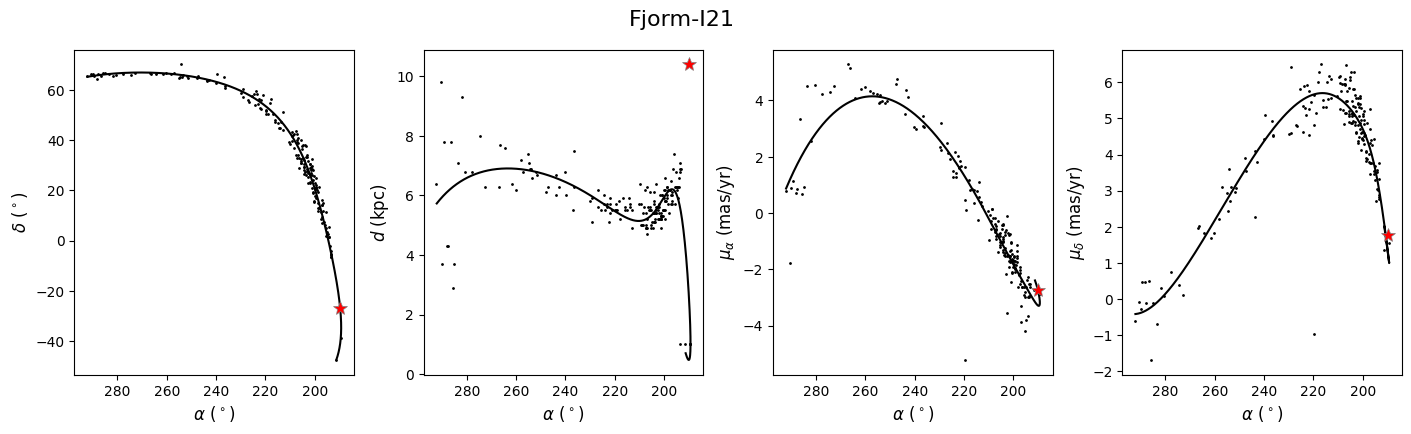

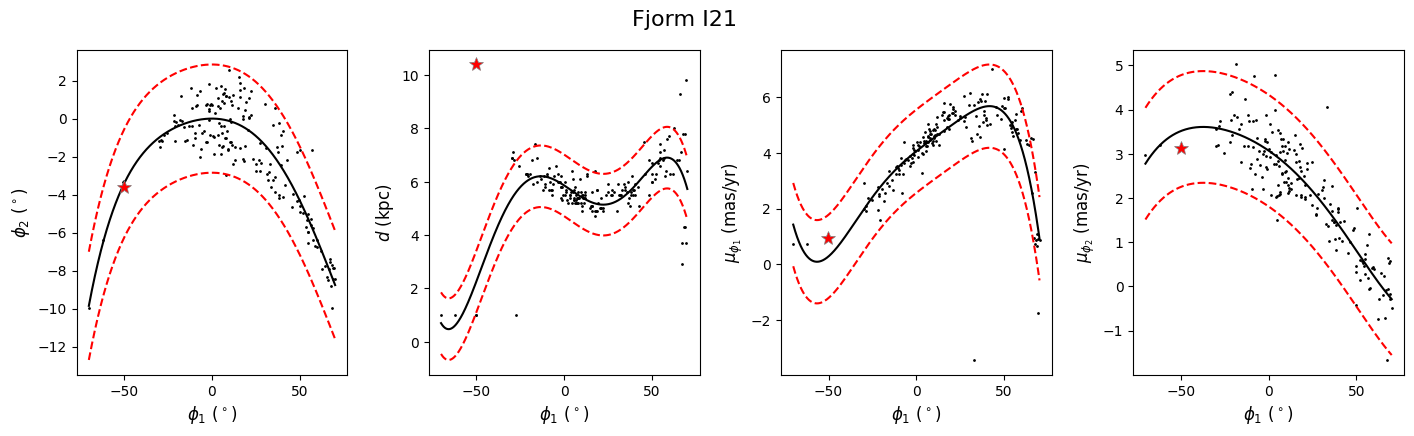

In [721]:
glob_st = glob_g.transform_to(mwsts['Fjorm-I21'].stream_frame)


Fjorm_I21 = I21[I21.StreamName=='Fjorm']

Fjorm_I21_g = ac.SkyCoord(ra=np.array(Fjorm_I21.ra_epoch2000)*u.deg,
                                  dec=np.array(Fjorm_I21.dec_epoch2000)*u.deg,
                                  distance=np.array(Fjorm_I21.dis)*u.kpc,
                                  pm_ra_cosdec=np.array(Fjorm_I21.pmra)*u.mas/u.yr,
                                  pm_dec=np.array(Fjorm_I21.pmdec)*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(Fjorm_I21.pmdec))*u.km/u.s)
    
Fjorm_I21_c = Fjorm_I21_g.transform_to(mwsts['Fjorm-I21'].stream_frame)

print('width_phi2:',np.std(Fjorm_I21_c.phi2.value))
print('width_pmphi1:',np.std(Fjorm_I21_c.pm_phi1_cosphi2.value))
print('width_pmphi2:',np.std(Fjorm_I21_c.pm_phi2.value))
print('width_dist:',np.std(Fjorm_I21_g.distance.value))

widths.loc['Fjorm-I21'].width_phi2 = np.std(Fjorm_I21_c.phi2.value)
widths.loc['Fjorm-I21'].width_dist = np.std(Fjorm_I21_g.distance.value)
widths.loc['Fjorm-I21'].width_pmphi1 = np.std(Fjorm_I21_c.pm_phi1_cosphi2.value)
widths.loc['Fjorm-I21'].width_pmphi2 = np.std(Fjorm_I21_c.pm_phi2.value)


fig=plt.figure(1,figsize=(15,5))    
fig.subplots_adjust(wspace=0.25,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax=fig.add_subplot(141)
ax.plot(mwsts['Fjorm-I21'].track.ra, mwsts['Fjorm-I21'].track.dec,'-k', lw=1.5, zorder=99)
ax.plot(Fjorm_I21_g.ra, Fjorm_I21_g.dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\delta$ ($^\circ$)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(142)
ax.plot(mwsts['Fjorm-I21'].track.ra, mwsts['Fjorm-I21'].track.distance,'-k', lw=1.5, zorder=99)
ax.plot(Fjorm_I21_g.ra, Fjorm_I21_g.distance,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$d$ (kpc)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(143)
ax.plot(mwsts['Fjorm-I21'].track.ra, mwsts['Fjorm-I21'].track.pm_ra_cosdec,'-k', lw=1.5,zorder=99)
ax.plot(Fjorm_I21_g.ra, Fjorm_I21_g.pm_ra_cosdec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_ra_cosdec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\\alpha$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(144)
ax.plot(mwsts['Fjorm-I21'].track.ra, mwsts['Fjorm-I21'].track.pm_dec,'-k', lw=1.5,zorder=100)
ax.plot(Fjorm_I21_g.ra, Fjorm_I21_g.pm_dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\delta$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

plt.suptitle('Fjorm-I21',fontsize=16);


fig2=plt.figure(2,figsize=(15,5))    
fig2.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax2=fig2.add_subplot(141)
ax2.plot(mwsts['Fjorm-I21'].track.transform_to(mwsts['Fjorm-I21'].stream_frame).phi1, mwsts['Fjorm-I21'].track.transform_to(mwsts['Fjorm-I21'].stream_frame).phi2,'-k', lw=1.5, zorder=99)
ax2.plot(Fjorm_I21_c.phi1, Fjorm_I21_c.phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['Fjorm-I21'].track.transform_to(mwsts['Fjorm-I21'].stream_frame).phi1, mwsts['Fjorm-I21'].track.transform_to(mwsts['Fjorm-I21'].stream_frame).phi2 + n*widths.loc['Fjorm-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['Fjorm-I21'].track.transform_to(mwsts['Fjorm-I21'].stream_frame).phi1, mwsts['Fjorm-I21'].track.transform_to(mwsts['Fjorm-I21'].stream_frame).phi2 - n*widths.loc['Fjorm-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\phi_2$ ($^\circ$)',fontsize=12)

ax2=fig2.add_subplot(142)
ax2.plot(mwsts['Fjorm-I21'].track.transform_to(mwsts['Fjorm-I21'].stream_frame).phi1, mwsts['Fjorm-I21'].track.distance,'-k', lw=1.5, zorder=99)
ax2.plot(Fjorm_I21_c.phi1, Fjorm_I21_g.distance,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['Fjorm-I21'].track.transform_to(mwsts['Fjorm-I21'].stream_frame).phi1, mwsts['Fjorm-I21'].track.distance + n*widths.loc['Fjorm-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['Fjorm-I21'].track.transform_to(mwsts['Fjorm-I21'].stream_frame).phi1, mwsts['Fjorm-I21'].track.distance - n*widths.loc['Fjorm-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$d$ (kpc)',fontsize=12)

ax2=fig2.add_subplot(143)
ax2.plot(mwsts['Fjorm-I21'].track.transform_to(mwsts['Fjorm-I21'].stream_frame).phi1, mwsts['Fjorm-I21'].track.transform_to(mwsts['Fjorm-I21'].stream_frame).pm_phi1_cosphi2,'-k', lw=1.5,zorder=99)
ax2.plot(Fjorm_I21_c.phi1, Fjorm_I21_c.pm_phi1_cosphi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi1_cosphi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['Fjorm-I21'].track.transform_to(mwsts['Fjorm-I21'].stream_frame).phi1, mwsts['Fjorm-I21'].track.transform_to(mwsts['Fjorm-I21'].stream_frame).pm_phi1_cosphi2 + n*widths.loc['Fjorm-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['Fjorm-I21'].track.transform_to(mwsts['Fjorm-I21'].stream_frame).phi1, mwsts['Fjorm-I21'].track.transform_to(mwsts['Fjorm-I21'].stream_frame).pm_phi1_cosphi2 - n*widths.loc['Fjorm-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_1}$ (mas/yr)',fontsize=12)

ax2=fig2.add_subplot(144)
ax2.plot(mwsts['Fjorm-I21'].track.transform_to(mwsts['Fjorm-I21'].stream_frame).phi1, mwsts['Fjorm-I21'].track.transform_to(mwsts['Fjorm-I21'].stream_frame).pm_phi2,'-k', lw=1.5,zorder=100)
ax2.plot(Fjorm_I21_c.phi1, Fjorm_I21_c.pm_phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['Fjorm-I21'].track.transform_to(mwsts['Fjorm-I21'].stream_frame).phi1, mwsts['Fjorm-I21'].track.transform_to(mwsts['Fjorm-I21'].stream_frame).pm_phi2 + n*widths.loc['Fjorm-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['Fjorm-I21'].track.transform_to(mwsts['Fjorm-I21'].stream_frame).phi1, mwsts['Fjorm-I21'].track.transform_to(mwsts['Fjorm-I21'].stream_frame).pm_phi2 - n*widths.loc['Fjorm-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_2}$ (mas/yr)',fontsize=12)

plt.suptitle('Fjorm I21',fontsize=16);

width_phi2: 0.5164005831656708
width_pmphi1: 1.41643895655709
width_pmphi2: 0.6897931106666925
width_dist: 0.4044177530824587


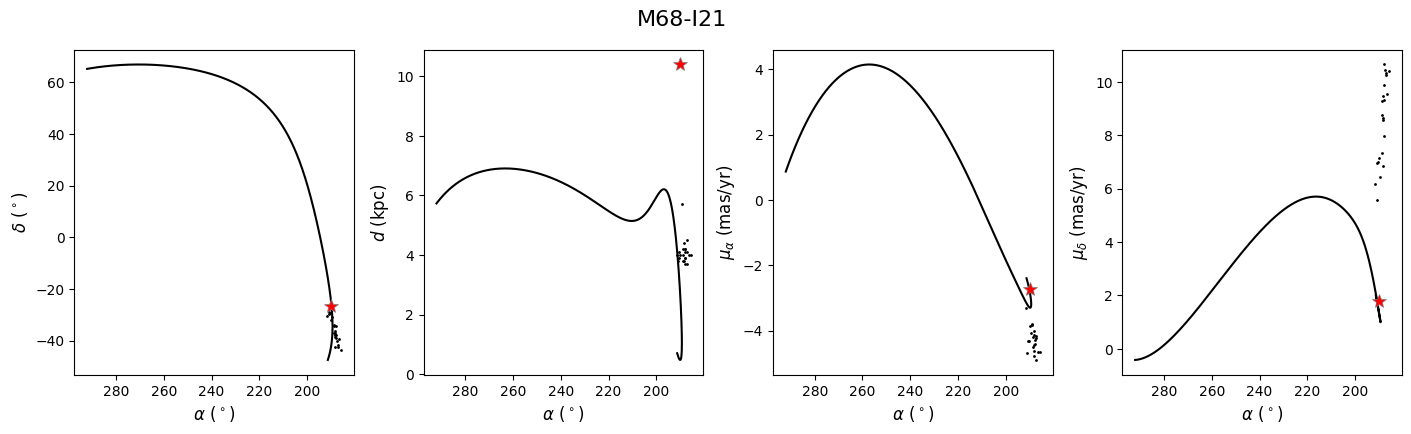

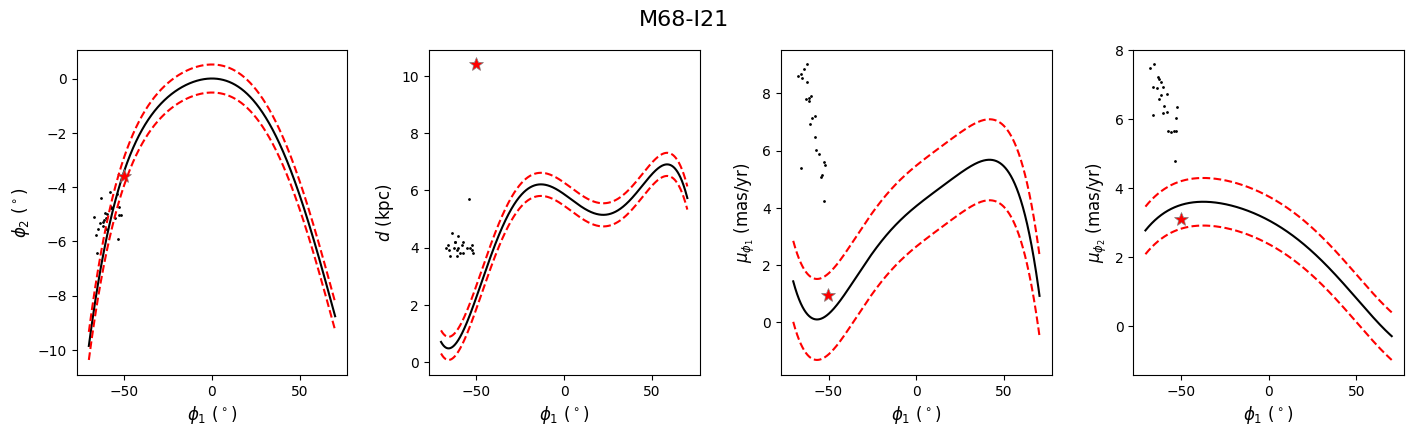

In [722]:
glob_st = glob_g.transform_to(mwsts['M68-I21'].stream_frame)

M68_I21 = I21[I21.StreamName=='M68']

M68_I21_g = ac.SkyCoord(ra=np.array(M68_I21.ra_epoch2000)*u.deg,
                                  dec=np.array(M68_I21.dec_epoch2000)*u.deg,
                                  distance=np.array(M68_I21.dis)*u.kpc,
                                  pm_ra_cosdec=np.array(M68_I21.pmra)*u.mas/u.yr,
                                  pm_dec=np.array(M68_I21.pmdec)*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(M68_I21.pmdec))*u.km/u.s)
    
M68_I21_c = M68_I21_g.transform_to(mwsts['M68-I21'].stream_frame)

print('width_phi2:',np.std(M68_I21_c.phi2.value))
print('width_pmphi1:',np.std(M68_I21_c.pm_phi1_cosphi2.value))
print('width_pmphi2:',np.std(M68_I21_c.pm_phi2.value))
print('width_dist:',np.std(M68_I21_g.distance.value))

widths.loc['M68-I21'].width_phi2 = np.std(M68_I21_c.phi2.value)
widths.loc['M68-I21'].width_dist = np.std(M68_I21_g.distance.value)
widths.loc['M68-I21'].width_pmphi1 = np.std(M68_I21_c.pm_phi1_cosphi2.value)
widths.loc['M68-I21'].width_pmphi2 = np.std(M68_I21_c.pm_phi2.value)

fig=plt.figure(1,figsize=(15,5))    
fig.subplots_adjust(wspace=0.25,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax=fig.add_subplot(141)
ax.plot(mwsts['M68-I21'].track.ra, mwsts['M68-I21'].track.dec,'-k', lw=1.5, zorder=99)
ax.plot(M68_I21_g.ra, M68_I21_g.dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\delta$ ($^\circ$)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(142)
ax.plot(mwsts['M68-I21'].track.ra, mwsts['M68-I21'].track.distance,'-k', lw=1.5, zorder=99)
ax.plot(M68_I21_g.ra, M68_I21_g.distance,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$d$ (kpc)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(143)
ax.plot(mwsts['M68-I21'].track.ra, mwsts['M68-I21'].track.pm_ra_cosdec,'-k', lw=1.5,zorder=99)
ax.plot(M68_I21_g.ra, M68_I21_g.pm_ra_cosdec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_ra_cosdec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\\alpha$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(144)
ax.plot(mwsts['M68-I21'].track.ra, mwsts['M68-I21'].track.pm_dec,'-k', lw=1.5,zorder=100)
ax.plot(M68_I21_g.ra, M68_I21_g.pm_dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\delta$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

plt.suptitle('M68-I21',fontsize=16);


fig2=plt.figure(2,figsize=(15,5))    
fig2.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax2=fig2.add_subplot(141)
ax2.plot(mwsts['M68-I21'].track.transform_to(mwsts['M68-I21'].stream_frame).phi1, mwsts['M68-I21'].track.transform_to(mwsts['M68-I21'].stream_frame).phi2,'-k', lw=1.5, zorder=99)
ax2.plot(M68_I21_c.phi1, M68_I21_c.phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['M68-I21'].track.transform_to(mwsts['M68-I21'].stream_frame).phi1, mwsts['M68-I21'].track.transform_to(mwsts['M68-I21'].stream_frame).phi2 + n*widths.loc['M68-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['M68-I21'].track.transform_to(mwsts['M68-I21'].stream_frame).phi1, mwsts['M68-I21'].track.transform_to(mwsts['M68-I21'].stream_frame).phi2 - n*widths.loc['M68-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\phi_2$ ($^\circ$)',fontsize=12)

ax2=fig2.add_subplot(142)
ax2.plot(mwsts['M68-I21'].track.transform_to(mwsts['M68-I21'].stream_frame).phi1, mwsts['M68-I21'].track.distance,'-k', lw=1.5, zorder=99)
ax2.plot(M68_I21_c.phi1, M68_I21_g.distance,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['M68-I21'].track.transform_to(mwsts['M68-I21'].stream_frame).phi1, mwsts['M68-I21'].track.distance + n*widths.loc['M68-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['M68-I21'].track.transform_to(mwsts['M68-I21'].stream_frame).phi1, mwsts['M68-I21'].track.distance - n*widths.loc['M68-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$d$ (kpc)',fontsize=12)

ax2=fig2.add_subplot(143)
ax2.plot(mwsts['M68-I21'].track.transform_to(mwsts['M68-I21'].stream_frame).phi1, mwsts['M68-I21'].track.transform_to(mwsts['M68-I21'].stream_frame).pm_phi1_cosphi2,'-k', lw=1.5,zorder=99)
ax2.plot(M68_I21_c.phi1, M68_I21_c.pm_phi1_cosphi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi1_cosphi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['M68-I21'].track.transform_to(mwsts['M68-I21'].stream_frame).phi1, mwsts['M68-I21'].track.transform_to(mwsts['M68-I21'].stream_frame).pm_phi1_cosphi2 + n*widths.loc['M68-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['M68-I21'].track.transform_to(mwsts['M68-I21'].stream_frame).phi1, mwsts['M68-I21'].track.transform_to(mwsts['M68-I21'].stream_frame).pm_phi1_cosphi2 - n*widths.loc['M68-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_1}$ (mas/yr)',fontsize=12)

ax2=fig2.add_subplot(144)
ax2.plot(mwsts['M68-I21'].track.transform_to(mwsts['M68-I21'].stream_frame).phi1, mwsts['M68-I21'].track.transform_to(mwsts['M68-I21'].stream_frame).pm_phi2,'-k', lw=1.5,zorder=100)
ax2.plot(M68_I21_c.phi1, M68_I21_c.pm_phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['M68-I21'].track.transform_to(mwsts['M68-I21'].stream_frame).phi1, mwsts['M68-I21'].track.transform_to(mwsts['M68-I21'].stream_frame).pm_phi2 + n*widths.loc['M68-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['M68-I21'].track.transform_to(mwsts['M68-I21'].stream_frame).phi1, mwsts['M68-I21'].track.transform_to(mwsts['M68-I21'].stream_frame).pm_phi2 - n*widths.loc['M68-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_2}$ (mas/yr)',fontsize=12)

plt.suptitle('M68-I21',fontsize=16);

width_phi2: 2.3034549032050946
width_pmphi1: 1.490778657705624
width_pmphi2: 0.861307201037457
width_dist: 3.0868277604876293


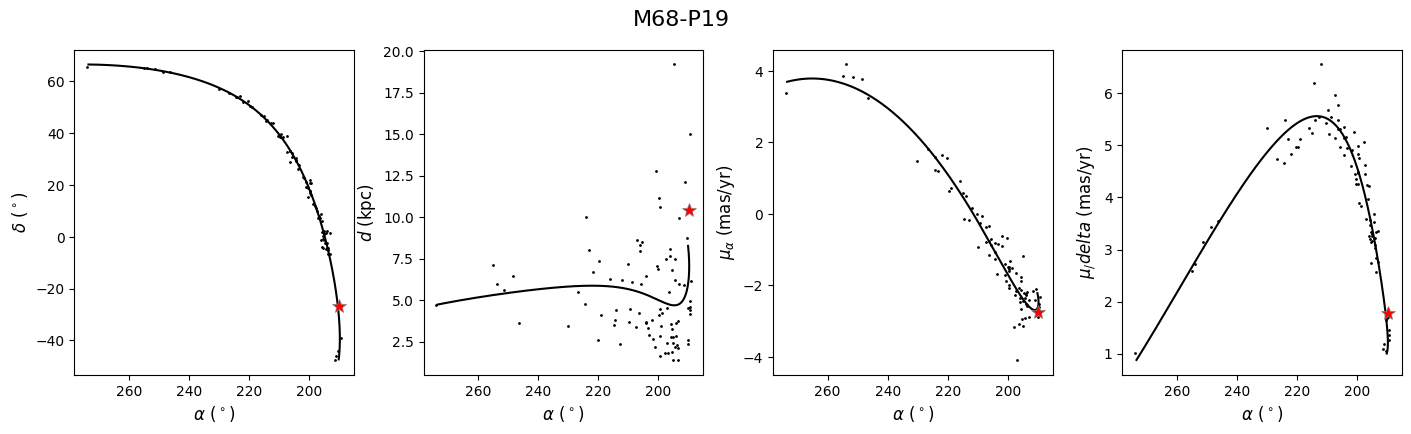

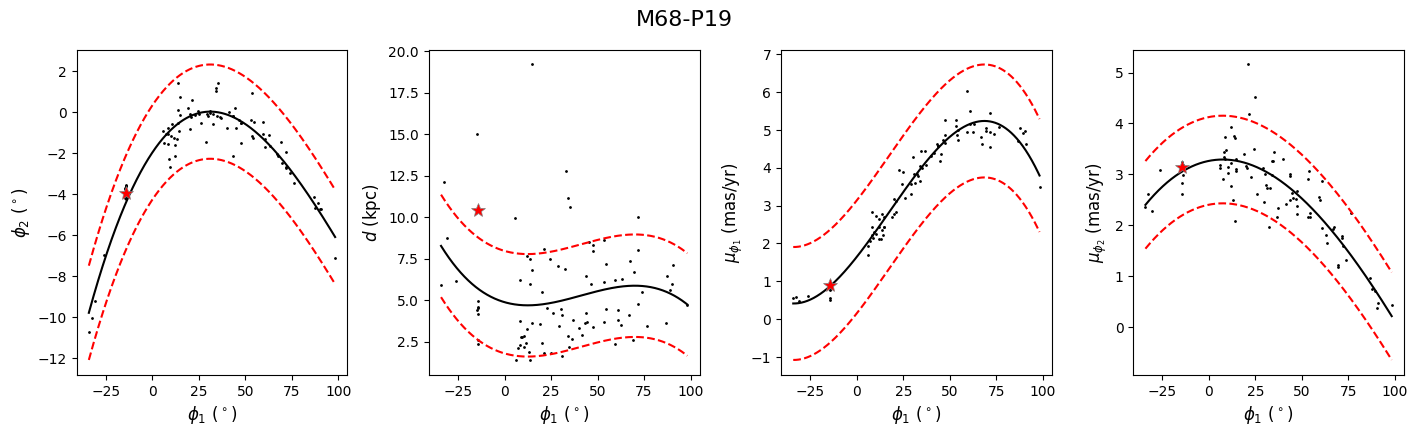

In [723]:
glob_st = glob_g.transform_to(mwsts['M68-P19'].stream_frame)

M68_P19 = M68_P19[M68_P19.parallax>0.05]

M68_P19_g = ac.SkyCoord(ra=np.array(M68_P19.ra)*u.deg,
                                  dec=np.array(M68_P19.dec)*u.deg,
                                  distance=np.array(1/M68_P19.parallax)*u.kpc,
                                  pm_ra_cosdec=np.array(M68_P19.muracosdec)*u.mas/u.yr,
                                  pm_dec=np.array(M68_P19.mudec)*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(M68_P19.mudec))*u.km/u.s)
    
M68_P19_c = M68_P19_g.transform_to(mwsts['M68-P19'].stream_frame)

print('width_phi2:',np.std(M68_P19_c.phi2.value))
print('width_pmphi1:',np.std(M68_P19_c.pm_phi1_cosphi2.value))
print('width_pmphi2:',np.std(M68_P19_c.pm_phi2.value))
print('width_dist:',np.std(M68_P19_g.distance.value))

widths.loc['M68-P19'].width_phi2 = np.std(M68_P19_c.phi2.value)
widths.loc['M68-P19'].width_dist = np.std(M68_P19_g.distance.value)
widths.loc['M68-P19'].width_pmphi1 = np.std(M68_P19_c.pm_phi1_cosphi2.value)
widths.loc['M68-P19'].width_pmphi2 = np.std(M68_P19_c.pm_phi2.value)

fig=plt.figure(1,figsize=(15,5))    
fig.subplots_adjust(wspace=0.25,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax=fig.add_subplot(141)
ax.plot(mwsts['M68-P19'].track.ra, mwsts['M68-P19'].track.dec,'-k', lw=1.5, zorder=99)
ax.plot(M68_P19_g.ra, M68_P19_g.dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\delta$ ($^\circ$)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(142)
ax.plot(mwsts['M68-P19'].track.ra, mwsts['M68-P19'].track.distance,'-k', lw=1.5, zorder=99)
ax.plot(M68_P19_g.ra, M68_P19_g.distance,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$d$ (kpc)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(143)
ax.plot(mwsts['M68-P19'].track.ra, mwsts['M68-P19'].track.pm_ra_cosdec,'-k', lw=1.5,zorder=99)
ax.plot(M68_P19_g.ra, M68_P19_g.pm_ra_cosdec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_ra_cosdec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\\alpha$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(144)
ax.plot(mwsts['M68-P19'].track.ra, mwsts['M68-P19'].track.pm_dec,'-k', lw=1.5,zorder=100)
ax.plot(M68_P19_g.ra, M68_P19_g.pm_dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_/delta$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

plt.suptitle('M68-P19',fontsize=16);


fig2=plt.figure(2,figsize=(15,5))    
fig2.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax2=fig2.add_subplot(141)
ax2.plot(mwsts['M68-P19'].track.transform_to(mwsts['M68-P19'].stream_frame).phi1, mwsts['M68-P19'].track.transform_to(mwsts['M68-P19'].stream_frame).phi2,'-k', lw=1.5, zorder=99)
ax2.plot(M68_P19_c.phi1, M68_P19_c.phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['M68-P19'].track.transform_to(mwsts['M68-P19'].stream_frame).phi1, mwsts['M68-P19'].track.transform_to(mwsts['M68-P19'].stream_frame).phi2 + n*widths.loc['M68-P19'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['M68-P19'].track.transform_to(mwsts['M68-P19'].stream_frame).phi1, mwsts['M68-P19'].track.transform_to(mwsts['M68-P19'].stream_frame).phi2 - n*widths.loc['M68-P19'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\phi_2$ ($^\circ$)',fontsize=12)

ax2=fig2.add_subplot(142)
ax2.plot(mwsts['M68-P19'].track.transform_to(mwsts['M68-P19'].stream_frame).phi1, mwsts['M68-P19'].track.distance,'-k', lw=1.5, zorder=99)
ax2.plot(M68_P19_c.phi1, M68_P19_g.distance,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['M68-P19'].track.transform_to(mwsts['M68-P19'].stream_frame).phi1, mwsts['M68-P19'].track.distance + n*widths.loc['M68-P19'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['M68-P19'].track.transform_to(mwsts['M68-P19'].stream_frame).phi1, mwsts['M68-P19'].track.distance - n*widths.loc['M68-P19'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$d$ (kpc)',fontsize=12)

ax2=fig2.add_subplot(143)
ax2.plot(mwsts['M68-P19'].track.transform_to(mwsts['M68-P19'].stream_frame).phi1, mwsts['M68-P19'].track.transform_to(mwsts['M68-P19'].stream_frame).pm_phi1_cosphi2,'-k', lw=1.5,zorder=99)
ax2.plot(M68_P19_c.phi1, M68_P19_c.pm_phi1_cosphi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi1_cosphi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['M68-P19'].track.transform_to(mwsts['M68-P19'].stream_frame).phi1, mwsts['M68-P19'].track.transform_to(mwsts['M68-P19'].stream_frame).pm_phi1_cosphi2 + n*widths.loc['M68-P19'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['M68-P19'].track.transform_to(mwsts['M68-P19'].stream_frame).phi1, mwsts['M68-P19'].track.transform_to(mwsts['M68-P19'].stream_frame).pm_phi1_cosphi2 - n*widths.loc['M68-P19'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_1}$ (mas/yr)',fontsize=12)

ax2=fig2.add_subplot(144)
ax2.plot(mwsts['M68-P19'].track.transform_to(mwsts['M68-P19'].stream_frame).phi1, mwsts['M68-P19'].track.transform_to(mwsts['M68-P19'].stream_frame).pm_phi2,'-k', lw=1.5,zorder=100)
ax2.plot(M68_P19_c.phi1, M68_P19_c.pm_phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['M68-P19'].track.transform_to(mwsts['M68-P19'].stream_frame).phi1, mwsts['M68-P19'].track.transform_to(mwsts['M68-P19'].stream_frame).pm_phi2 + n*widths.loc['M68-P19'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['M68-P19'].track.transform_to(mwsts['M68-P19'].stream_frame).phi1, mwsts['M68-P19'].track.transform_to(mwsts['M68-P19'].stream_frame).pm_phi2 - n*widths.loc['M68-P19'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_2}$ (mas/yr)',fontsize=12)

plt.suptitle('M68-P19',fontsize=16);

## Gjoll - NGC3201

Gjoll-I21 y NGC3201-I21 tienen el mismo track...

In [716]:
globs_ = globs[globs['Name'] == 'NGC 3201']

globs_d = pd.read_csv('../catalogs/globular_clusters_Baumgardt&Vasiliev2021.txt', header=0, sep='\s+')
globs_d_ = globs_d[globs_d.Cluster == 'NGC_3201']

glob_g = ac.SkyCoord(ra=globs_.RAJ2000[0]*u.deg,
                      dec=globs_.DEJ2000[0]*u.deg,
                      distance=float(globs_d_.Rsun.values[0])*u.kpc,
                      pm_ra_cosdec=globs_.pmRA[0]*u.mas/u.yr,
                      pm_dec=globs_.pmDE[0]*u.mas/u.yr,
                      radial_velocity=0*u.km/u.s)

width_phi2: 0.6987604151586612
width_pmphi1: 2.2541706980771914
width_pmphi2: 0.478483538310882
width_dist: 0.3073244037162838


Text(0.5, 0.98, 'Gjoll-I21')

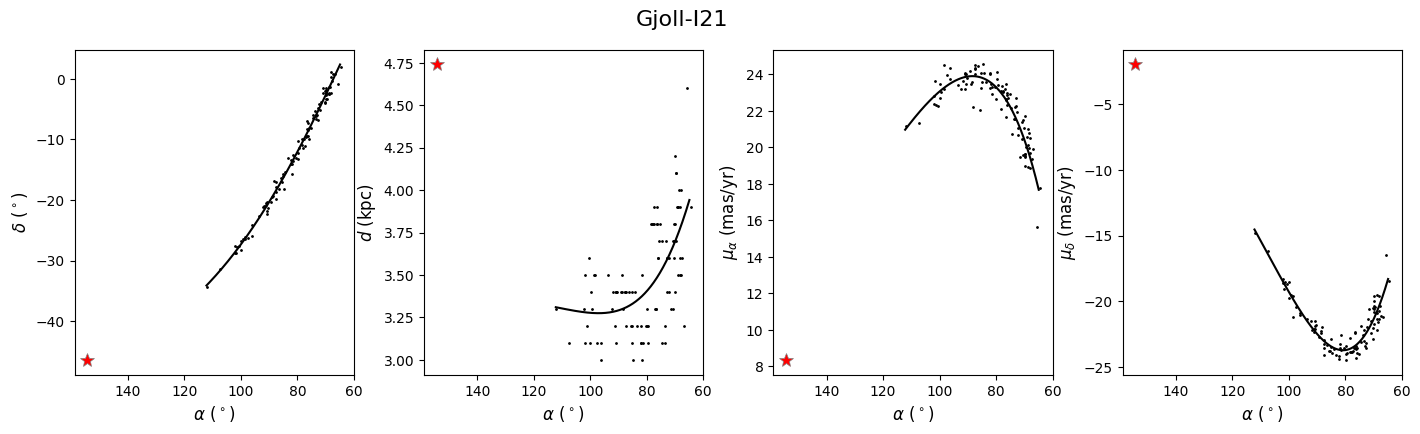

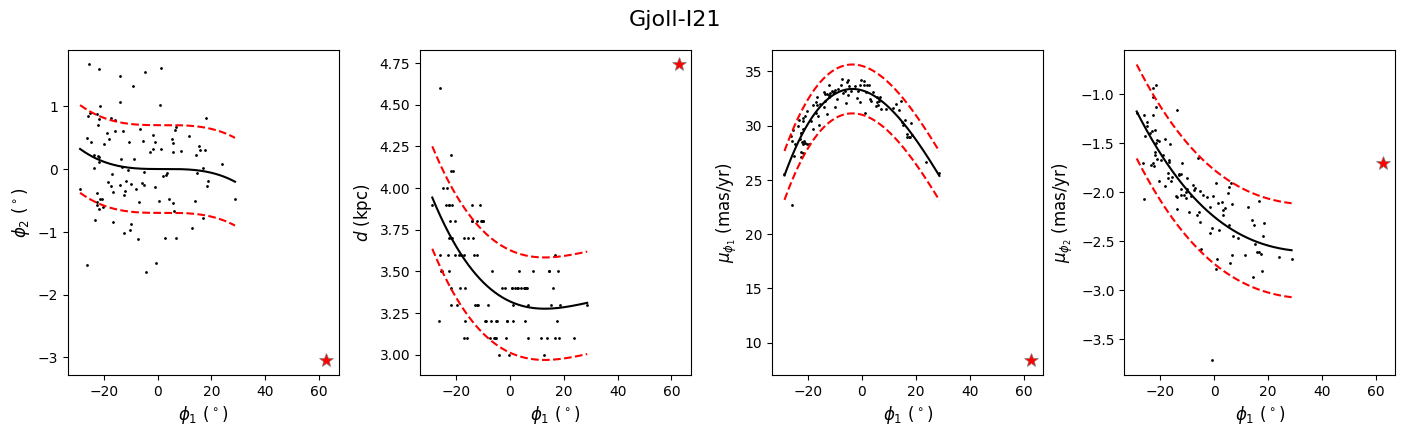

In [717]:
glob_st = glob_g.transform_to(mwsts['Gjoll-I21'].stream_frame)

Gjoll_I21 = I21[I21.StreamName=='Gjoll']

Gjoll_I21_g = ac.SkyCoord(ra=np.array(Gjoll_I21.ra_epoch2000)*u.deg,
                                  dec=np.array(Gjoll_I21.dec_epoch2000)*u.deg,
                                  distance=np.array(Gjoll_I21.dis)*u.kpc,
                                  pm_ra_cosdec=np.array(Gjoll_I21.pmra)*u.mas/u.yr,
                                  pm_dec=np.array(Gjoll_I21.pmdec)*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(Gjoll_I21.pmdec))*u.km/u.s)
    
Gjoll_I21_c = Gjoll_I21_g.transform_to(mwsts['Gjoll-I21'].stream_frame)

print('width_phi2:',np.std(Gjoll_I21_c.phi2.value))
print('width_pmphi1:',np.std(Gjoll_I21_c.pm_phi1_cosphi2.value))
print('width_pmphi2:',np.std(Gjoll_I21_c.pm_phi2.value))
print('width_dist:',np.std(Gjoll_I21_g.distance.value))

widths.loc['Gjoll-I21'].width_phi2 = np.std(Gjoll_I21_c.phi2.value)
widths.loc['Gjoll-I21'].width_dist = np.std(Gjoll_I21_g.distance.value)
widths.loc['Gjoll-I21'].width_pmphi1 = np.std(Gjoll_I21_c.pm_phi1_cosphi2.value)
widths.loc['Gjoll-I21'].width_pmphi2 = np.std(Gjoll_I21_c.pm_phi2.value)

fig=plt.figure(1,figsize=(15,5))    
fig.subplots_adjust(wspace=0.25,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax=fig.add_subplot(141)
ax.plot(mwsts['Gjoll-I21'].track.ra, mwsts['Gjoll-I21'].track.dec,'-k', lw=1.5, zorder=99)
ax.plot(Gjoll_I21_g.ra, Gjoll_I21_g.dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\delta$ ($^\circ$)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(142)
ax.plot(mwsts['Gjoll-I21'].track.ra, mwsts['Gjoll-I21'].track.distance,'-k', lw=1.5, zorder=99)
ax.plot(Gjoll_I21_g.ra, Gjoll_I21_g.distance,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$d$ (kpc)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(143)
ax.plot(mwsts['Gjoll-I21'].track.ra, mwsts['Gjoll-I21'].track.pm_ra_cosdec,'-k', lw=1.5,zorder=99)
ax.plot(Gjoll_I21_g.ra, Gjoll_I21_g.pm_ra_cosdec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_ra_cosdec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\\alpha$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(144)
ax.plot(mwsts['Gjoll-I21'].track.ra, mwsts['Gjoll-I21'].track.pm_dec,'-k', lw=1.5,zorder=100)
ax.plot(Gjoll_I21_g.ra, Gjoll_I21_g.pm_dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\delta$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

plt.suptitle('Gjoll-I21',fontsize=16);


fig2=plt.figure(2,figsize=(15,5))    
fig2.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax2=fig2.add_subplot(141)
ax2.plot(mwsts['Gjoll-I21'].track.transform_to(mwsts['Gjoll-I21'].stream_frame).phi1, mwsts['Gjoll-I21'].track.transform_to(mwsts['Gjoll-I21'].stream_frame).phi2,'-k', lw=1.5, zorder=99)
ax2.plot(Gjoll_I21_c.phi1, Gjoll_I21_c.phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['Gjoll-I21'].track.transform_to(mwsts['Gjoll-I21'].stream_frame).phi1, mwsts['Gjoll-I21'].track.transform_to(mwsts['Gjoll-I21'].stream_frame).phi2 + n*widths.loc['Gjoll-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['Gjoll-I21'].track.transform_to(mwsts['Gjoll-I21'].stream_frame).phi1, mwsts['Gjoll-I21'].track.transform_to(mwsts['Gjoll-I21'].stream_frame).phi2 - n*widths.loc['Gjoll-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\phi_2$ ($^\circ$)',fontsize=12)

ax2=fig2.add_subplot(142)
ax2.plot(mwsts['Gjoll-I21'].track.transform_to(mwsts['Gjoll-I21'].stream_frame).phi1, mwsts['Gjoll-I21'].track.distance,'-k', lw=1.5, zorder=99)
ax2.plot(Gjoll_I21_c.phi1, Gjoll_I21_g.distance,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['Gjoll-I21'].track.transform_to(mwsts['Gjoll-I21'].stream_frame).phi1, mwsts['Gjoll-I21'].track.distance + n*widths.loc['Gjoll-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['Gjoll-I21'].track.transform_to(mwsts['Gjoll-I21'].stream_frame).phi1, mwsts['Gjoll-I21'].track.distance - n*widths.loc['Gjoll-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$d$ (kpc)',fontsize=12)

ax2=fig2.add_subplot(143)
ax2.plot(mwsts['Gjoll-I21'].track.transform_to(mwsts['Gjoll-I21'].stream_frame).phi1, mwsts['Gjoll-I21'].track.transform_to(mwsts['Gjoll-I21'].stream_frame).pm_phi1_cosphi2,'-k', lw=1.5,zorder=99)
ax2.plot(Gjoll_I21_c.phi1, Gjoll_I21_c.pm_phi1_cosphi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi1_cosphi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['Gjoll-I21'].track.transform_to(mwsts['Gjoll-I21'].stream_frame).phi1, mwsts['Gjoll-I21'].track.transform_to(mwsts['Gjoll-I21'].stream_frame).pm_phi1_cosphi2 + n*widths.loc['Gjoll-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['Gjoll-I21'].track.transform_to(mwsts['Gjoll-I21'].stream_frame).phi1, mwsts['Gjoll-I21'].track.transform_to(mwsts['Gjoll-I21'].stream_frame).pm_phi1_cosphi2 - n*widths.loc['Gjoll-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_1}$ (mas/yr)',fontsize=12)

ax2=fig2.add_subplot(144)
ax2.plot(mwsts['Gjoll-I21'].track.transform_to(mwsts['Gjoll-I21'].stream_frame).phi1, mwsts['Gjoll-I21'].track.transform_to(mwsts['Gjoll-I21'].stream_frame).pm_phi2,'-k', lw=1.5,zorder=100)
ax2.plot(Gjoll_I21_c.phi1, Gjoll_I21_c.pm_phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['Gjoll-I21'].track.transform_to(mwsts['Gjoll-I21'].stream_frame).phi1, mwsts['Gjoll-I21'].track.transform_to(mwsts['Gjoll-I21'].stream_frame).pm_phi2 + n*widths.loc['Gjoll-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['Gjoll-I21'].track.transform_to(mwsts['Gjoll-I21'].stream_frame).phi1, mwsts['Gjoll-I21'].track.transform_to(mwsts['Gjoll-I21'].stream_frame).pm_phi2 - n*widths.loc['Gjoll-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_2}$ (mas/yr)',fontsize=12)

plt.suptitle('Gjoll-I21',fontsize=16)

width_phi2: 0.6597073215827444
width_pmphi1: 1.5584034641822868
width_pmphi2: 0.5915903117786042
width_dist: 0.8085719469336368


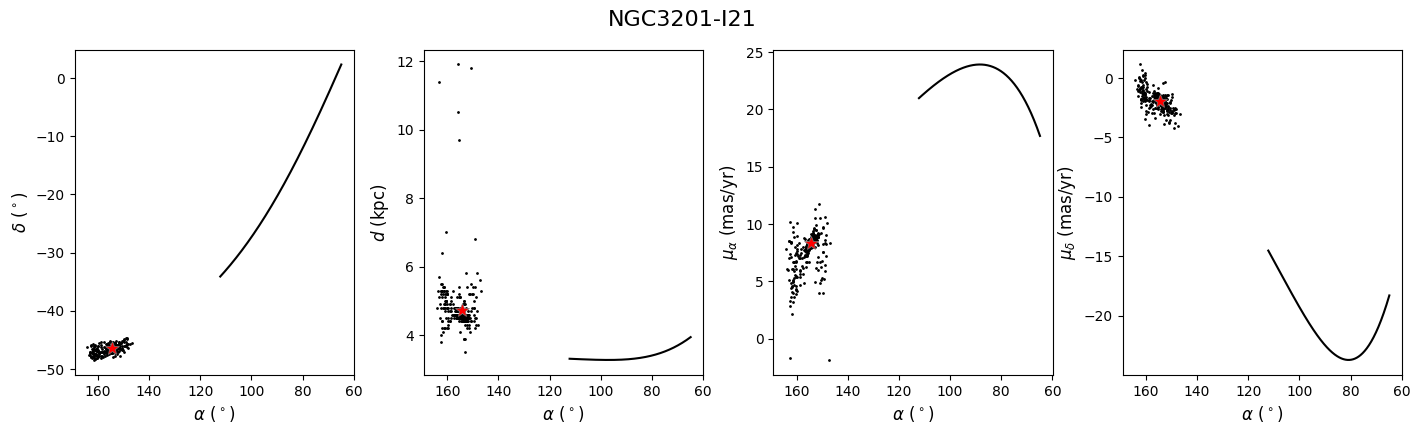

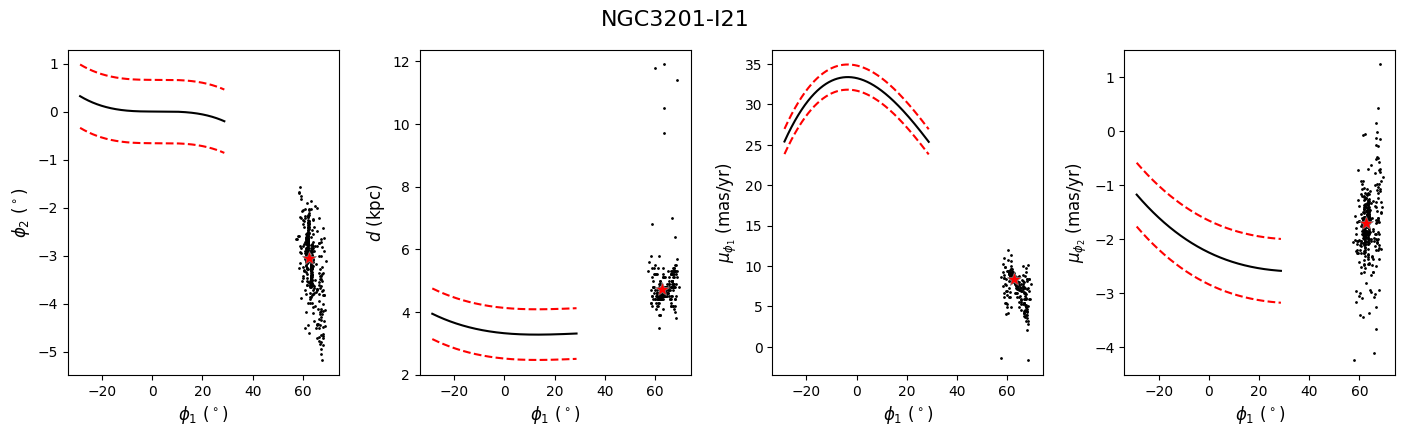

In [718]:
glob_st = glob_g.transform_to(mwsts['NGC3201-I21'].stream_frame)

NGC3201_I21 = I21[I21.StreamName=='NGC3201']

NGC3201_I21_g = ac.SkyCoord(ra=np.array(NGC3201_I21.ra_epoch2000)*u.deg,
                                  dec=np.array(NGC3201_I21.dec_epoch2000)*u.deg,
                                  distance=np.array(NGC3201_I21.dis)*u.kpc,
                                  pm_ra_cosdec=np.array(NGC3201_I21.pmra)*u.mas/u.yr,
                                  pm_dec=np.array(NGC3201_I21.pmdec)*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(NGC3201_I21.pmdec))*u.km/u.s)
    
NGC3201_I21_c = NGC3201_I21_g.transform_to(mwsts['NGC3201-I21'].stream_frame)

print('width_phi2:',np.std(NGC3201_I21_c.phi2.value))
print('width_pmphi1:',np.std(NGC3201_I21_c.pm_phi1_cosphi2.value))
print('width_pmphi2:',np.std(NGC3201_I21_c.pm_phi2.value))
print('width_dist:',np.std(NGC3201_I21_g.distance.value))

widths.loc['NGC3201-I21'].width_phi2 = np.std(NGC3201_I21_c.phi2.value)
widths.loc['NGC3201-I21'].width_dist = np.std(NGC3201_I21_g.distance.value)
widths.loc['NGC3201-I21'].width_pmphi1 = np.std(NGC3201_I21_c.pm_phi1_cosphi2.value)
widths.loc['NGC3201-I21'].width_pmphi2 = np.std(NGC3201_I21_c.pm_phi2.value)

fig=plt.figure(1,figsize=(15,5))    
fig.subplots_adjust(wspace=0.25,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax=fig.add_subplot(141)
ax.plot(mwsts['NGC3201-I21'].track.ra, mwsts['NGC3201-I21'].track.dec,'-k', lw=1.5, zorder=99)
ax.plot(NGC3201_I21_g.ra, NGC3201_I21_g.dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\delta$ ($^\circ$)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(142)
ax.plot(mwsts['NGC3201-I21'].track.ra, mwsts['NGC3201-I21'].track.distance,'-k', lw=1.5, zorder=99)
ax.plot(NGC3201_I21_g.ra, NGC3201_I21_g.distance,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$d$ (kpc)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(143)
ax.plot(mwsts['NGC3201-I21'].track.ra, mwsts['NGC3201-I21'].track.pm_ra_cosdec,'-k', lw=1.5,zorder=99)
ax.plot(NGC3201_I21_g.ra, NGC3201_I21_g.pm_ra_cosdec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_ra_cosdec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\\alpha$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(144)
ax.plot(mwsts['NGC3201-I21'].track.ra, mwsts['NGC3201-I21'].track.pm_dec,'-k', lw=1.5,zorder=100)
ax.plot(NGC3201_I21_g.ra, NGC3201_I21_g.pm_dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\delta$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

plt.suptitle('NGC3201-I21',fontsize=16);


fig2=plt.figure(2,figsize=(15,5))    
fig2.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax2=fig2.add_subplot(141)
ax2.plot(mwsts['NGC3201-I21'].track.transform_to(mwsts['NGC3201-I21'].stream_frame).phi1, mwsts['NGC3201-I21'].track.transform_to(mwsts['NGC3201-I21'].stream_frame).phi2,'-k', lw=1.5, zorder=99)
ax2.plot(NGC3201_I21_c.phi1, NGC3201_I21_c.phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC3201-I21'].track.transform_to(mwsts['NGC3201-I21'].stream_frame).phi1, mwsts['NGC3201-I21'].track.transform_to(mwsts['NGC3201-I21'].stream_frame).phi2 + n*widths.loc['NGC3201-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC3201-I21'].track.transform_to(mwsts['NGC3201-I21'].stream_frame).phi1, mwsts['NGC3201-I21'].track.transform_to(mwsts['NGC3201-I21'].stream_frame).phi2 - n*widths.loc['NGC3201-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\phi_2$ ($^\circ$)',fontsize=12)

ax2=fig2.add_subplot(142)
ax2.plot(mwsts['NGC3201-I21'].track.transform_to(mwsts['NGC3201-I21'].stream_frame).phi1, mwsts['NGC3201-I21'].track.distance,'-k', lw=1.5, zorder=99)
ax2.plot(NGC3201_I21_c.phi1, NGC3201_I21_g.distance,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC3201-I21'].track.transform_to(mwsts['NGC3201-I21'].stream_frame).phi1, mwsts['NGC3201-I21'].track.distance + n*widths.loc['NGC3201-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC3201-I21'].track.transform_to(mwsts['NGC3201-I21'].stream_frame).phi1, mwsts['NGC3201-I21'].track.distance - n*widths.loc['NGC3201-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$d$ (kpc)',fontsize=12)

ax2=fig2.add_subplot(143)
ax2.plot(mwsts['NGC3201-I21'].track.transform_to(mwsts['NGC3201-I21'].stream_frame).phi1, mwsts['NGC3201-I21'].track.transform_to(mwsts['NGC3201-I21'].stream_frame).pm_phi1_cosphi2,'-k', lw=1.5,zorder=99)
ax2.plot(NGC3201_I21_c.phi1, NGC3201_I21_c.pm_phi1_cosphi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi1_cosphi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC3201-I21'].track.transform_to(mwsts['NGC3201-I21'].stream_frame).phi1, mwsts['NGC3201-I21'].track.transform_to(mwsts['NGC3201-I21'].stream_frame).pm_phi1_cosphi2 + n*widths.loc['NGC3201-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC3201-I21'].track.transform_to(mwsts['NGC3201-I21'].stream_frame).phi1, mwsts['NGC3201-I21'].track.transform_to(mwsts['NGC3201-I21'].stream_frame).pm_phi1_cosphi2 - n*widths.loc['NGC3201-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_1}$ (mas/yr)',fontsize=12)

ax2=fig2.add_subplot(144)
ax2.plot(mwsts['NGC3201-I21'].track.transform_to(mwsts['NGC3201-I21'].stream_frame).phi1, mwsts['NGC3201-I21'].track.transform_to(mwsts['NGC3201-I21'].stream_frame).pm_phi2,'-k', lw=1.5,zorder=100)
ax2.plot(NGC3201_I21_c.phi1, NGC3201_I21_c.pm_phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC3201-I21'].track.transform_to(mwsts['NGC3201-I21'].stream_frame).phi1, mwsts['NGC3201-I21'].track.transform_to(mwsts['NGC3201-I21'].stream_frame).pm_phi2 + n*widths.loc['NGC3201-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC3201-I21'].track.transform_to(mwsts['NGC3201-I21'].stream_frame).phi1, mwsts['NGC3201-I21'].track.transform_to(mwsts['NGC3201-I21'].stream_frame).pm_phi2 - n*widths.loc['NGC3201-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_2}$ (mas/yr)',fontsize=12)

plt.suptitle('NGC3201-I21',fontsize=16);

width_phi2: 2.500204106551023
width_pmphi1: 10.730592555824794
width_pmphi2: 0.7913377298268323
width_dist: 2.905074327040908


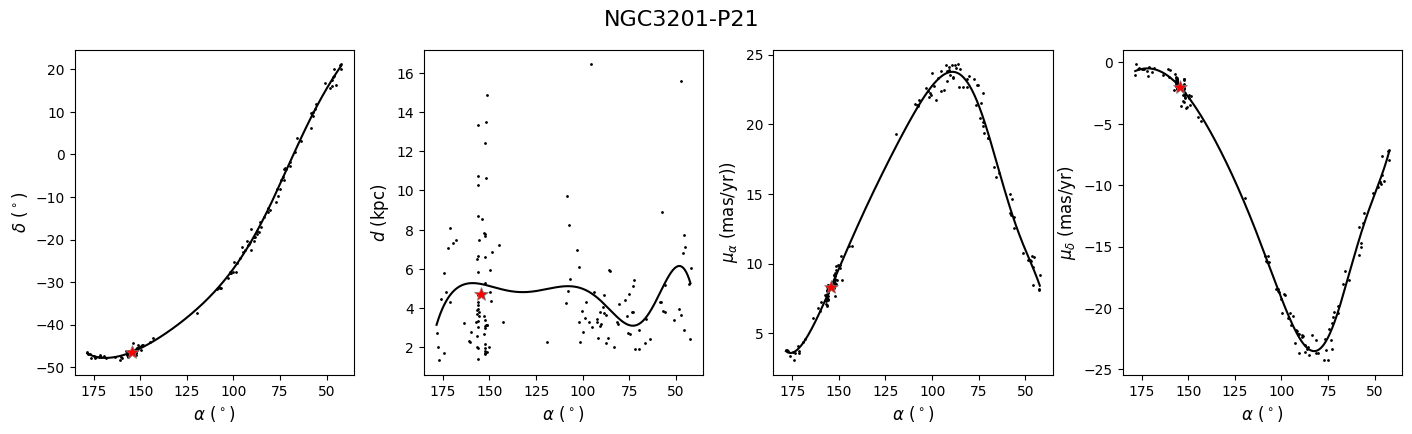

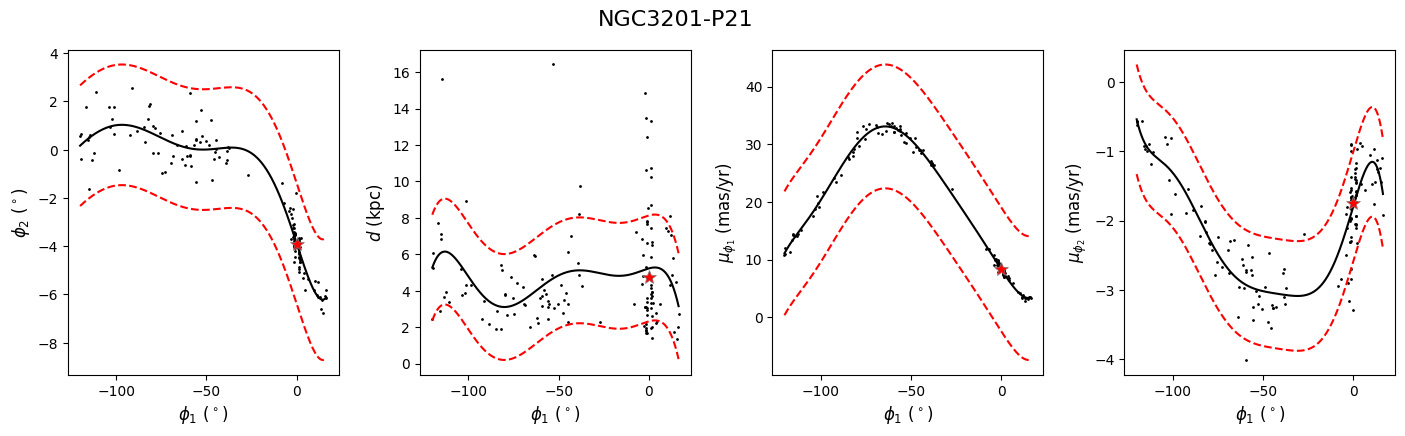

In [719]:
glob_st = glob_g.transform_to(mwsts['NGC3201-P21'].stream_frame)


NGC3201_P21 = NGC3201_P21[NGC3201_P21.parallax>0.05]

NGC3201_P21_g = ac.SkyCoord(ra=np.array(NGC3201_P21.ra)*u.deg,
                                  dec=np.array(NGC3201_P21.dec)*u.deg,
                                  distance=np.array(1/NGC3201_P21.parallax)*u.kpc,
                                  pm_ra_cosdec=np.array(NGC3201_P21.muracosdec)*u.mas/u.yr,
                                  pm_dec=np.array(NGC3201_P21.mudec)*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(NGC3201_P21.mudec))*u.km/u.s)
    
NGC3201_P21_c = NGC3201_P21_g.transform_to(mwsts['NGC3201-P21'].stream_frame)

print('width_phi2:',np.std(NGC3201_P21_c.phi2.value))
print('width_pmphi1:',np.std(NGC3201_P21_c.pm_phi1_cosphi2.value))
print('width_pmphi2:',np.std(NGC3201_P21_c.pm_phi2.value))
print('width_dist:',np.std(NGC3201_P21_g.distance.value))

widths.loc['NGC3201-P21'].width_phi2 = np.std(NGC3201_P21_c.phi2.value)
widths.loc['NGC3201-P21'].width_dist = np.std(NGC3201_P21_g.distance.value)
widths.loc['NGC3201-P21'].width_pmphi1 = np.std(NGC3201_P21_c.pm_phi1_cosphi2.value)
widths.loc['NGC3201-P21'].width_pmphi2 = np.std(NGC3201_P21_c.pm_phi2.value)

fig=plt.figure(1,figsize=(15,5))    
fig.subplots_adjust(wspace=0.25,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax=fig.add_subplot(141)
ax.plot(mwsts['NGC3201-P21'].track.ra, mwsts['NGC3201-P21'].track.dec,'-k', lw=1.5, zorder=99)
ax.plot(NGC3201_P21_g.ra, NGC3201_P21_g.dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\delta$ ($^\circ$)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(142)
ax.plot(mwsts['NGC3201-P21'].track.ra, mwsts['NGC3201-P21'].track.distance,'-k', lw=1.5, zorder=99)
ax.plot(NGC3201_P21_g.ra, NGC3201_P21_g.distance,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$d$ (kpc)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(143)
ax.plot(mwsts['NGC3201-P21'].track.ra, mwsts['NGC3201-P21'].track.pm_ra_cosdec,'-k', lw=1.5,zorder=99)
ax.plot(NGC3201_P21_g.ra, NGC3201_P21_g.pm_ra_cosdec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_ra_cosdec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\\alpha$ (mas/yr))',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(144)
ax.plot(mwsts['NGC3201-P21'].track.ra, mwsts['NGC3201-P21'].track.pm_dec,'-k', lw=1.5,zorder=100)
ax.plot(NGC3201_P21_g.ra, NGC3201_P21_g.pm_dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\delta$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

plt.suptitle('NGC3201-P21',fontsize=16);


fig2=plt.figure(2,figsize=(15,5))    
fig2.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax2=fig2.add_subplot(141)
ax2.plot(mwsts['NGC3201-P21'].track.transform_to(mwsts['NGC3201-P21'].stream_frame).phi1, mwsts['NGC3201-P21'].track.transform_to(mwsts['NGC3201-P21'].stream_frame).phi2,'-k', lw=1.5, zorder=99)
ax2.plot(NGC3201_P21_c.phi1, NGC3201_P21_c.phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC3201-P21'].track.transform_to(mwsts['NGC3201-P21'].stream_frame).phi1, mwsts['NGC3201-P21'].track.transform_to(mwsts['NGC3201-P21'].stream_frame).phi2 + n*widths.loc['NGC3201-P21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC3201-P21'].track.transform_to(mwsts['NGC3201-P21'].stream_frame).phi1, mwsts['NGC3201-P21'].track.transform_to(mwsts['NGC3201-P21'].stream_frame).phi2 - n*widths.loc['NGC3201-P21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\phi_2$ ($^\circ$)',fontsize=12)

ax2=fig2.add_subplot(142)
ax2.plot(mwsts['NGC3201-P21'].track.transform_to(mwsts['NGC3201-P21'].stream_frame).phi1, mwsts['NGC3201-P21'].track.distance,'-k', lw=1.5, zorder=99)
ax2.plot(NGC3201_P21_c.phi1, NGC3201_P21_g.distance,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC3201-P21'].track.transform_to(mwsts['NGC3201-P21'].stream_frame).phi1, mwsts['NGC3201-P21'].track.distance + n*widths.loc['NGC3201-P21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC3201-P21'].track.transform_to(mwsts['NGC3201-P21'].stream_frame).phi1, mwsts['NGC3201-P21'].track.distance - n*widths.loc['NGC3201-P21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$d$ (kpc)',fontsize=12)

ax2=fig2.add_subplot(143)
ax2.plot(mwsts['NGC3201-P21'].track.transform_to(mwsts['NGC3201-P21'].stream_frame).phi1, mwsts['NGC3201-P21'].track.transform_to(mwsts['NGC3201-P21'].stream_frame).pm_phi1_cosphi2,'-k', lw=1.5,zorder=99)
ax2.plot(NGC3201_P21_c.phi1, NGC3201_P21_c.pm_phi1_cosphi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi1_cosphi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC3201-P21'].track.transform_to(mwsts['NGC3201-P21'].stream_frame).phi1, mwsts['NGC3201-P21'].track.transform_to(mwsts['NGC3201-P21'].stream_frame).pm_phi1_cosphi2 + n*widths.loc['NGC3201-P21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC3201-P21'].track.transform_to(mwsts['NGC3201-P21'].stream_frame).phi1, mwsts['NGC3201-P21'].track.transform_to(mwsts['NGC3201-P21'].stream_frame).pm_phi1_cosphi2 - n*widths.loc['NGC3201-P21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_1}$ (mas/yr)',fontsize=12)

ax2=fig2.add_subplot(144)
ax2.plot(mwsts['NGC3201-P21'].track.transform_to(mwsts['NGC3201-P21'].stream_frame).phi1, mwsts['NGC3201-P21'].track.transform_to(mwsts['NGC3201-P21'].stream_frame).pm_phi2,'-k', lw=1.5,zorder=100)
ax2.plot(NGC3201_P21_c.phi1, NGC3201_P21_c.pm_phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC3201-P21'].track.transform_to(mwsts['NGC3201-P21'].stream_frame).phi1, mwsts['NGC3201-P21'].track.transform_to(mwsts['NGC3201-P21'].stream_frame).pm_phi2 + n*widths.loc['NGC3201-P21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC3201-P21'].track.transform_to(mwsts['NGC3201-P21'].stream_frame).phi1, mwsts['NGC3201-P21'].track.transform_to(mwsts['NGC3201-P21'].stream_frame).pm_phi2 - n*widths.loc['NGC3201-P21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_2}$ (mas/yr)',fontsize=12)

plt.suptitle('NGC3201-P21',fontsize=16);

## M2

In [843]:
globs_ = globs[globs['Name'] == 'NGC 7089']

globs_d = pd.read_csv('../catalogs/globular_clusters_Baumgardt&Vasiliev2021.txt', header=0, sep='\s+')
globs_d_ = globs_d[globs_d.Cluster == 'NGC_7089']

glob_g = ac.SkyCoord(ra=globs_.RAJ2000[0]*u.deg,
                      dec=globs_.DEJ2000[0]*u.deg,
                      distance=(float(globs_d_.Rsun.values[0])+0.003)*u.kpc,
                      pm_ra_cosdec=globs_.pmRA[0]*u.mas/u.yr,
                      pm_dec=globs_.pmDE[0]*u.mas/u.yr,
                      radial_velocity=0*u.km/u.s)

width_phi2: 4.679203690953438
width_pmphi1: 2.167662434275221
width_pmphi2: 0.42477703116644744
width_dist: 1.7763568394002505e-15


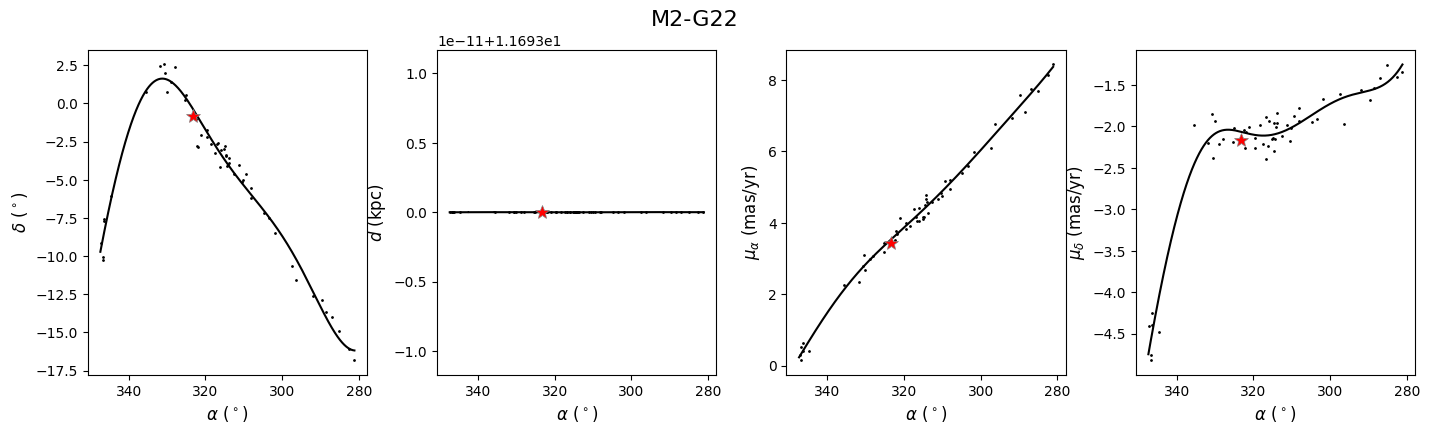

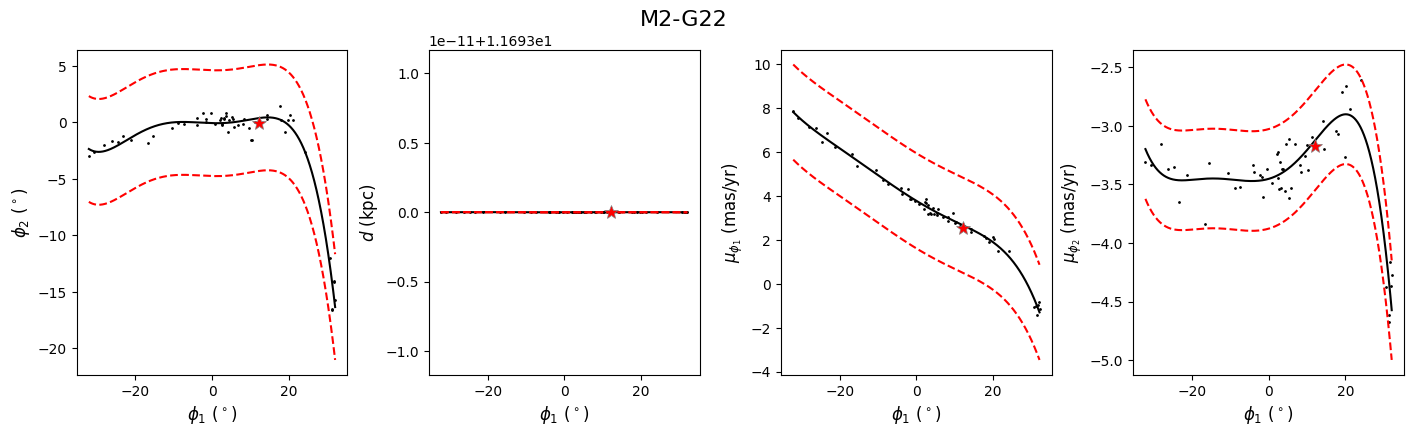

In [846]:
glob_st = glob_g.transform_to(mwsts['M2-G22'].stream_frame)

M2_G22 = M2_G22[M2_G22.weight>0.2]

M2_G22_g = ac.SkyCoord(ra=M2_G22.RA_2016*u.deg,
                          dec=M2_G22.DEC_2016*u.deg,
                          distance=11.693*np.ones(len(M2_G22.pm_dec))*u.kpc,
                          pm_ra_cosdec=M2_G22.pm_ra_cosdec*u.mas/u.yr,
                          pm_dec=M2_G22.pm_dec*u.mas/u.yr,
                          radial_velocity=np.zeros(len(M2_G22.pm_dec))*u.km/u.s)
    
M2_G22_c = M2_G22_g.transform_to(mwsts['M2-G22'].stream_frame)

print('width_phi2:',np.std(M2_G22_c.phi2.value))
print('width_pmphi1:',np.std(M2_G22_c.pm_phi1_cosphi2.value))
print('width_pmphi2:',np.std(M2_G22_c.pm_phi2.value))
print('width_dist:',np.std(M2_G22_g.distance.value))

widths.loc['M2-G22'].width_phi2 = np.std(M2_G22_c.phi2.value)
widths.loc['M2-G22'].width_dist = np.std(M2_G22_g.distance.value)
widths.loc['M2-G22'].width_pmphi1 = np.std(M2_G22_c.pm_phi1_cosphi2.value)
widths.loc['M2-G22'].width_pmphi2 = np.std(M2_G22_c.pm_phi2.value)


fig=plt.figure(1,figsize=(15,5))    
fig.subplots_adjust(wspace=0.25,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax=fig.add_subplot(141)
ax.plot(mwsts['M2-G22'].track.ra, mwsts['M2-G22'].track.dec,'-k', lw=1.5, zorder=99)
ax.plot(M2_G22_g.ra, M2_G22_g.dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\delta$ ($^\circ$)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(142)
ax.plot(mwsts['M2-G22'].track.ra, mwsts['M2-G22'].track.distance,'-k', lw=1.5, zorder=99)
ax.plot(M2_G22_g.ra, M2_G22_g.distance,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$d$ (kpc)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(143)
ax.plot(mwsts['M2-G22'].track.ra, mwsts['M2-G22'].track.pm_ra_cosdec,'-k', lw=1.5,zorder=99)
ax.plot(M2_G22_g.ra, M2_G22_g.pm_ra_cosdec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_ra_cosdec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\\alpha$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(144)
ax.plot(mwsts['M2-G22'].track.ra, mwsts['M2-G22'].track.pm_dec,'-k', lw=1.5,zorder=100)
ax.plot(M2_G22_g.ra, M2_G22_g.pm_dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\delta$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

plt.suptitle('M2-G22',fontsize=16);


fig2=plt.figure(2,figsize=(15,5))    
fig2.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax2=fig2.add_subplot(141)
ax2.plot(mwsts['M2-G22'].track.transform_to(mwsts['M2-G22'].stream_frame).phi1, mwsts['M2-G22'].track.transform_to(mwsts['M2-G22'].stream_frame).phi2,'-k', lw=1.5, zorder=99)
ax2.plot(M2_G22_c.phi1, M2_G22_c.phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['M2-G22'].track.transform_to(mwsts['M2-G22'].stream_frame).phi1, mwsts['M2-G22'].track.transform_to(mwsts['M2-G22'].stream_frame).phi2 + n*widths.loc['M2-G22'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['M2-G22'].track.transform_to(mwsts['M2-G22'].stream_frame).phi1, mwsts['M2-G22'].track.transform_to(mwsts['M2-G22'].stream_frame).phi2 - n*widths.loc['M2-G22'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\phi_2$ ($^\circ$)',fontsize=12)

ax2=fig2.add_subplot(142)
ax2.plot(mwsts['M2-G22'].track.transform_to(mwsts['M2-G22'].stream_frame).phi1, mwsts['M2-G22'].track.distance,'-k', lw=1.5, zorder=99)
ax2.plot(M2_G22_c.phi1, M2_G22_g.distance,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['M2-G22'].track.transform_to(mwsts['M2-G22'].stream_frame).phi1, mwsts['M2-G22'].track.distance + n*widths.loc['M2-G22'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['M2-G22'].track.transform_to(mwsts['M2-G22'].stream_frame).phi1, mwsts['M2-G22'].track.distance - n*widths.loc['M2-G22'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$d$ (kpc)',fontsize=12)

ax2=fig2.add_subplot(143)
ax2.plot(mwsts['M2-G22'].track.transform_to(mwsts['M2-G22'].stream_frame).phi1, mwsts['M2-G22'].track.transform_to(mwsts['M2-G22'].stream_frame).pm_phi1_cosphi2,'-k', lw=1.5,zorder=99)
ax2.plot(M2_G22_c.phi1, M2_G22_c.pm_phi1_cosphi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi1_cosphi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['M2-G22'].track.transform_to(mwsts['M2-G22'].stream_frame).phi1, mwsts['M2-G22'].track.transform_to(mwsts['M2-G22'].stream_frame).pm_phi1_cosphi2 + n*widths.loc['M2-G22'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['M2-G22'].track.transform_to(mwsts['M2-G22'].stream_frame).phi1, mwsts['M2-G22'].track.transform_to(mwsts['M2-G22'].stream_frame).pm_phi1_cosphi2 - n*widths.loc['M2-G22'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_1}$ (mas/yr)',fontsize=12)

ax2=fig2.add_subplot(144)
ax2.plot(mwsts['M2-G22'].track.transform_to(mwsts['M2-G22'].stream_frame).phi1, mwsts['M2-G22'].track.transform_to(mwsts['M2-G22'].stream_frame).pm_phi2,'-k', lw=1.5,zorder=100)
ax2.plot(M2_G22_c.phi1, M2_G22_c.pm_phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['M2-G22'].track.transform_to(mwsts['M2-G22'].stream_frame).phi1, mwsts['M2-G22'].track.transform_to(mwsts['M2-G22'].stream_frame).pm_phi2 + n*widths.loc['M2-G22'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['M2-G22'].track.transform_to(mwsts['M2-G22'].stream_frame).phi1, mwsts['M2-G22'].track.transform_to(mwsts['M2-G22'].stream_frame).pm_phi2 - n*widths.loc['M2-G22'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_2}$ (mas/yr)',fontsize=12)

plt.suptitle('M2-G22',fontsize=16);

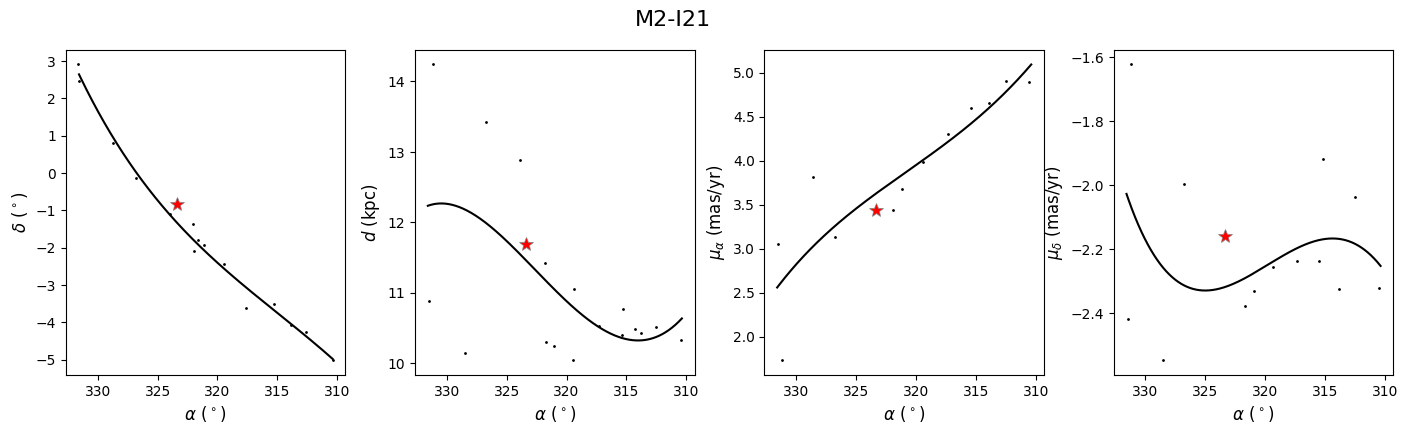

In [698]:
fig=plt.figure(1,figsize=(15,5))    
fig.subplots_adjust(wspace=0.25,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax=fig.add_subplot(141)
ax.plot(mwsts['M2-I21'].track.ra, mwsts['M2-I21'].track.dec,'-k', lw=1.5)
ax.plot(M2_I21radec[0],M2_I21radec[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\delta$ ($^\circ$)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(142)
ax.plot(mwsts['M2-I21'].track.ra, mwsts['M2-I21'].track.distance,'-k', lw=1.5)
ax.plot(M2_I21rad[0],M2_I21rad[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$d$ (kpc)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(143)
ax.plot(mwsts['M2-I21'].track.ra, mwsts['M2-I21'].track.pm_ra_cosdec,'-k', lw=1.5)
ax.plot(M2_I21rapmra[0],M2_I21rapmra[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_ra_cosdec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\\alpha$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(144)
ax.plot(mwsts['M2-I21'].track.ra, mwsts['M2-I21'].track.pm_dec,'-k', lw=1.5)
ax.plot(M2_I21rapmdec[0],M2_I21rapmdec[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\delta$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

plt.suptitle('M2-I21',fontsize=16);


width_phi2: 0.5019225119872691
width_pmphi1: 0.8535820600667053
width_pmphi2: 0.3270258716570432
width_dist: 1.2053197682798653


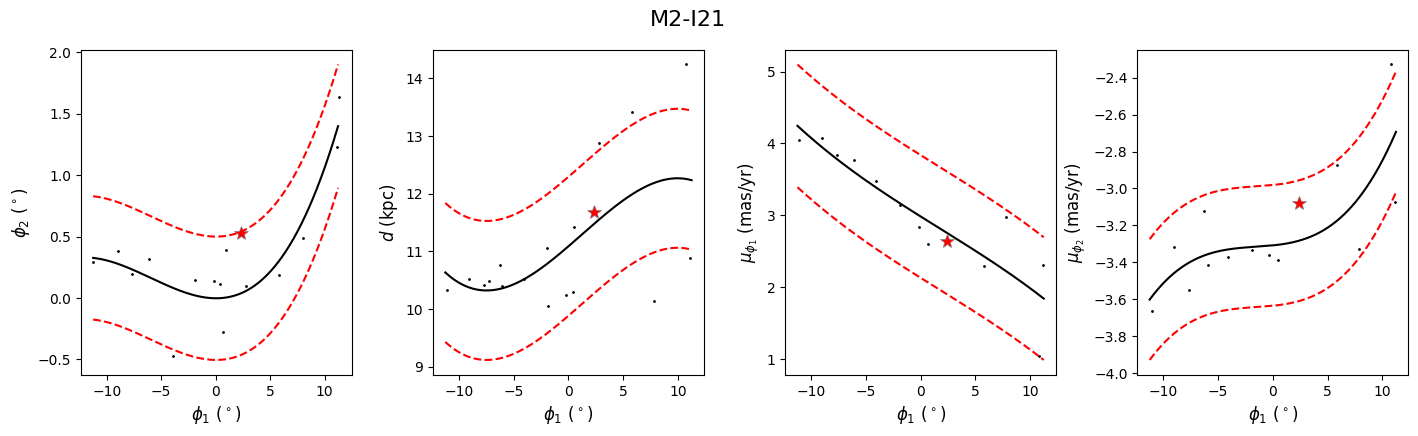

In [700]:
glob_st = glob_g.transform_to(mwsts['M2-I21'].stream_frame)

def model1(phi1, a, b, c, d):
    return a + b*(phi1) + c*(phi1)**2 + d*(phi1)**3

params_radec, _ = curve_fit(model1, mwsts['M2-I21'].track.ra.value, mwsts['M2-I21'].track.dec.value, maxfev=5000)
params_rad, _ = curve_fit(model1, mwsts['M2-I21'].track.ra.value, mwsts['M2-I21'].track.distance.value, maxfev=5000)
params_rapmra, _ = curve_fit(model1, mwsts['M2-I21'].track.ra.value, mwsts['M2-I21'].track.pm_ra_cosdec.value, maxfev=5000)
params_rapmdec, _ = curve_fit(model1, mwsts['M2-I21'].track.ra.value, mwsts['M2-I21'].track.pm_dec.value, maxfev=5000)

decd = model1(M2_I21rad[0].values, params_radec[0], params_radec[1], params_radec[2], params_radec[3])
decpmra = model1(M2_I21rapmra[0].values, params_radec[0], params_radec[1], params_radec[2], params_radec[3])
decpmdec = model1(M2_I21rapmdec[0].values, params_radec[0], params_radec[1], params_radec[2], params_radec[3])

ddec = model1(M2_I21radec[0].values, params_rad[0], params_rad[1], params_rad[2], params_rad[3])
dpmra = model1(M2_I21rapmra[0].values, params_rad[0], params_rad[1], params_rad[2], params_rad[3])
dpmdec = model1(M2_I21rapmdec[0].values, params_rad[0], params_rad[1], params_rad[2], params_rad[3])

pmradec = model1(M2_I21radec[0].values, params_rapmra[0], params_rapmra[1], params_rapmra[2], params_rapmra[3])
pmrad = model1(M2_I21rad[0].values, params_rapmra[0], params_rapmra[1], params_rapmra[2], params_rapmra[3])
pmrapmdec = model1(M2_I21rapmdec[0].values, params_rapmra[0], params_rapmra[1], params_rapmra[2], params_rapmra[3])

pmdecdec = model1(M2_I21radec[0].values, params_rapmdec[0], params_rapmdec[1], params_rapmdec[2], params_rapmdec[3])
pmdecd = model1(M2_I21rad[0].values, params_rapmdec[0], params_rapmdec[1], params_rapmdec[2], params_rapmdec[3])
pmdecpmra = model1(M2_I21rapmra[0].values, params_rapmdec[0], params_rapmdec[1], params_rapmdec[2], params_rapmdec[3])


M2_radec_g = ac.SkyCoord(ra=M2_I21radec[0].values*u.deg,
                              dec=M2_I21radec[1].values*u.deg)
M2_phi12_c = M2_radec_g.transform_to(mwsts['M2-I21'].stream_frame)
print('width_phi2:', np.std(M2_phi12_c.phi2).value)



M2_rapmra_g = ac.SkyCoord(ra=M2_I21rapmra[0].values*u.deg,
                                  dec=decpmra*u.deg,
                                  pm_ra_cosdec=M2_I21rapmra[1].values*u.mas/u.yr,
                                  pm_dec=pmdecpmra*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(M2_I21rapmra[0]))*u.km/u.s)  
M2_phi1pmphi1_c = M2_rapmra_g.transform_to(mwsts['M2-I21'].stream_frame)
print('width_pmphi1:', np.std(M2_phi1pmphi1_c.pm_phi1_cosphi2).value)



M2_rapmdec_g = ac.SkyCoord(ra=M2_I21rapmdec[0].values*u.deg,
                                  dec=decpmdec*u.deg,
                                  pm_ra_cosdec=pmrapmdec*u.mas/u.yr,
                                  pm_dec=M2_I21rapmdec[1].values*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(M2_I21rapmdec[0]))*u.km/u.s)  
M2_phi1pmphi2_c = M2_rapmdec_g.transform_to(mwsts['M2-I21'].stream_frame)
print('width_pmphi2:', np.std(M2_phi1pmphi2_c.pm_phi2).value)



M2_rad_g = ac.SkyCoord(ra=M2_I21rad[0].values*u.deg,
                            dec=decd*u.deg,
                            distance=M2_I21rad[1].values*u.kpc)
    
M2_phi1d_c = M2_rad_g.transform_to(mwsts['M2-I21'].stream_frame)
print('width_dist:', np.std(M2_I21rad[1]))


widths.loc['M2-I21'].width_phi2 = np.std(M2_phi12_c.phi2).value
widths.loc['M2-I21'].width_dist =  np.std(M2_I21rad[1])
widths.loc['M2-I21'].width_pmphi1 = np.std(M2_phi1pmphi1_c.pm_phi1_cosphi2).value
widths.loc['M2-I21'].width_pmphi2 = np.std(M2_phi1pmphi2_c.pm_phi2).value


fig2=plt.figure(2,figsize=(15,5))    
fig2.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax2=fig2.add_subplot(141)
ax2.plot(mwsts['M2-I21'].track.transform_to(mwsts['M2-I21'].stream_frame).phi1, mwsts['M2-I21'].track.transform_to(mwsts['M2-I21'].stream_frame).phi2,'-k', lw=1.5, zorder=99)
ax2.plot(M2_phi12_c.phi1, M2_phi12_c.phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['M2-I21'].track.transform_to(mwsts['M2-I21'].stream_frame).phi1, mwsts['M2-I21'].track.transform_to(mwsts['M2-I21'].stream_frame).phi2 + n*widths.loc['M2-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['M2-I21'].track.transform_to(mwsts['M2-I21'].stream_frame).phi1, mwsts['M2-I21'].track.transform_to(mwsts['M2-I21'].stream_frame).phi2 - n*widths.loc['M2-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\phi_2$ ($^\circ$)',fontsize=12)

ax2=fig2.add_subplot(142)
ax2.plot(mwsts['M2-I21'].track.transform_to(mwsts['M2-I21'].stream_frame).phi1, mwsts['M2-I21'].track.distance,'-k', lw=1.5, zorder=99)
ax2.plot(M2_phi1d_c.phi1, M2_phi1d_c.distance,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['M2-I21'].track.transform_to(mwsts['M2-I21'].stream_frame).phi1, mwsts['M2-I21'].track.distance + n*widths.loc['M2-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['M2-I21'].track.transform_to(mwsts['M2-I21'].stream_frame).phi1, mwsts['M2-I21'].track.distance - n*widths.loc['M2-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$d$ (kpc)',fontsize=12)

ax2=fig2.add_subplot(143)
ax2.plot(mwsts['M2-I21'].track.transform_to(mwsts['M2-I21'].stream_frame).phi1, mwsts['M2-I21'].track.transform_to(mwsts['M2-I21'].stream_frame).pm_phi1_cosphi2,'-k', lw=1.5,zorder=99)
ax2.plot(M2_phi1pmphi1_c.phi1, M2_phi1pmphi1_c.pm_phi1_cosphi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi1_cosphi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['M2-I21'].track.transform_to(mwsts['M2-I21'].stream_frame).phi1, mwsts['M2-I21'].track.transform_to(mwsts['M2-I21'].stream_frame).pm_phi1_cosphi2 + n*widths.loc['M2-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['M2-I21'].track.transform_to(mwsts['M2-I21'].stream_frame).phi1, mwsts['M2-I21'].track.transform_to(mwsts['M2-I21'].stream_frame).pm_phi1_cosphi2 - n*widths.loc['M2-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_1}$ (mas/yr)',fontsize=12)

ax2=fig2.add_subplot(144)
ax2.plot(mwsts['M2-I21'].track.transform_to(mwsts['M2-I21'].stream_frame).phi1, mwsts['M2-I21'].track.transform_to(mwsts['M2-I21'].stream_frame).pm_phi2,'-k', lw=1.5,zorder=100)
ax2.plot(M2_phi1pmphi2_c.phi1, M2_phi1pmphi2_c.pm_phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['M2-I21'].track.transform_to(mwsts['M2-I21'].stream_frame).phi1, mwsts['M2-I21'].track.transform_to(mwsts['M2-I21'].stream_frame).pm_phi2 + n*widths.loc['M2-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['M2-I21'].track.transform_to(mwsts['M2-I21'].stream_frame).phi1, mwsts['M2-I21'].track.transform_to(mwsts['M2-I21'].stream_frame).pm_phi2 - n*widths.loc['M2-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_2}$ (mas/yr)',fontsize=12)

plt.suptitle('M2-I21',fontsize=16);

## M5

In [712]:
globs_ = globs[globs['Name'] == 'NGC 5904']

globs_d = pd.read_csv('../catalogs/globular_clusters_Baumgardt&Vasiliev2021.txt', header=0, sep='\s+')
globs_d_ = globs_d[globs_d.Cluster == 'NGC_5904']

glob_g = ac.SkyCoord(ra=globs_.RAJ2000[0]*u.deg,
                      dec=globs_.DEJ2000[0]*u.deg,
                      distance=float(globs_d_.Rsun.values[0])*u.kpc,
                      pm_ra_cosdec=globs_.pmRA[0]*u.mas/u.yr,
                      pm_dec=globs_.pmDE[0]*u.mas/u.yr,
                      radial_velocity=0*u.km/u.s)

width_phi2: 1.1359319367653076
width_pmphi1: 1.2106779161942183
width_pmphi2: 0.5739348070099125
width_dist: 1.0062214350843735


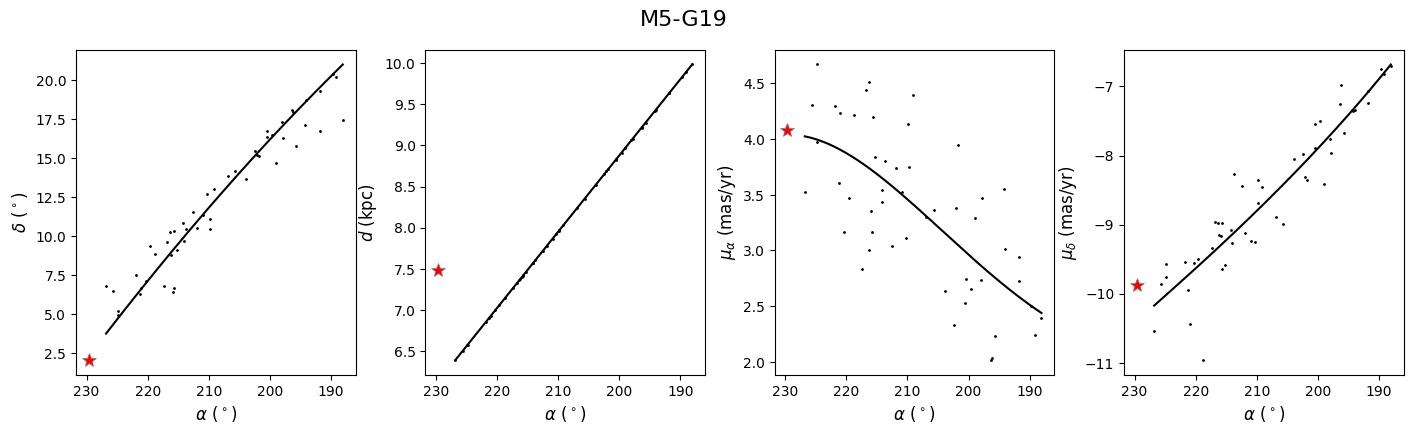

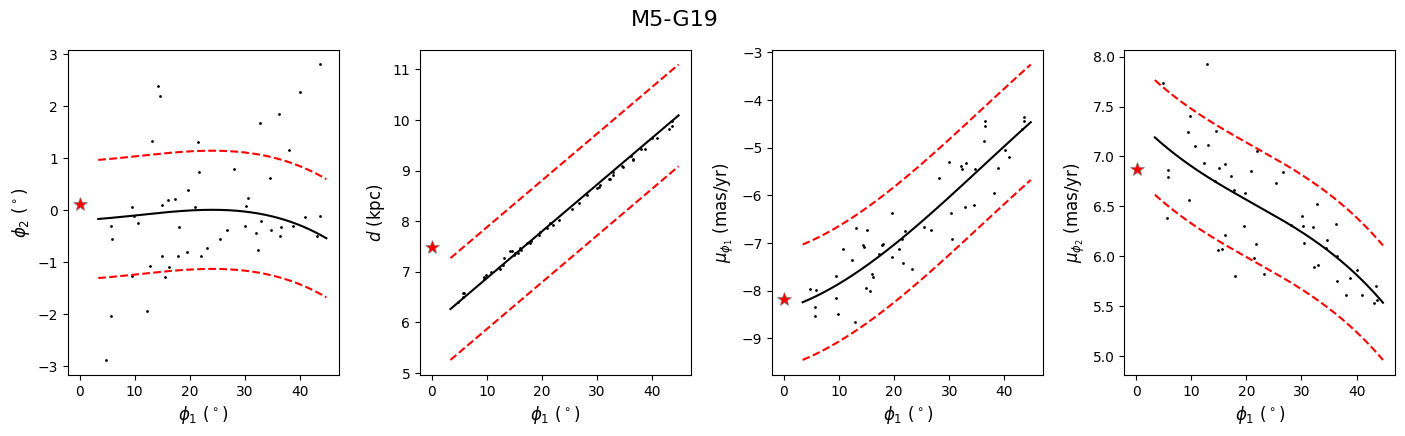

In [696]:
glob_st = glob_g.transform_to(mwsts['M5-G19'].stream_frame)


M5_G19_g = ac.SkyCoord(ra=M5_G19.ra_dr2*u.deg,
                          dec=M5_G19.dec_dr2*u.deg,
                          distance=((15-7.3)/(134-217)*(M5_G19.ra_dr2-217)+7.3)*u.kpc, #Orbit prediction
                          pm_ra_cosdec=M5_G19.pm_ra_cosdec*u.mas/u.yr,
                          pm_dec=M5_G19.pm_dec*u.mas/u.yr,
                          radial_velocity=np.zeros(len(M5_G19.pm_dec))*u.km/u.s)
    
M5_G19_c = M5_G19_g.transform_to(mwsts['M5-G19'].stream_frame)

print('width_phi2:',np.std(M5_G19_c.phi2.value))
print('width_pmphi1:',np.std(M5_G19_c.pm_phi1_cosphi2.value))
print('width_pmphi2:',np.std(M5_G19_c.pm_phi2.value))
print('width_dist:',np.std(M5_G19_g.distance.value))

widths.loc['M5-G19'].width_phi2 = np.std(M5_G19_c.phi2.value)
widths.loc['M5-G19'].width_dist = np.std(M5_G19_g.distance.value)
widths.loc['M5-G19'].width_pmphi1 = np.std(M5_G19_c.pm_phi1_cosphi2.value)
widths.loc['M5-G19'].width_pmphi2 = np.std(M5_G19_c.pm_phi2.value)


fig=plt.figure(1,figsize=(15,5))    
fig.subplots_adjust(wspace=0.25,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax=fig.add_subplot(141)
ax.plot(mwsts['M5-G19'].track.ra, mwsts['M5-G19'].track.dec,'-k', lw=1.5, zorder=99)
ax.plot(M5_G19_g.ra, M5_G19_g.dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\delta$ ($^\circ$)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(142)
ax.plot(mwsts['M5-G19'].track.ra, ((15-7.3)/(134-217)*(mwsts['M5-G19'].track.ra.value-217)+7.3),'-k', lw=1.5, zorder=99) #en galstreams la pendiente está al reves
ax.plot(M5_G19_g.ra, M5_G19_g.distance,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$d$ (kpc)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(143)
ax.plot(mwsts['M5-G19'].track.ra, mwsts['M5-G19'].track.pm_ra_cosdec,'-k', lw=1.5,zorder=99)
ax.plot(M5_G19_g.ra, M5_G19_g.pm_ra_cosdec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_ra_cosdec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\\alpha$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(144)
ax.plot(mwsts['M5-G19'].track.ra, mwsts['M5-G19'].track.pm_dec,'-k', lw=1.5,zorder=100)
ax.plot(M5_G19_g.ra, M5_G19_g.pm_dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\delta$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

plt.suptitle('M5-G19',fontsize=16);


fig2=plt.figure(2,figsize=(15,5))    
fig2.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax2=fig2.add_subplot(141)
ax2.plot(mwsts['M5-G19'].track.transform_to(mwsts['M5-G19'].stream_frame).phi1, mwsts['M5-G19'].track.transform_to(mwsts['M5-G19'].stream_frame).phi2,'-k', lw=1.5, zorder=99)
ax2.plot(M5_G19_c.phi1, M5_G19_c.phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.phi1, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['M5-G19'].track.transform_to(mwsts['M5-G19'].stream_frame).phi1, mwsts['M5-G19'].track.transform_to(mwsts['M5-G19'].stream_frame).phi2 + n*widths.loc['M5-G19'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['M5-G19'].track.transform_to(mwsts['M5-G19'].stream_frame).phi1, mwsts['M5-G19'].track.transform_to(mwsts['M5-G19'].stream_frame).phi2 - n*widths.loc['M5-G19'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\phi_2$ ($^\circ$)',fontsize=12)

ax2=fig2.add_subplot(142)
ax2.plot(mwsts['M5-G19'].track.transform_to(mwsts['M5-G19'].stream_frame).phi1, (max(M5_G19_c.distance.value)-min(M5_G19_c.distance.value))/(max(M5_G19_c.phi1.value) - min(M5_G19_c.phi1.value))*(mwsts['M5-G19'].track.transform_to(mwsts['M5-G19'].stream_frame).phi1.value - max(M5_G19_c.phi1.value)) + max(M5_G19_c.distance.value),'-k', lw=1.5, zorder=99)
ax2.plot(M5_G19_c.phi1, M5_G19_c.distance,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['M5-G19'].track.transform_to(mwsts['M5-G19'].stream_frame).phi1, (max(M5_G19_c.distance.value)-min(M5_G19_c.distance.value))/(max(M5_G19_c.phi1.value) - min(M5_G19_c.phi1.value))*(mwsts['M5-G19'].track.transform_to(mwsts['M5-G19'].stream_frame).phi1.value - max(M5_G19_c.phi1.value)) + max(M5_G19_c.distance.value) + n*widths.loc['M5-G19'].width_dist/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['M5-G19'].track.transform_to(mwsts['M5-G19'].stream_frame).phi1, (max(M5_G19_c.distance.value)-min(M5_G19_c.distance.value))/(max(M5_G19_c.phi1.value) - min(M5_G19_c.phi1.value))*(mwsts['M5-G19'].track.transform_to(mwsts['M5-G19'].stream_frame).phi1.value - max(M5_G19_c.phi1.value)) + max(M5_G19_c.distance.value) - n*widths.loc['M5-G19'].width_dist/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$d$ (kpc)',fontsize=12)

ax2=fig2.add_subplot(143)
ax2.plot(mwsts['M5-G19'].track.transform_to(mwsts['M5-G19'].stream_frame).phi1, mwsts['M5-G19'].track.transform_to(mwsts['M5-G19'].stream_frame).pm_phi1_cosphi2,'-k', lw=1.5,zorder=99)
ax2.plot(M5_G19_c.phi1, M5_G19_c.pm_phi1_cosphi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi1_cosphi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['M5-G19'].track.transform_to(mwsts['M5-G19'].stream_frame).phi1, mwsts['M5-G19'].track.transform_to(mwsts['M5-G19'].stream_frame).pm_phi1_cosphi2 + n*widths.loc['M5-G19'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['M5-G19'].track.transform_to(mwsts['M5-G19'].stream_frame).phi1, mwsts['M5-G19'].track.transform_to(mwsts['M5-G19'].stream_frame).pm_phi1_cosphi2 - n*widths.loc['M5-G19'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_1}$ (mas/yr)',fontsize=12)

ax2=fig2.add_subplot(144)
ax2.plot(mwsts['M5-G19'].track.transform_to(mwsts['M5-G19'].stream_frame).phi1, mwsts['M5-G19'].track.transform_to(mwsts['M5-G19'].stream_frame).pm_phi2,'-k', lw=1.5,zorder=100)
ax2.plot(M5_G19_c.phi1, M5_G19_c.pm_phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['M5-G19'].track.transform_to(mwsts['M5-G19'].stream_frame).phi1, mwsts['M5-G19'].track.transform_to(mwsts['M5-G19'].stream_frame).pm_phi2 + n*widths.loc['M5-G19'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['M5-G19'].track.transform_to(mwsts['M5-G19'].stream_frame).phi1, mwsts['M5-G19'].track.transform_to(mwsts['M5-G19'].stream_frame).pm_phi2 - n*widths.loc['M5-G19'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_2}$ (mas/yr)',fontsize=12)

plt.suptitle('M5-G19',fontsize=16);

width_phi2: 0.4249554534553439
width_pmphi1: 0.8282084739807919
width_pmphi2: 0.9367853455231767
width_dist: 0.6388333962060125


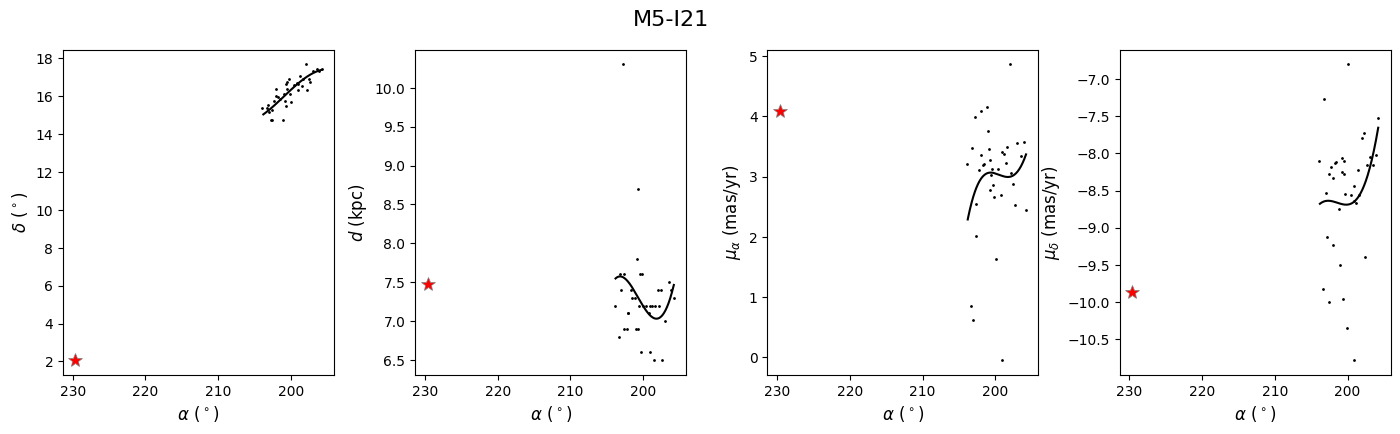

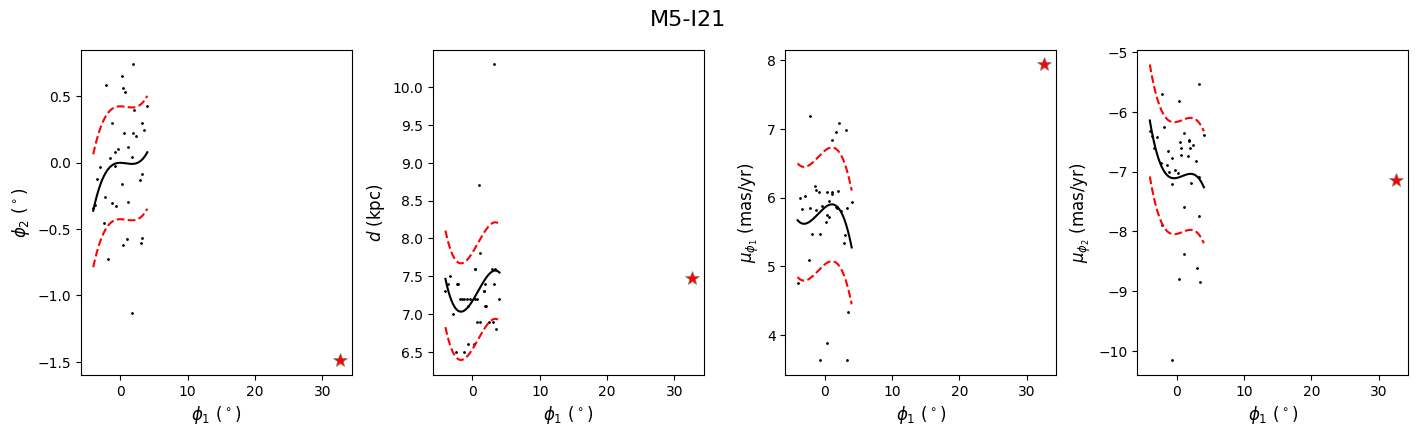

In [713]:
glob_st = glob_g.transform_to(mwsts['M5-I21'].stream_frame)


M5_I21 = I21[I21.StreamName=='M5']

M5_I21_g = ac.SkyCoord(ra=np.array(M5_I21.ra_epoch2000)*u.deg,
                                  dec=np.array(M5_I21.dec_epoch2000)*u.deg,
                                  distance=np.array(M5_I21.dis)*u.kpc,
                                  pm_ra_cosdec=np.array(M5_I21.pmra)*u.mas/u.yr,
                                  pm_dec=np.array(M5_I21.pmdec)*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(M5_I21.pmdec))*u.km/u.s)
    
M5_I21_c = M5_I21_g.transform_to(mwsts['M5-I21'].stream_frame)

print('width_phi2:',np.std(M5_I21_c.phi2.value))
print('width_pmphi1:',np.std(M5_I21_c.pm_phi1_cosphi2.value))
print('width_pmphi2:',np.std(M5_I21_c.pm_phi2.value))
print('width_dist:',np.std(M5_I21_g.distance.value))

widths.loc['M5-I21'].width_phi2 = np.std(M5_I21_c.phi2.value)
widths.loc['M5-I21'].width_dist = np.std(M5_I21_g.distance.value)
widths.loc['M5-I21'].width_pmphi1 = np.std(M5_I21_c.pm_phi1_cosphi2.value)
widths.loc['M5-I21'].width_pmphi2 = np.std(M5_I21_c.pm_phi2.value)

fig=plt.figure(1,figsize=(15,5))    
fig.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax=fig.add_subplot(141)
ax.plot(mwsts['M5-I21'].track.ra, mwsts['M5-I21'].track.dec,'-k', lw=1.5, zorder=99)
ax.plot(M5_I21_g.ra, M5_I21_g.dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\delta$ ($^\circ$)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(142)
ax.plot(mwsts['M5-I21'].track.ra, mwsts['M5-I21'].track.distance,'-k', lw=1.5, zorder=99)
ax.plot(M5_I21_g.ra, M5_I21_g.distance,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$d$ (kpc)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(143)
ax.plot(mwsts['M5-I21'].track.ra, mwsts['M5-I21'].track.pm_ra_cosdec,'-k', lw=1.5,zorder=99)
ax.plot(M5_I21_g.ra, M5_I21_g.pm_ra_cosdec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_ra_cosdec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\\alpha$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(144)
ax.plot(mwsts['M5-I21'].track.ra, mwsts['M5-I21'].track.pm_dec,'-k', lw=1.5,zorder=100)
ax.plot(M5_I21_g.ra, M5_I21_g.pm_dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\delta$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

plt.suptitle('M5-I21',fontsize=16);


fig2=plt.figure(2,figsize=(15,5))    
fig2.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax2=fig2.add_subplot(141)
ax2.plot(mwsts['M5-I21'].track.transform_to(mwsts['M5-I21'].stream_frame).phi1, mwsts['M5-I21'].track.transform_to(mwsts['M5-I21'].stream_frame).phi2,'-k', lw=1.5, zorder=99)
ax2.plot(M5_I21_c.phi1, M5_I21_c.phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['M5-I21'].track.transform_to(mwsts['M5-I21'].stream_frame).phi1, mwsts['M5-I21'].track.transform_to(mwsts['M5-I21'].stream_frame).phi2 + n*widths.loc['M5-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['M5-I21'].track.transform_to(mwsts['M5-I21'].stream_frame).phi1, mwsts['M5-I21'].track.transform_to(mwsts['M5-I21'].stream_frame).phi2 - n*widths.loc['M5-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\phi_2$ ($^\circ$)',fontsize=12)

ax2=fig2.add_subplot(142)
ax2.plot(mwsts['M5-I21'].track.transform_to(mwsts['M5-I21'].stream_frame).phi1, mwsts['M5-I21'].track.distance,'-k', lw=1.5, zorder=99)
ax2.plot(M5_I21_c.phi1, M5_I21_g.distance,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['M5-I21'].track.transform_to(mwsts['M5-I21'].stream_frame).phi1, mwsts['M5-I21'].track.distance + n*widths.loc['M5-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['M5-I21'].track.transform_to(mwsts['M5-I21'].stream_frame).phi1, mwsts['M5-I21'].track.distance - n*widths.loc['M5-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$d$ (kpc)',fontsize=12)

ax2=fig2.add_subplot(143)
ax2.plot(mwsts['M5-I21'].track.transform_to(mwsts['M5-I21'].stream_frame).phi1, mwsts['M5-I21'].track.transform_to(mwsts['M5-I21'].stream_frame).pm_phi1_cosphi2,'-k', lw=1.5,zorder=99)
ax2.plot(M5_I21_c.phi1, M5_I21_c.pm_phi1_cosphi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi1_cosphi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['M5-I21'].track.transform_to(mwsts['M5-I21'].stream_frame).phi1, mwsts['M5-I21'].track.transform_to(mwsts['M5-I21'].stream_frame).pm_phi1_cosphi2 + n*widths.loc['M5-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['M5-I21'].track.transform_to(mwsts['M5-I21'].stream_frame).phi1, mwsts['M5-I21'].track.transform_to(mwsts['M5-I21'].stream_frame).pm_phi1_cosphi2 - n*widths.loc['M5-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_1}$ (mas/yr)',fontsize=12)

ax2=fig2.add_subplot(144)
ax2.plot(mwsts['M5-I21'].track.transform_to(mwsts['M5-I21'].stream_frame).phi1, mwsts['M5-I21'].track.transform_to(mwsts['M5-I21'].stream_frame).pm_phi2,'-k', lw=1.5,zorder=100)
ax2.plot(M5_I21_c.phi1, M5_I21_c.pm_phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['M5-I21'].track.transform_to(mwsts['M5-I21'].stream_frame).phi1, mwsts['M5-I21'].track.transform_to(mwsts['M5-I21'].stream_frame).pm_phi2 + n*widths.loc['M5-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['M5-I21'].track.transform_to(mwsts['M5-I21'].stream_frame).phi1, mwsts['M5-I21'].track.transform_to(mwsts['M5-I21'].stream_frame).pm_phi2 - n*widths.loc['M5-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_2}$ (mas/yr)',fontsize=12)

plt.suptitle('M5-I21',fontsize=16);

## M92

In [710]:
globs_ = globs[globs['Name'] == 'NGC 6341']

globs_d = pd.read_csv('../catalogs/globular_clusters_Baumgardt&Vasiliev2021.txt', header=0, sep='\s+')
globs_d_ = globs_d[globs_d.Cluster == 'NGC_6341']

glob_g = ac.SkyCoord(ra=globs_.RAJ2000[0]*u.deg,
                      dec=globs_.DEJ2000[0]*u.deg,
                      distance=float(globs_d_.Rsun.values[0])*u.kpc,
                      pm_ra_cosdec=globs_.pmRA[0]*u.mas/u.yr,
                      pm_dec=globs_.pmDE[0]*u.mas/u.yr,
                      radial_velocity=0*u.km/u.s)

width_phi2: 2.1219838391363814
width_pmphi1: 0.8759723308852245
width_pmphi2: 1.0759509394442104
width_dist: 1.5031542798780326


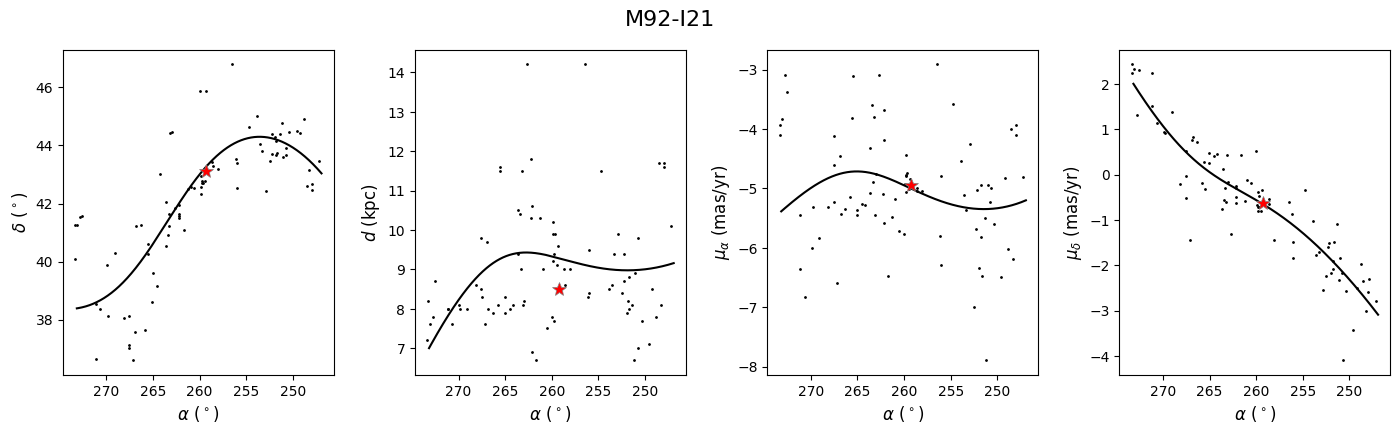

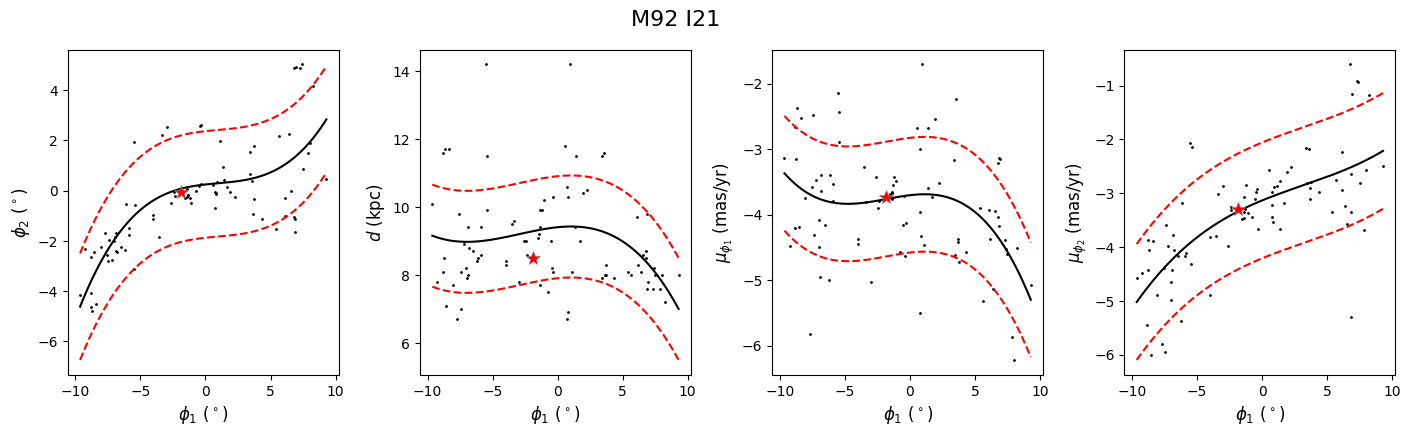

In [711]:
glob_st = glob_g.transform_to(mwsts['M92-I21'].stream_frame)

M92_I21 = I21[I21.StreamName=='M92']

M92_I21_g = ac.SkyCoord(ra=np.array(M92_I21.ra_epoch2000)*u.deg,
                                  dec=np.array(M92_I21.dec_epoch2000)*u.deg,
                                  distance=np.array(M92_I21.dis)*u.kpc,
                                  pm_ra_cosdec=np.array(M92_I21.pmra)*u.mas/u.yr,
                                  pm_dec=np.array(M92_I21.pmdec)*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(M92_I21.pmdec))*u.km/u.s)
    
M92_I21_c = M92_I21_g.transform_to(mwsts['M92-I21'].stream_frame)

print('width_phi2:',np.std(M92_I21_c.phi2.value))
print('width_pmphi1:',np.std(M92_I21_c.pm_phi1_cosphi2.value))
print('width_pmphi2:',np.std(M92_I21_c.pm_phi2.value))
print('width_dist:',np.std(M92_I21_g.distance.value))

widths.loc['M92-I21'].width_phi2 = np.std(M92_I21_c.phi2.value)
widths.loc['M92-I21'].width_dist = np.std(M92_I21_g.distance.value)
widths.loc['M92-I21'].width_pmphi1 = np.std(M92_I21_c.pm_phi1_cosphi2.value)
widths.loc['M92-I21'].width_pmphi2 = np.std(M92_I21_c.pm_phi2.value)


fig=plt.figure(1,figsize=(15,5))    
fig.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax=fig.add_subplot(141)
ax.plot(mwsts['M92-I21'].track.ra, mwsts['M92-I21'].track.dec,'-k', lw=1.5, zorder=99)
ax.plot(M92_I21_g.ra, M92_I21_g.dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\delta$ ($^\circ$)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(142)
ax.plot(mwsts['M92-I21'].track.ra, mwsts['M92-I21'].track.distance,'-k', lw=1.5, zorder=99)
ax.plot(M92_I21_g.ra, M92_I21_g.distance,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$d$ (kpc)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(143)
ax.plot(mwsts['M92-I21'].track.ra, mwsts['M92-I21'].track.pm_ra_cosdec,'-k', lw=1.5,zorder=99)
ax.plot(M92_I21_g.ra, M92_I21_g.pm_ra_cosdec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_ra_cosdec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\\alpha$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(144)
ax.plot(mwsts['M92-I21'].track.ra, mwsts['M92-I21'].track.pm_dec,'-k', lw=1.5,zorder=100)
ax.plot(M92_I21_g.ra, M92_I21_g.pm_dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\delta$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

plt.suptitle('M92-I21',fontsize=16);


fig2=plt.figure(2,figsize=(15,5))    
fig2.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax2=fig2.add_subplot(141)
ax2.plot(mwsts['M92-I21'].track.transform_to(mwsts['M92-I21'].stream_frame).phi1, mwsts['M92-I21'].track.transform_to(mwsts['M92-I21'].stream_frame).phi2,'-k', lw=1.5, zorder=99)
ax2.plot(M92_I21_c.phi1, M92_I21_c.phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['M92-I21'].track.transform_to(mwsts['M92-I21'].stream_frame).phi1, mwsts['M92-I21'].track.transform_to(mwsts['M92-I21'].stream_frame).phi2 + n*widths.loc['M92-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['M92-I21'].track.transform_to(mwsts['M92-I21'].stream_frame).phi1, mwsts['M92-I21'].track.transform_to(mwsts['M92-I21'].stream_frame).phi2 - n*widths.loc['M92-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\phi_2$ ($^\circ$)',fontsize=12)

ax2=fig2.add_subplot(142)
ax2.plot(mwsts['M92-I21'].track.transform_to(mwsts['M92-I21'].stream_frame).phi1, mwsts['M92-I21'].track.distance,'-k', lw=1.5, zorder=99)
ax2.plot(M92_I21_c.phi1, M92_I21_g.distance,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['M92-I21'].track.transform_to(mwsts['M92-I21'].stream_frame).phi1, mwsts['M92-I21'].track.distance + n*widths.loc['M92-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['M92-I21'].track.transform_to(mwsts['M92-I21'].stream_frame).phi1, mwsts['M92-I21'].track.distance - n*widths.loc['M92-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$d$ (kpc)',fontsize=12)

ax2=fig2.add_subplot(143)
ax2.plot(mwsts['M92-I21'].track.transform_to(mwsts['M92-I21'].stream_frame).phi1, mwsts['M92-I21'].track.transform_to(mwsts['M92-I21'].stream_frame).pm_phi1_cosphi2,'-k', lw=1.5,zorder=99)
ax2.plot(M92_I21_c.phi1, M92_I21_c.pm_phi1_cosphi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi1_cosphi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['M92-I21'].track.transform_to(mwsts['M92-I21'].stream_frame).phi1, mwsts['M92-I21'].track.transform_to(mwsts['M92-I21'].stream_frame).pm_phi1_cosphi2 + n*widths.loc['M92-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['M92-I21'].track.transform_to(mwsts['M92-I21'].stream_frame).phi1, mwsts['M92-I21'].track.transform_to(mwsts['M92-I21'].stream_frame).pm_phi1_cosphi2 - n*widths.loc['M92-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_1}$ (mas/yr)',fontsize=12)

ax2=fig2.add_subplot(144)
ax2.plot(mwsts['M92-I21'].track.transform_to(mwsts['M92-I21'].stream_frame).phi1, mwsts['M92-I21'].track.transform_to(mwsts['M92-I21'].stream_frame).pm_phi2,'-k', lw=1.5,zorder=100)
ax2.plot(M92_I21_c.phi1, M92_I21_c.pm_phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['M92-I21'].track.transform_to(mwsts['M92-I21'].stream_frame).phi1, mwsts['M92-I21'].track.transform_to(mwsts['M92-I21'].stream_frame).pm_phi2 + n*widths.loc['M92-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['M92-I21'].track.transform_to(mwsts['M92-I21'].stream_frame).phi1, mwsts['M92-I21'].track.transform_to(mwsts['M92-I21'].stream_frame).pm_phi2 - n*widths.loc['M92-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_2}$ (mas/yr)',fontsize=12)

plt.suptitle('M92 I21',fontsize=16);

## NGC 1261

In [810]:
globs_ = globs[globs['Name'] == 'NGC 1261']

globs_d = pd.read_csv('../catalogs/globular_clusters_Baumgardt&Vasiliev2021.txt', header=0, sep='\s+')
globs_d_ = globs_d[globs_d.Cluster == 'NGC_1261']

glob_g = ac.SkyCoord(ra=globs_.RAJ2000[0]*u.deg,
                      dec=globs_.DEJ2000[0]*u.deg,
                      distance=float(globs_d_.Rsun.values[0])*u.kpc,
                      pm_ra_cosdec=globs_.pmRA[0]*u.mas/u.yr,
                      pm_dec=globs_.pmDE[0]*u.mas/u.yr,
                      radial_velocity=0*u.km/u.s)

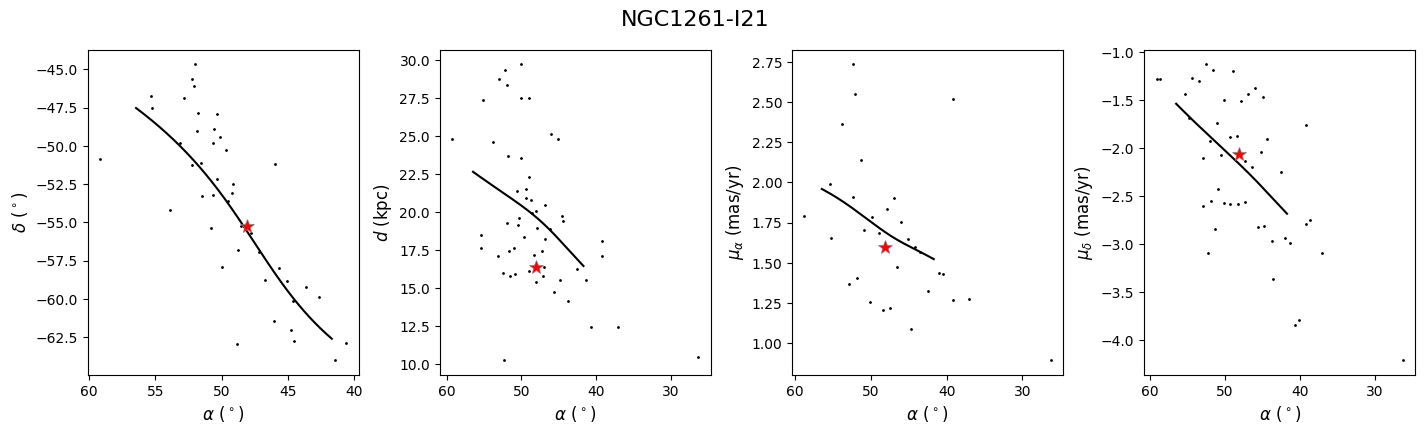

In [811]:
fig=plt.figure(1,figsize=(15,5))    
fig.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax=fig.add_subplot(141)
ax.plot(mwsts['NGC1261-I21'].track.ra, mwsts['NGC1261-I21'].track.dec,'-k', lw=1.5)
ax.plot(NGC1261_I21radec[0],NGC1261_I21radec[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\delta$ ($^\circ$)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(142)
ax.plot(mwsts['NGC1261-I21'].track.ra, mwsts['NGC1261-I21'].track.distance,'-k', lw=1.5)
ax.plot(NGC1261_I21rad[0],NGC1261_I21rad[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$d$ (kpc)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(143)
ax.plot(mwsts['NGC1261-I21'].track.ra, mwsts['NGC1261-I21'].track.pm_ra_cosdec,'-k', lw=1.5)
ax.plot(NGC1261_I21rapmra[0],NGC1261_I21rapmra[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_ra_cosdec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\\alpha$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(144)
ax.plot(mwsts['NGC1261-I21'].track.ra, mwsts['NGC1261-I21'].track.pm_dec,'-k', lw=1.5)
ax.plot(NGC1261_I21rapmdec[0],NGC1261_I21rapmdec[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\delta$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

plt.suptitle('NGC1261-I21',fontsize=16);

width_phi2: 1.2978769540067718
width_pmphi1: 0.45203474828159007
width_pmphi2: 0.3495011756447455
width_dist: 4.69363156833731


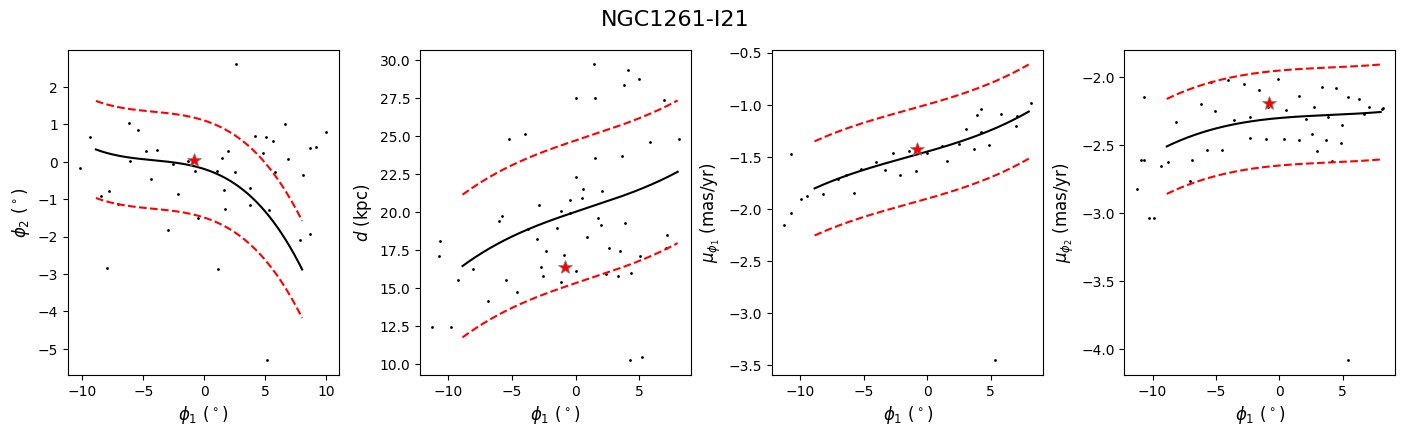

In [812]:
glob_st = glob_g.transform_to(mwsts['NGC1261-I21'].stream_frame)

def model1(phi1, a, b, c, d):
    return a + b*(phi1) + c*(phi1)**2 + d*(phi1)**3

params_radec, _ = curve_fit(model1, mwsts['NGC1261-I21'].track.ra.value, mwsts['NGC1261-I21'].track.dec.value, maxfev=5000)
params_rad, _ = curve_fit(model1, mwsts['NGC1261-I21'].track.ra.value, mwsts['NGC1261-I21'].track.distance.value, maxfev=5000)
params_rapmra, _ = curve_fit(model1, mwsts['NGC1261-I21'].track.ra.value, mwsts['NGC1261-I21'].track.pm_ra_cosdec.value, maxfev=5000)
params_rapmdec, _ = curve_fit(model1, mwsts['NGC1261-I21'].track.ra.value, mwsts['NGC1261-I21'].track.pm_dec.value, maxfev=5000)

decd = model1(NGC1261_I21rad[0].values, params_radec[0], params_radec[1], params_radec[2], params_radec[3])
decpmra = model1(NGC1261_I21rapmra[0].values, params_radec[0], params_radec[1], params_radec[2], params_radec[3])
decpmdec = model1(NGC1261_I21rapmdec[0].values, params_radec[0], params_radec[1], params_radec[2], params_radec[3])

ddec = model1(NGC1261_I21radec[0].values, params_rad[0], params_rad[1], params_rad[2], params_rad[3])
dpmra = model1(NGC1261_I21rapmra[0].values, params_rad[0], params_rad[1], params_rad[2], params_rad[3])
dpmdec = model1(NGC1261_I21rapmdec[0].values, params_rad[0], params_rad[1], params_rad[2], params_rad[3])

pmradec = model1(NGC1261_I21radec[0].values, params_rapmra[0], params_rapmra[1], params_rapmra[2], params_rapmra[3])
pmrad = model1(NGC1261_I21rad[0].values, params_rapmra[0], params_rapmra[1], params_rapmra[2], params_rapmra[3])
pmrapmdec = model1(NGC1261_I21rapmdec[0].values, params_rapmra[0], params_rapmra[1], params_rapmra[2], params_rapmra[3])

pmdecdec = model1(NGC1261_I21radec[0].values, params_rapmdec[0], params_rapmdec[1], params_rapmdec[2], params_rapmdec[3])
pmdecd = model1(NGC1261_I21rad[0].values, params_rapmdec[0], params_rapmdec[1], params_rapmdec[2], params_rapmdec[3])
pmdecpmra = model1(NGC1261_I21rapmra[0].values, params_rapmdec[0], params_rapmdec[1], params_rapmdec[2], params_rapmdec[3])


NGC1261_radec_g = ac.SkyCoord(ra=NGC1261_I21radec[0].values*u.deg,
                              dec=NGC1261_I21radec[1].values*u.deg)
NGC1261_phi12_c = NGC1261_radec_g.transform_to(mwsts['NGC1261-I21'].stream_frame)
print('width_phi2:', np.std(NGC1261_phi12_c.phi2).value)



NGC1261_rapmra_g = ac.SkyCoord(ra=NGC1261_I21rapmra[0].values*u.deg,
                                  dec=decpmra*u.deg,
                                  pm_ra_cosdec=NGC1261_I21rapmra[1].values*u.mas/u.yr,
                                  pm_dec=pmdecpmra*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(NGC1261_I21rapmra[0]))*u.km/u.s)  
NGC1261_phi1pmphi1_c = NGC1261_rapmra_g.transform_to(mwsts['NGC1261-I21'].stream_frame)
print('width_pmphi1:', np.std(NGC1261_phi1pmphi1_c.pm_phi1_cosphi2).value)



NGC1261_rapmdec_g = ac.SkyCoord(ra=NGC1261_I21rapmdec[0].values*u.deg,
                                  dec=decpmdec*u.deg,
                                  pm_ra_cosdec=pmrapmdec*u.mas/u.yr,
                                  pm_dec=NGC1261_I21rapmdec[1].values*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(NGC1261_I21rapmdec[0]))*u.km/u.s)  
NGC1261_phi1pmphi2_c = NGC1261_rapmdec_g.transform_to(mwsts['NGC1261-I21'].stream_frame)
print('width_pmphi2:', np.std(NGC1261_phi1pmphi2_c.pm_phi2).value)



NGC1261_rad_g = ac.SkyCoord(ra=NGC1261_I21rad[0].values*u.deg,
                            dec=decd*u.deg,
                            distance=NGC1261_I21rad[1].values*u.kpc)
    
NGC1261_phi1d_c = NGC1261_rad_g.transform_to(mwsts['NGC1261-I21'].stream_frame)
print('width_dist:', np.std(NGC1261_I21rad[1]))

# widths.loc['NGC1261-I21'] = [np.std(NGC1261_phi12_c.phi2).value, np.std(NGC1261_I21rad[1]), np.std(NGC1261_phi1pmphi1_c.pm_phi1_cosphi2).value, np.std(NGC1261_phi1pmphi2_c.pm_phi2).value]
widths.loc['NGC1261-I21'].width_phi2 = np.std(NGC1261_phi12_c.phi2).value
widths.loc['NGC1261-I21'].width_dist =  np.std(NGC1261_I21rad[1])
widths.loc['NGC1261-I21'].width_pmphi1 = np.std(NGC1261_phi1pmphi1_c.pm_phi1_cosphi2).value
widths.loc['NGC1261-I21'].width_pmphi2 = np.std(NGC1261_phi1pmphi2_c.pm_phi2).value


fig2=plt.figure(2,figsize=(15,5))    
fig2.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax2=fig2.add_subplot(141)
ax2.plot(mwsts['NGC1261-I21'].track.transform_to(mwsts['NGC1261-I21'].stream_frame).phi1, mwsts['NGC1261-I21'].track.transform_to(mwsts['NGC1261-I21'].stream_frame).phi2,'-k', lw=1.5, zorder=99)
ax2.plot(NGC1261_phi12_c.phi1, NGC1261_phi12_c.phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC1261-I21'].track.transform_to(mwsts['NGC1261-I21'].stream_frame).phi1, mwsts['NGC1261-I21'].track.transform_to(mwsts['NGC1261-I21'].stream_frame).phi2 + n*widths.loc['NGC1261-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC1261-I21'].track.transform_to(mwsts['NGC1261-I21'].stream_frame).phi1, mwsts['NGC1261-I21'].track.transform_to(mwsts['NGC1261-I21'].stream_frame).phi2 - n*widths.loc['NGC1261-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\phi_2$ ($^\circ$)',fontsize=12)

ax2=fig2.add_subplot(142)
ax2.plot(mwsts['NGC1261-I21'].track.transform_to(mwsts['NGC1261-I21'].stream_frame).phi1, mwsts['NGC1261-I21'].track.distance,'-k', lw=1.5, zorder=99)
ax2.plot(NGC1261_phi1d_c.phi1, NGC1261_phi1d_c.distance,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC1261-I21'].track.transform_to(mwsts['NGC1261-I21'].stream_frame).phi1, mwsts['NGC1261-I21'].track.distance + n*widths.loc['NGC1261-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC1261-I21'].track.transform_to(mwsts['NGC1261-I21'].stream_frame).phi1, mwsts['NGC1261-I21'].track.distance - n*widths.loc['NGC1261-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$d$ (kpc)',fontsize=12)

ax2=fig2.add_subplot(143)
ax2.plot(mwsts['NGC1261-I21'].track.transform_to(mwsts['NGC1261-I21'].stream_frame).phi1, mwsts['NGC1261-I21'].track.transform_to(mwsts['NGC1261-I21'].stream_frame).pm_phi1_cosphi2,'-k', lw=1.5,zorder=99)
ax2.plot(NGC1261_phi1pmphi1_c.phi1, NGC1261_phi1pmphi1_c.pm_phi1_cosphi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi1_cosphi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC1261-I21'].track.transform_to(mwsts['NGC1261-I21'].stream_frame).phi1, mwsts['NGC1261-I21'].track.transform_to(mwsts['NGC1261-I21'].stream_frame).pm_phi1_cosphi2 + n*widths.loc['NGC1261-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC1261-I21'].track.transform_to(mwsts['NGC1261-I21'].stream_frame).phi1, mwsts['NGC1261-I21'].track.transform_to(mwsts['NGC1261-I21'].stream_frame).pm_phi1_cosphi2 - n*widths.loc['NGC1261-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_1}$ (mas/yr)',fontsize=12)

ax2=fig2.add_subplot(144)
ax2.plot(mwsts['NGC1261-I21'].track.transform_to(mwsts['NGC1261-I21'].stream_frame).phi1, mwsts['NGC1261-I21'].track.transform_to(mwsts['NGC1261-I21'].stream_frame).pm_phi2,'-k', lw=1.5,zorder=100)
ax2.plot(NGC1261_phi1pmphi2_c.phi1, NGC1261_phi1pmphi2_c.pm_phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC1261-I21'].track.transform_to(mwsts['NGC1261-I21'].stream_frame).phi1, mwsts['NGC1261-I21'].track.transform_to(mwsts['NGC1261-I21'].stream_frame).pm_phi2 + n*widths.loc['NGC1261-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC1261-I21'].track.transform_to(mwsts['NGC1261-I21'].stream_frame).phi1, mwsts['NGC1261-I21'].track.transform_to(mwsts['NGC1261-I21'].stream_frame).pm_phi2 - n*widths.loc['NGC1261-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_2}$ (mas/yr)',fontsize=12)

plt.suptitle('NGC1261-I21',fontsize=16);

## NGC 1851

In [813]:
globs_ = globs[globs['Name'] == 'NGC 1851']

globs_d = pd.read_csv('../catalogs/globular_clusters_Baumgardt&Vasiliev2021.txt', header=0, sep='\s+')
globs_d_ = globs_d[globs_d.Cluster == 'NGC_1851']

glob_g = ac.SkyCoord(ra=globs_.RAJ2000[0]*u.deg,
                      dec=globs_.DEJ2000[0]*u.deg,
                      distance=float(globs_d_.Rsun.values[0])*u.kpc,
                      pm_ra_cosdec=globs_.pmRA[0]*u.mas/u.yr,
                      pm_dec=globs_.pmDE[0]*u.mas/u.yr,
                      radial_velocity=0*u.km/u.s)

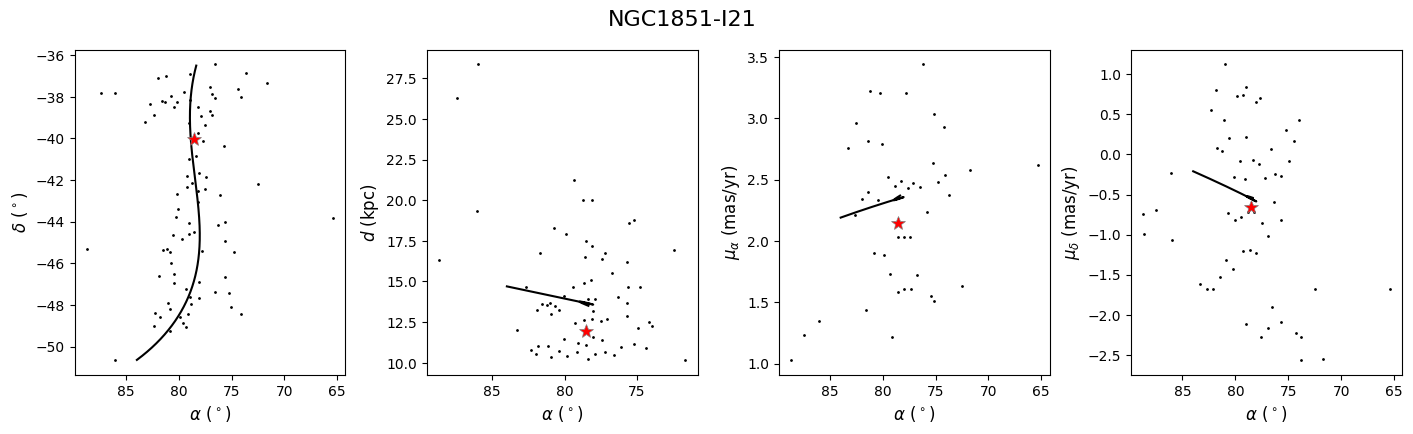

In [814]:
fig=plt.figure(1,figsize=(15,5))    
fig.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax=fig.add_subplot(141)
ax.plot(mwsts['NGC1851-I21'].track.ra, mwsts['NGC1851-I21'].track.dec,'-k', lw=1.5)
ax.plot(NGC1851_I21radec[0],NGC1851_I21radec[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\delta$ ($^\circ$)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(142)
ax.plot(mwsts['NGC1851-I21'].track.ra, mwsts['NGC1851-I21'].track.distance,'-k', lw=1.5)
ax.plot(NGC1851_I21rad[0],NGC1851_I21rad[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$d$ (kpc)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(143)
ax.plot(mwsts['NGC1851-I21'].track.ra, mwsts['NGC1851-I21'].track.pm_ra_cosdec,'-k', lw=1.5)
ax.plot(NGC1851_I21rapmra[0],NGC1851_I21rapmra[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_ra_cosdec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\\alpha$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(144)
ax.plot(mwsts['NGC1851-I21'].track.ra, mwsts['NGC1851-I21'].track.pm_dec,'-k', lw=1.5)
ax.plot(NGC1851_I21rapmdec[0],NGC1851_I21rapmdec[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\delta$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

plt.suptitle('NGC1851-I21',fontsize=16);

width_phi2: 2.4427673882630465
width_pmphi1: 0.1487162978105273
width_pmphi2: 0.09510174967908312
width_dist: 3.5933853353584815


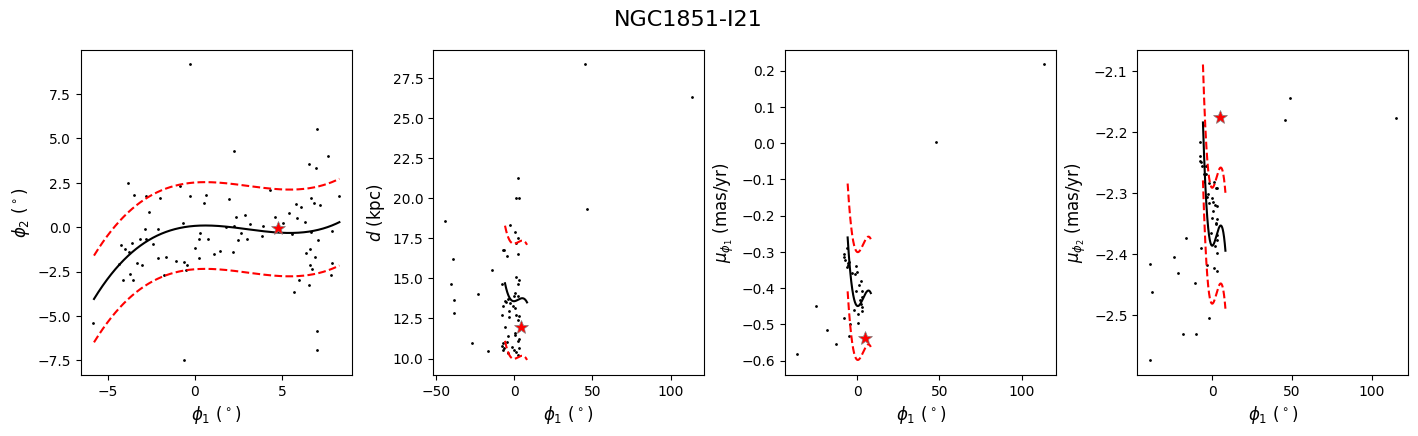

In [815]:
glob_st = glob_g.transform_to(mwsts['NGC1851-I21'].stream_frame)

def model1(phi1, a, b, c, d):
    return a + b*(phi1) + c*(phi1)**2 + d*(phi1)**3

params_radec, _ = curve_fit(model1, mwsts['NGC1851-I21'].track.ra.value, mwsts['NGC1851-I21'].track.dec.value, maxfev=5000)
params_rad, _ = curve_fit(model1, mwsts['NGC1851-I21'].track.ra.value, mwsts['NGC1851-I21'].track.distance.value, maxfev=5000)
params_rapmra, _ = curve_fit(model1, mwsts['NGC1851-I21'].track.ra.value, mwsts['NGC1851-I21'].track.pm_ra_cosdec.value, maxfev=5000)
params_rapmdec, _ = curve_fit(model1, mwsts['NGC1851-I21'].track.ra.value, mwsts['NGC1851-I21'].track.pm_dec.value, maxfev=5000)

decd = model1(NGC1851_I21rad[0].values, params_radec[0], params_radec[1], params_radec[2], params_radec[3])
decpmra = model1(NGC1851_I21rapmra[0].values, params_radec[0], params_radec[1], params_radec[2], params_radec[3])
decpmdec = model1(NGC1851_I21rapmdec[0].values, params_radec[0], params_radec[1], params_radec[2], params_radec[3])

ddec = model1(NGC1851_I21radec[0].values, params_rad[0], params_rad[1], params_rad[2], params_rad[3])
dpmra = model1(NGC1851_I21rapmra[0].values, params_rad[0], params_rad[1], params_rad[2], params_rad[3])
dpmdec = model1(NGC1851_I21rapmdec[0].values, params_rad[0], params_rad[1], params_rad[2], params_rad[3])

pmradec = model1(NGC1851_I21radec[0].values, params_rapmra[0], params_rapmra[1], params_rapmra[2], params_rapmra[3])
pmrad = model1(NGC1851_I21rad[0].values, params_rapmra[0], params_rapmra[1], params_rapmra[2], params_rapmra[3])
pmrapmdec = model1(NGC1851_I21rapmdec[0].values, params_rapmra[0], params_rapmra[1], params_rapmra[2], params_rapmra[3])

pmdecdec = model1(NGC1851_I21radec[0].values, params_rapmdec[0], params_rapmdec[1], params_rapmdec[2], params_rapmdec[3])
pmdecd = model1(NGC1851_I21rad[0].values, params_rapmdec[0], params_rapmdec[1], params_rapmdec[2], params_rapmdec[3])
pmdecpmra = model1(NGC1851_I21rapmra[0].values, params_rapmdec[0], params_rapmdec[1], params_rapmdec[2], params_rapmdec[3])


NGC1851_radec_g = ac.SkyCoord(ra=NGC1851_I21radec[0].values*u.deg,
                              dec=NGC1851_I21radec[1].values*u.deg)
NGC1851_phi12_c = NGC1851_radec_g.transform_to(mwsts['NGC1851-I21'].stream_frame)
print('width_phi2:', np.std(NGC1851_phi12_c.phi2).value)



NGC1851_rapmra_g = ac.SkyCoord(ra=NGC1851_I21rapmra[0].values[(decpmra>-90) & (decpmra<90)]*u.deg,
                                  dec=decpmra[(decpmra>-90) & (decpmra<90)]*u.deg,
                                  pm_ra_cosdec=NGC1851_I21rapmra[1].values[(decpmra>-90) & (decpmra<90)]*u.mas/u.yr,
                                  pm_dec=pmdecpmra[(decpmra>-90) & (decpmra<90)]*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(NGC1851_I21rapmra[0][(decpmra>-90) & (decpmra<90)]))*u.km/u.s)  
NGC1851_phi1pmphi1_c = NGC1851_rapmra_g.transform_to(mwsts['NGC1851-I21'].stream_frame)
print('width_pmphi1:', np.std(NGC1851_phi1pmphi1_c.pm_phi1_cosphi2).value)



NGC1851_rapmdec_g = ac.SkyCoord(ra=NGC1851_I21rapmdec[0].values[(decpmdec>-90) & (decpmdec<90)]*u.deg,
                                  dec=decpmdec[(decpmdec>-90) & (decpmdec<90)]*u.deg,
                                  pm_ra_cosdec=pmrapmdec[(decpmdec>-90) & (decpmdec<90)]*u.mas/u.yr,
                                  pm_dec=NGC1851_I21rapmdec[1].values[(decpmdec>-90) & (decpmdec<90)]*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(NGC1851_I21rapmdec[0][(decpmdec>-90) & (decpmdec<90)]))*u.km/u.s)  
NGC1851_phi1pmphi2_c = NGC1851_rapmdec_g.transform_to(mwsts['NGC1851-I21'].stream_frame)
print('width_pmphi2:', np.std(NGC1851_phi1pmphi2_c.pm_phi2).value)



NGC1851_rad_g = ac.SkyCoord(ra=NGC1851_I21rad[0][(decd>-90) & (decd<90)].values*u.deg,
                            dec=decd[(decd>-90) & (decd<90)]*u.deg,
                            distance=NGC1851_I21rad[1].values[(decd>-90) & (decd<90)]*u.kpc)
    
NGC1851_phi1d_c = NGC1851_rad_g.transform_to(mwsts['NGC1851-I21'].stream_frame)
print('width_dist:', np.std(NGC1851_I21rad[1]))

# widths.loc['NGC1851-I21'] = [np.std(NGC1851_phi12_c.phi2).value, np.std(NGC1851_I21rad[1]), np.std(NGC1851_phi1pmphi1_c.pm_phi1_cosphi2).value, np.std(NGC1851_phi1pmphi2_c.pm_phi2).value]
widths.loc['NGC1851-I21'].width_phi2 = np.std(NGC1851_phi12_c.phi2).value
widths.loc['NGC1851-I21'].width_dist =  np.std(NGC1851_I21rad[1])
widths.loc['NGC1851-I21'].width_pmphi1 = np.std(NGC1851_phi1pmphi1_c.pm_phi1_cosphi2).value
widths.loc['NGC1851-I21'].width_pmphi2 = np.std(NGC1851_phi1pmphi2_c.pm_phi2).value


fig2=plt.figure(2,figsize=(15,5))    
fig2.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax2=fig2.add_subplot(141)
ax2.plot(mwsts['NGC1851-I21'].track.transform_to(mwsts['NGC1851-I21'].stream_frame).phi1, mwsts['NGC1851-I21'].track.transform_to(mwsts['NGC1851-I21'].stream_frame).phi2,'-k', lw=1.5, zorder=99)
ax2.plot(NGC1851_phi12_c.phi1, NGC1851_phi12_c.phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC1851-I21'].track.transform_to(mwsts['NGC1851-I21'].stream_frame).phi1, mwsts['NGC1851-I21'].track.transform_to(mwsts['NGC1851-I21'].stream_frame).phi2 + n*widths.loc['NGC1851-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC1851-I21'].track.transform_to(mwsts['NGC1851-I21'].stream_frame).phi1, mwsts['NGC1851-I21'].track.transform_to(mwsts['NGC1851-I21'].stream_frame).phi2 - n*widths.loc['NGC1851-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\phi_2$ ($^\circ$)',fontsize=12)

ax2=fig2.add_subplot(142)
ax2.plot(mwsts['NGC1851-I21'].track.transform_to(mwsts['NGC1851-I21'].stream_frame).phi1, mwsts['NGC1851-I21'].track.distance,'-k', lw=1.5, zorder=99)
ax2.plot(NGC1851_phi1d_c.phi1, NGC1851_phi1d_c.distance,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC1851-I21'].track.transform_to(mwsts['NGC1851-I21'].stream_frame).phi1, mwsts['NGC1851-I21'].track.distance + n*widths.loc['NGC1851-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC1851-I21'].track.transform_to(mwsts['NGC1851-I21'].stream_frame).phi1, mwsts['NGC1851-I21'].track.distance - n*widths.loc['NGC1851-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$d$ (kpc)',fontsize=12)

ax2=fig2.add_subplot(143)
ax2.plot(mwsts['NGC1851-I21'].track.transform_to(mwsts['NGC1851-I21'].stream_frame).phi1, mwsts['NGC1851-I21'].track.transform_to(mwsts['NGC1851-I21'].stream_frame).pm_phi1_cosphi2,'-k', lw=1.5,zorder=99)
ax2.plot(NGC1851_phi1pmphi1_c.phi1, NGC1851_phi1pmphi1_c.pm_phi1_cosphi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi1_cosphi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC1851-I21'].track.transform_to(mwsts['NGC1851-I21'].stream_frame).phi1, mwsts['NGC1851-I21'].track.transform_to(mwsts['NGC1851-I21'].stream_frame).pm_phi1_cosphi2 + n*widths.loc['NGC1851-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC1851-I21'].track.transform_to(mwsts['NGC1851-I21'].stream_frame).phi1, mwsts['NGC1851-I21'].track.transform_to(mwsts['NGC1851-I21'].stream_frame).pm_phi1_cosphi2 - n*widths.loc['NGC1851-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_1}$ (mas/yr)',fontsize=12)

ax2=fig2.add_subplot(144)
ax2.plot(mwsts['NGC1851-I21'].track.transform_to(mwsts['NGC1851-I21'].stream_frame).phi1, mwsts['NGC1851-I21'].track.transform_to(mwsts['NGC1851-I21'].stream_frame).pm_phi2,'-k', lw=1.5,zorder=100)
ax2.plot(NGC1851_phi1pmphi2_c.phi1, NGC1851_phi1pmphi2_c.pm_phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC1851-I21'].track.transform_to(mwsts['NGC1851-I21'].stream_frame).phi1, mwsts['NGC1851-I21'].track.transform_to(mwsts['NGC1851-I21'].stream_frame).pm_phi2 + n*widths.loc['NGC1851-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC1851-I21'].track.transform_to(mwsts['NGC1851-I21'].stream_frame).phi1, mwsts['NGC1851-I21'].track.transform_to(mwsts['NGC1851-I21'].stream_frame).pm_phi2 - n*widths.loc['NGC1851-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_2}$ (mas/yr)',fontsize=12)

plt.suptitle('NGC1851-I21',fontsize=16);

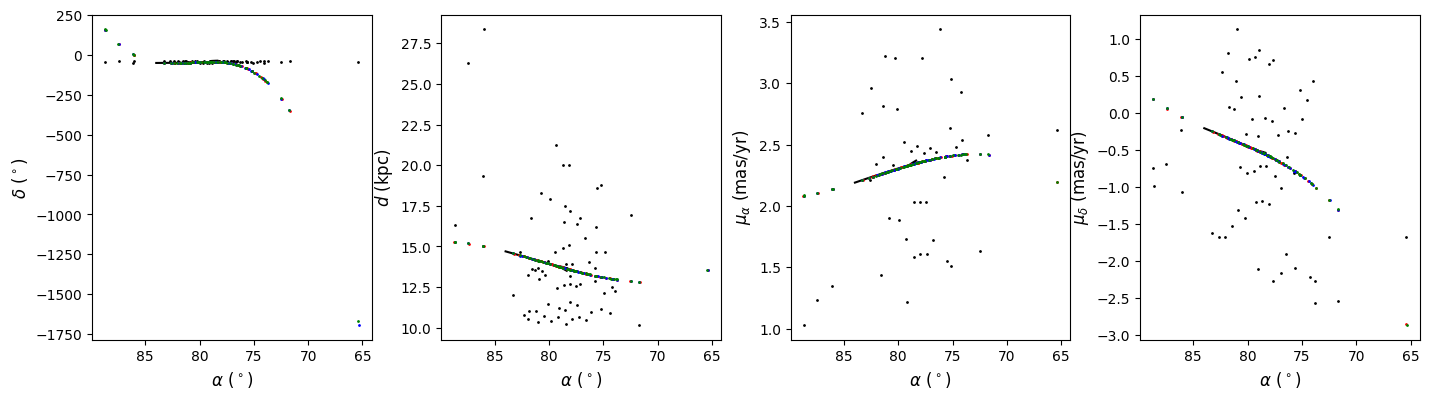

In [798]:
fig=plt.figure(1,figsize=(15,5))    
fig.subplots_adjust(wspace=0.25,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax=fig.add_subplot(141)
ax.plot(mwsts['NGC1851-I21'].track.ra, mwsts['NGC1851-I21'].track.dec,'-k', lw=1.5)
ax.plot(NGC1851_I21radec[0],NGC1851_I21radec[1],'.k',ms=2)
ax.plot(NGC1851_I21rad[0],decd,'.r',ms=2)
ax.plot(NGC1851_I21rapmra[0],decpmra,'.b',ms=2)
ax.plot(NGC1851_I21rapmdec[0],decpmdec,'.g',ms=2)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\delta$ ($^\circ$)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(142)
ax.plot(mwsts['NGC1851-I21'].track.ra, mwsts['NGC1851-I21'].track.distance,'-k', lw=1.5)
ax.plot(NGC1851_I21rad[0],NGC1851_I21rad[1],'.k',ms=2)
ax.plot(NGC1851_I21radec[0],ddec,'.r',ms=2)
ax.plot(NGC1851_I21rapmra[0],dpmra,'.b',ms=2)
ax.plot(NGC1851_I21rapmdec[0],dpmdec,'.g',ms=2)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$d$ (kpc)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(143)
ax.plot(mwsts['NGC1851-I21'].track.ra, mwsts['NGC1851-I21'].track.pm_ra_cosdec,'-k', lw=1.5)
ax.plot(NGC1851_I21rapmra[0],NGC1851_I21rapmra[1],'.k',ms=2)
ax.plot(NGC1851_I21radec[0],pmradec,'.r',ms=2)
ax.plot(NGC1851_I21rad[0],pmrad,'.b',ms=2)
ax.plot(NGC1851_I21rapmdec[0],pmrapmdec,'.g',ms=2)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\\alpha$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(144)
ax.plot(mwsts['NGC1851-I21'].track.ra, mwsts['NGC1851-I21'].track.pm_dec,'-k', lw=1.5)
ax.plot(NGC1851_I21rapmdec[0],NGC1851_I21rapmdec[1],'.k',ms=2)
ax.plot(NGC1851_I21radec[0],pmdecdec,'.r',ms=2)
ax.plot(NGC1851_I21rad[0],pmdecd,'.b',ms=2)
ax.plot(NGC1851_I21rapmra[0],pmdecpmra,'.g',ms=2)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\delta$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

## NGC 2808

In [816]:
globs_ = globs[globs['Name'] == 'NGC 2808']

globs_d = pd.read_csv('../catalogs/globular_clusters_Baumgardt&Vasiliev2021.txt', header=0, sep='\s+')
globs_d_ = globs_d[globs_d.Cluster == 'NGC_2808']

glob_g = ac.SkyCoord(ra=globs_.RAJ2000[0]*u.deg,
                      dec=globs_.DEJ2000[0]*u.deg,
                      distance=float(globs_d_.Rsun.values[0])*u.kpc,
                      pm_ra_cosdec=globs_.pmRA[0]*u.mas/u.yr,
                      pm_dec=globs_.pmDE[0]*u.mas/u.yr,
                      radial_velocity=0*u.km/u.s)

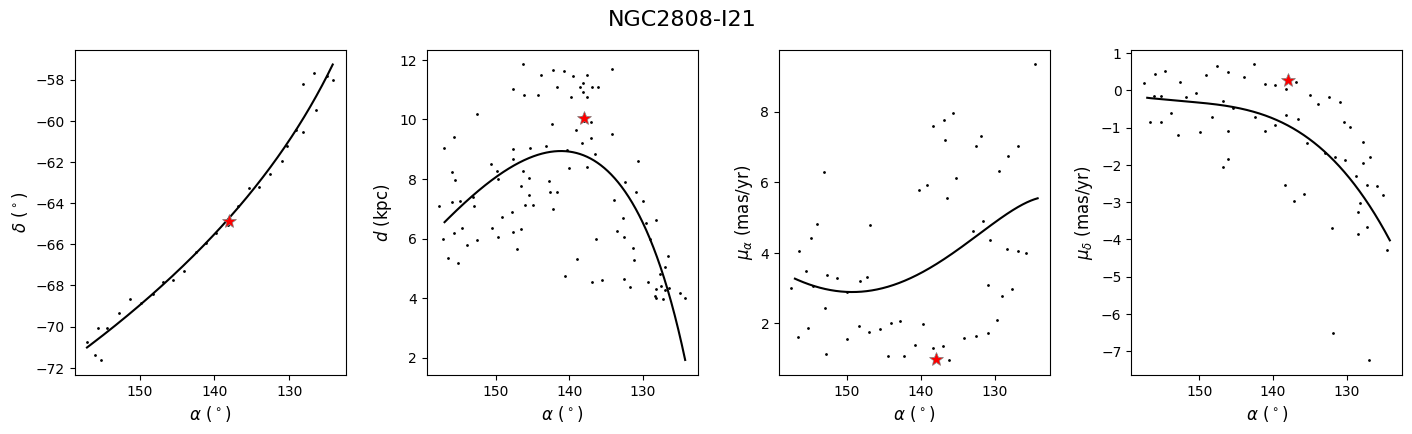

In [817]:
fig=plt.figure(1,figsize=(15,5))    
fig.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax=fig.add_subplot(141)
ax.plot(mwsts['NGC2808-I21'].track.ra, mwsts['NGC2808-I21'].track.dec,'-k', lw=1.5)
ax.plot(NGC2808_I21radec[0],NGC2808_I21radec[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\delta$ ($^\circ$)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(142)
ax.plot(mwsts['NGC2808-I21'].track.ra, mwsts['NGC2808-I21'].track.distance,'-k', lw=1.5)
ax.plot(NGC2808_I21rad[0],NGC2808_I21rad[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$d$ (kpc)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(143)
ax.plot(mwsts['NGC2808-I21'].track.ra, mwsts['NGC2808-I21'].track.pm_ra_cosdec,'-k', lw=1.5)
ax.plot(NGC2808_I21rapmra[0],NGC2808_I21rapmra[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_ra_cosdec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\\alpha$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(144)
ax.plot(mwsts['NGC2808-I21'].track.ra, mwsts['NGC2808-I21'].track.pm_dec,'-k', lw=1.5)
ax.plot(NGC2808_I21rapmdec[0],NGC2808_I21rapmdec[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\delta$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

plt.suptitle('NGC2808-I21',fontsize=16);

width_phi2: 0.5103590706296047
width_pmphi1: 1.777028580299567
width_pmphi2: 0.9401157261671104
width_dist: 2.2917516406457863


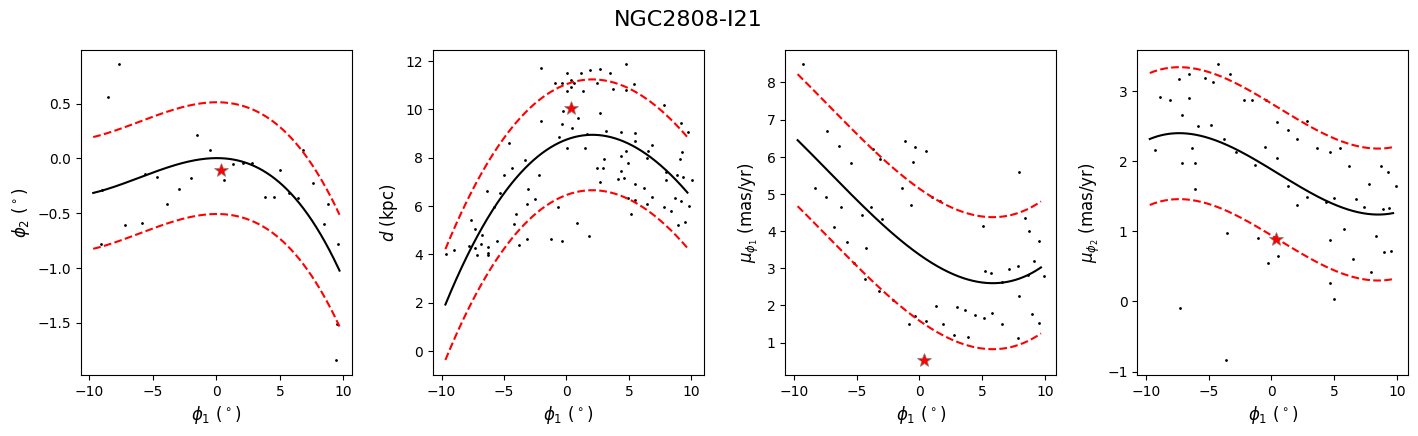

In [818]:
glob_st = glob_g.transform_to(mwsts['NGC2808-I21'].stream_frame)

def model1(phi1, a, b, c, d):
    return a + b*(phi1) + c*(phi1)**2 + d*(phi1)**3

params_radec, _ = curve_fit(model1, mwsts['NGC2808-I21'].track.ra.value, mwsts['NGC2808-I21'].track.dec.value, maxfev=5000)
params_rad, _ = curve_fit(model1, mwsts['NGC2808-I21'].track.ra.value, mwsts['NGC2808-I21'].track.distance.value, maxfev=5000)
params_rapmra, _ = curve_fit(model1, mwsts['NGC2808-I21'].track.ra.value, mwsts['NGC2808-I21'].track.pm_ra_cosdec.value, maxfev=5000)
params_rapmdec, _ = curve_fit(model1, mwsts['NGC2808-I21'].track.ra.value, mwsts['NGC2808-I21'].track.pm_dec.value, maxfev=5000)

decd = model1(NGC2808_I21rad[0].values, params_radec[0], params_radec[1], params_radec[2], params_radec[3])
decpmra = model1(NGC2808_I21rapmra[0].values, params_radec[0], params_radec[1], params_radec[2], params_radec[3])
decpmdec = model1(NGC2808_I21rapmdec[0].values, params_radec[0], params_radec[1], params_radec[2], params_radec[3])

ddec = model1(NGC2808_I21radec[0].values, params_rad[0], params_rad[1], params_rad[2], params_rad[3])
dpmra = model1(NGC2808_I21rapmra[0].values, params_rad[0], params_rad[1], params_rad[2], params_rad[3])
dpmdec = model1(NGC2808_I21rapmdec[0].values, params_rad[0], params_rad[1], params_rad[2], params_rad[3])

pmradec = model1(NGC2808_I21radec[0].values, params_rapmra[0], params_rapmra[1], params_rapmra[2], params_rapmra[3])
pmrad = model1(NGC2808_I21rad[0].values, params_rapmra[0], params_rapmra[1], params_rapmra[2], params_rapmra[3])
pmrapmdec = model1(NGC2808_I21rapmdec[0].values, params_rapmra[0], params_rapmra[1], params_rapmra[2], params_rapmra[3])

pmdecdec = model1(NGC2808_I21radec[0].values, params_rapmdec[0], params_rapmdec[1], params_rapmdec[2], params_rapmdec[3])
pmdecd = model1(NGC2808_I21rad[0].values, params_rapmdec[0], params_rapmdec[1], params_rapmdec[2], params_rapmdec[3])
pmdecpmra = model1(NGC2808_I21rapmra[0].values, params_rapmdec[0], params_rapmdec[1], params_rapmdec[2], params_rapmdec[3])


NGC2808_radec_g = ac.SkyCoord(ra=NGC2808_I21radec[0].values*u.deg,
                              dec=NGC2808_I21radec[1].values*u.deg)
NGC2808_phi12_c = NGC2808_radec_g.transform_to(mwsts['NGC2808-I21'].stream_frame)
print('width_phi2:', np.std(NGC2808_phi12_c.phi2).value)



NGC2808_rapmra_g = ac.SkyCoord(ra=NGC2808_I21rapmra[0].values*u.deg,
                                  dec=decpmra*u.deg,
                                  pm_ra_cosdec=NGC2808_I21rapmra[1].values*u.mas/u.yr,
                                  pm_dec=pmdecpmra*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(NGC2808_I21rapmra[0]))*u.km/u.s)  
NGC2808_phi1pmphi1_c = NGC2808_rapmra_g.transform_to(mwsts['NGC2808-I21'].stream_frame)
print('width_pmphi1:', np.std(NGC2808_phi1pmphi1_c.pm_phi1_cosphi2).value)



NGC2808_rapmdec_g = ac.SkyCoord(ra=NGC2808_I21rapmdec[0].values*u.deg,
                                  dec=decpmdec*u.deg,
                                  pm_ra_cosdec=pmrapmdec*u.mas/u.yr,
                                  pm_dec=NGC2808_I21rapmdec[1].values*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(NGC2808_I21rapmdec[0]))*u.km/u.s)  
NGC2808_phi1pmphi2_c = NGC2808_rapmdec_g.transform_to(mwsts['NGC2808-I21'].stream_frame)
print('width_pmphi2:', np.std(NGC2808_phi1pmphi2_c.pm_phi2).value)



NGC2808_rad_g = ac.SkyCoord(ra=NGC2808_I21rad[0].values*u.deg,
                            dec=decd*u.deg,
                            distance=NGC2808_I21rad[1].values*u.kpc)
    
NGC2808_phi1d_c = NGC2808_rad_g.transform_to(mwsts['NGC2808-I21'].stream_frame)
print('width_dist:', np.std(NGC2808_I21rad[1]))

# widths.loc['NGC2808-I21'] = [np.std(NGC2808_phi12_c.phi2).value, np.std(NGC2808_I21rad[1]), np.std(NGC2808_phi1pmphi1_c.pm_phi1_cosphi2).value, np.std(NGC2808_phi1pmphi2_c.pm_phi2).value]
widths.loc['NGC2808-I21'].width_phi2 = np.std(NGC2808_phi12_c.phi2).value
widths.loc['NGC2808-I21'].width_dist =  np.std(NGC2808_I21rad[1])
widths.loc['NGC2808-I21'].width_pmphi1 = np.std(NGC2808_phi1pmphi1_c.pm_phi1_cosphi2).value
widths.loc['NGC2808-I21'].width_pmphi2 = np.std(NGC2808_phi1pmphi2_c.pm_phi2).value


fig2=plt.figure(2,figsize=(15,5))    
fig2.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax2=fig2.add_subplot(141)
ax2.plot(mwsts['NGC2808-I21'].track.transform_to(mwsts['NGC2808-I21'].stream_frame).phi1, mwsts['NGC2808-I21'].track.transform_to(mwsts['NGC2808-I21'].stream_frame).phi2,'-k', lw=1.5, zorder=99)
ax2.plot(NGC2808_phi12_c.phi1, NGC2808_phi12_c.phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC2808-I21'].track.transform_to(mwsts['NGC2808-I21'].stream_frame).phi1, mwsts['NGC2808-I21'].track.transform_to(mwsts['NGC2808-I21'].stream_frame).phi2 + n*widths.loc['NGC2808-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC2808-I21'].track.transform_to(mwsts['NGC2808-I21'].stream_frame).phi1, mwsts['NGC2808-I21'].track.transform_to(mwsts['NGC2808-I21'].stream_frame).phi2 - n*widths.loc['NGC2808-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\phi_2$ ($^\circ$)',fontsize=12)

ax2=fig2.add_subplot(142)
ax2.plot(mwsts['NGC2808-I21'].track.transform_to(mwsts['NGC2808-I21'].stream_frame).phi1, mwsts['NGC2808-I21'].track.distance,'-k', lw=1.5, zorder=99)
ax2.plot(NGC2808_phi1d_c.phi1, NGC2808_phi1d_c.distance,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC2808-I21'].track.transform_to(mwsts['NGC2808-I21'].stream_frame).phi1, mwsts['NGC2808-I21'].track.distance + n*widths.loc['NGC2808-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC2808-I21'].track.transform_to(mwsts['NGC2808-I21'].stream_frame).phi1, mwsts['NGC2808-I21'].track.distance - n*widths.loc['NGC2808-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$d$ (kpc)',fontsize=12)

ax2=fig2.add_subplot(143)
ax2.plot(mwsts['NGC2808-I21'].track.transform_to(mwsts['NGC2808-I21'].stream_frame).phi1, mwsts['NGC2808-I21'].track.transform_to(mwsts['NGC2808-I21'].stream_frame).pm_phi1_cosphi2,'-k', lw=1.5,zorder=99)
ax2.plot(NGC2808_phi1pmphi1_c.phi1, NGC2808_phi1pmphi1_c.pm_phi1_cosphi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi1_cosphi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC2808-I21'].track.transform_to(mwsts['NGC2808-I21'].stream_frame).phi1, mwsts['NGC2808-I21'].track.transform_to(mwsts['NGC2808-I21'].stream_frame).pm_phi1_cosphi2 + n*widths.loc['NGC2808-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC2808-I21'].track.transform_to(mwsts['NGC2808-I21'].stream_frame).phi1, mwsts['NGC2808-I21'].track.transform_to(mwsts['NGC2808-I21'].stream_frame).pm_phi1_cosphi2 - n*widths.loc['NGC2808-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_1}$ (mas/yr)',fontsize=12)

ax2=fig2.add_subplot(144)
ax2.plot(mwsts['NGC2808-I21'].track.transform_to(mwsts['NGC2808-I21'].stream_frame).phi1, mwsts['NGC2808-I21'].track.transform_to(mwsts['NGC2808-I21'].stream_frame).pm_phi2,'-k', lw=1.5,zorder=100)
ax2.plot(NGC2808_phi1pmphi2_c.phi1, NGC2808_phi1pmphi2_c.pm_phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC2808-I21'].track.transform_to(mwsts['NGC2808-I21'].stream_frame).phi1, mwsts['NGC2808-I21'].track.transform_to(mwsts['NGC2808-I21'].stream_frame).pm_phi2 + n*widths.loc['NGC2808-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC2808-I21'].track.transform_to(mwsts['NGC2808-I21'].stream_frame).phi1, mwsts['NGC2808-I21'].track.transform_to(mwsts['NGC2808-I21'].stream_frame).pm_phi2 - n*widths.loc['NGC2808-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_2}$ (mas/yr)',fontsize=12)

plt.suptitle('NGC2808-I21',fontsize=16);

## NGC288

In [690]:
globs_ = globs[globs['Name'] == 'NGC 288']

globs_d = pd.read_csv('../catalogs/globular_clusters_Baumgardt&Vasiliev2021.txt', header=0, sep='\s+')
globs_d_ = globs_d[globs_d.Cluster == 'NGC_288']

glob_g = ac.SkyCoord(ra=globs_.RAJ2000[0]*u.deg,
                      dec=globs_.DEJ2000[0]*u.deg,
                      distance=float(globs_d_.Rsun.values[0])*u.kpc,
                      pm_ra_cosdec=globs_.pmRA[0]*u.mas/u.yr,
                      pm_dec=globs_.pmDE[0]*u.mas/u.yr,
                      radial_velocity=0*u.km/u.s)

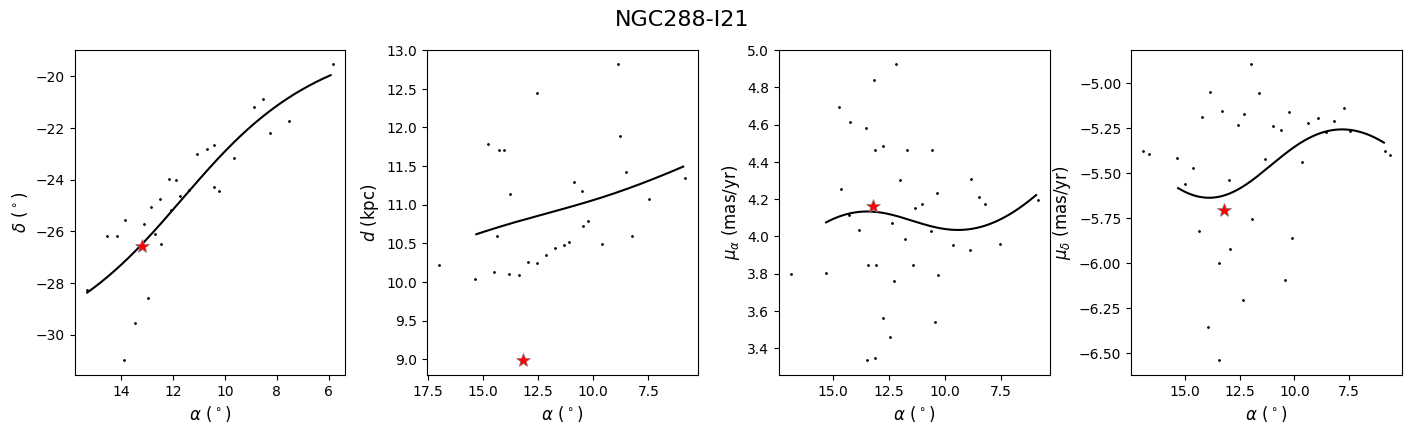

In [691]:
fig=plt.figure(1,figsize=(15,5))    
fig.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax=fig.add_subplot(141)
ax.plot(mwsts['NGC288-I21'].track.ra, mwsts['NGC288-I21'].track.dec,'-k', lw=1.5)
ax.plot(NGC288_I21radec[0],NGC288_I21radec[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\delta$ ($^\circ$)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(142)
ax.plot(mwsts['NGC288-I21'].track.ra, mwsts['NGC288-I21'].track.distance,'-k', lw=1.5)
ax.plot(NGC288_I21rad[0],NGC288_I21rad[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$d$ (kpc)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(143)
ax.plot(mwsts['NGC288-I21'].track.ra, mwsts['NGC288-I21'].track.pm_ra_cosdec,'-k', lw=1.5)
ax.plot(NGC288_I21rapmra[0],NGC288_I21rapmra[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_ra_cosdec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\\alpha$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(144)
ax.plot(mwsts['NGC288-I21'].track.ra, mwsts['NGC288-I21'].track.pm_dec,'-k', lw=1.5)
ax.plot(NGC288_I21rapmdec[0],NGC288_I21rapmdec[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\delta$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

plt.suptitle('NGC288-I21',fontsize=16);

width_phi2: 0.8857285804097068
width_pmphi1: 0.2711758914483351
width_pmphi2: 0.3154905310315967
width_dist: 0.733474770400302


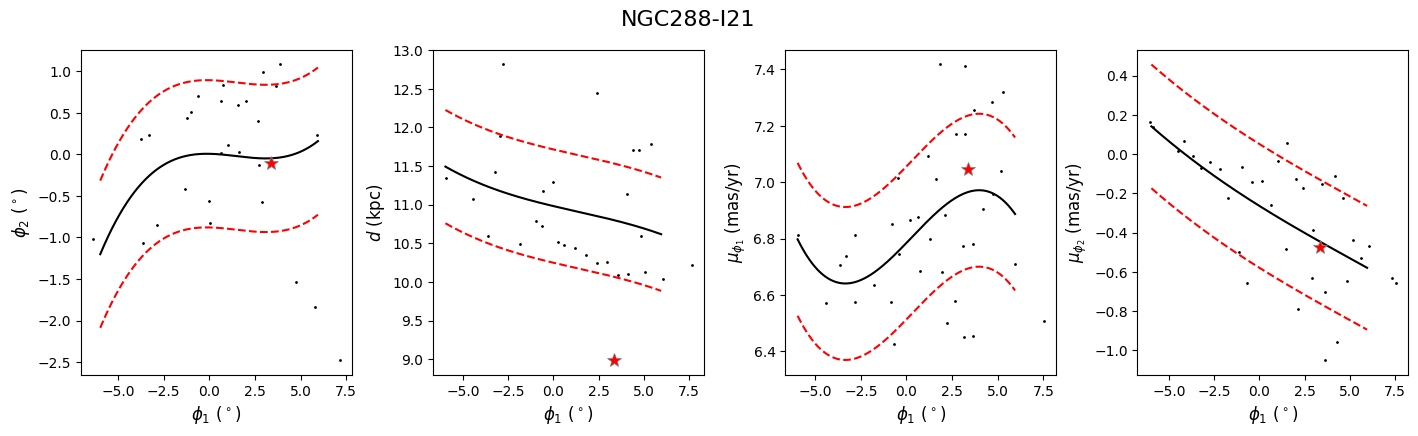

In [692]:
glob_st = glob_g.transform_to(mwsts['NGC288-I21'].stream_frame)

def model1(phi1, a, b, c, d):
    return a + b*(phi1) + c*(phi1)**2 + d*(phi1)**3

params_radec, _ = curve_fit(model1, mwsts['NGC288-I21'].track.ra.value, mwsts['NGC288-I21'].track.dec.value, maxfev=5000)
params_rad, _ = curve_fit(model1, mwsts['NGC288-I21'].track.ra.value, mwsts['NGC288-I21'].track.distance.value, maxfev=5000)
params_rapmra, _ = curve_fit(model1, mwsts['NGC288-I21'].track.ra.value, mwsts['NGC288-I21'].track.pm_ra_cosdec.value, maxfev=5000)
params_rapmdec, _ = curve_fit(model1, mwsts['NGC288-I21'].track.ra.value, mwsts['NGC288-I21'].track.pm_dec.value, maxfev=5000)

decd = model1(NGC288_I21rad[0].values, params_radec[0], params_radec[1], params_radec[2], params_radec[3])
decpmra = model1(NGC288_I21rapmra[0].values, params_radec[0], params_radec[1], params_radec[2], params_radec[3])
decpmdec = model1(NGC288_I21rapmdec[0].values, params_radec[0], params_radec[1], params_radec[2], params_radec[3])

ddec = model1(NGC288_I21radec[0].values, params_rad[0], params_rad[1], params_rad[2], params_rad[3])
dpmra = model1(NGC288_I21rapmra[0].values, params_rad[0], params_rad[1], params_rad[2], params_rad[3])
dpmdec = model1(NGC288_I21rapmdec[0].values, params_rad[0], params_rad[1], params_rad[2], params_rad[3])

pmradec = model1(NGC288_I21radec[0].values, params_rapmra[0], params_rapmra[1], params_rapmra[2], params_rapmra[3])
pmrad = model1(NGC288_I21rad[0].values, params_rapmra[0], params_rapmra[1], params_rapmra[2], params_rapmra[3])
pmrapmdec = model1(NGC288_I21rapmdec[0].values, params_rapmra[0], params_rapmra[1], params_rapmra[2], params_rapmra[3])

pmdecdec = model1(NGC288_I21radec[0].values, params_rapmdec[0], params_rapmdec[1], params_rapmdec[2], params_rapmdec[3])
pmdecd = model1(NGC288_I21rad[0].values, params_rapmdec[0], params_rapmdec[1], params_rapmdec[2], params_rapmdec[3])
pmdecpmra = model1(NGC288_I21rapmra[0].values, params_rapmdec[0], params_rapmdec[1], params_rapmdec[2], params_rapmdec[3])


NGC288_radec_g = ac.SkyCoord(ra=NGC288_I21radec[0].values*u.deg,
                              dec=NGC288_I21radec[1].values*u.deg)
NGC288_phi12_c = NGC288_radec_g.transform_to(mwsts['NGC288-I21'].stream_frame)
print('width_phi2:', np.std(NGC288_phi12_c.phi2).value)



NGC288_rapmra_g = ac.SkyCoord(ra=NGC288_I21rapmra[0].values*u.deg,
                                  dec=decpmra*u.deg,
                                  pm_ra_cosdec=NGC288_I21rapmra[1].values*u.mas/u.yr,
                                  pm_dec=pmdecpmra*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(NGC288_I21rapmra[0]))*u.km/u.s)  
NGC288_phi1pmphi1_c = NGC288_rapmra_g.transform_to(mwsts['NGC288-I21'].stream_frame)
print('width_pmphi1:', np.std(NGC288_phi1pmphi1_c.pm_phi1_cosphi2).value)



NGC288_rapmdec_g = ac.SkyCoord(ra=NGC288_I21rapmdec[0].values*u.deg,
                                  dec=decpmdec*u.deg,
                                  pm_ra_cosdec=pmrapmdec*u.mas/u.yr,
                                  pm_dec=NGC288_I21rapmdec[1].values*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(NGC288_I21rapmdec[0]))*u.km/u.s)  
NGC288_phi1pmphi2_c = NGC288_rapmdec_g.transform_to(mwsts['NGC288-I21'].stream_frame)
print('width_pmphi2:', np.std(NGC288_phi1pmphi2_c.pm_phi2).value)



NGC288_rad_g = ac.SkyCoord(ra=NGC288_I21rad[0].values*u.deg,
                            dec=decd*u.deg,
                            distance=NGC288_I21rad[1].values*u.kpc)
    
NGC288_phi1d_c = NGC288_rad_g.transform_to(mwsts['NGC288-I21'].stream_frame)
print('width_dist:', np.std(NGC288_I21rad[1]))


widths.loc['NGC288-I21'].width_phi2 = np.std(NGC288_phi12_c.phi2).value
widths.loc['NGC288-I21'].width_dist =  np.std(NGC288_I21rad[1])
widths.loc['NGC288-I21'].width_pmphi1 = np.std(NGC288_phi1pmphi1_c.pm_phi1_cosphi2).value
widths.loc['NGC288-I21'].width_pmphi2 = np.std(NGC288_phi1pmphi2_c.pm_phi2).value


fig2=plt.figure(2,figsize=(15,5))    
fig2.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax2=fig2.add_subplot(141)
ax2.plot(mwsts['NGC288-I21'].track.transform_to(mwsts['NGC288-I21'].stream_frame).phi1, mwsts['NGC288-I21'].track.transform_to(mwsts['NGC288-I21'].stream_frame).phi2,'-k', lw=1.5, zorder=99)
ax2.plot(NGC288_phi12_c.phi1, NGC288_phi12_c.phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC288-I21'].track.transform_to(mwsts['NGC288-I21'].stream_frame).phi1, mwsts['NGC288-I21'].track.transform_to(mwsts['NGC288-I21'].stream_frame).phi2 + n*widths.loc['NGC288-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC288-I21'].track.transform_to(mwsts['NGC288-I21'].stream_frame).phi1, mwsts['NGC288-I21'].track.transform_to(mwsts['NGC288-I21'].stream_frame).phi2 - n*widths.loc['NGC288-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\phi_2$ ($^\circ$)',fontsize=12)

ax2=fig2.add_subplot(142)
ax2.plot(mwsts['NGC288-I21'].track.transform_to(mwsts['NGC288-I21'].stream_frame).phi1, mwsts['NGC288-I21'].track.distance,'-k', lw=1.5, zorder=99)
ax2.plot(NGC288_phi1d_c.phi1, NGC288_phi1d_c.distance,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC288-I21'].track.transform_to(mwsts['NGC288-I21'].stream_frame).phi1, mwsts['NGC288-I21'].track.distance + n*widths.loc['NGC288-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC288-I21'].track.transform_to(mwsts['NGC288-I21'].stream_frame).phi1, mwsts['NGC288-I21'].track.distance - n*widths.loc['NGC288-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$d$ (kpc)',fontsize=12)

ax2=fig2.add_subplot(143)
ax2.plot(mwsts['NGC288-I21'].track.transform_to(mwsts['NGC288-I21'].stream_frame).phi1, mwsts['NGC288-I21'].track.transform_to(mwsts['NGC288-I21'].stream_frame).pm_phi1_cosphi2,'-k', lw=1.5,zorder=99)
ax2.plot(NGC288_phi1pmphi1_c.phi1, NGC288_phi1pmphi1_c.pm_phi1_cosphi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi1_cosphi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC288-I21'].track.transform_to(mwsts['NGC288-I21'].stream_frame).phi1, mwsts['NGC288-I21'].track.transform_to(mwsts['NGC288-I21'].stream_frame).pm_phi1_cosphi2 + n*widths.loc['NGC288-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC288-I21'].track.transform_to(mwsts['NGC288-I21'].stream_frame).phi1, mwsts['NGC288-I21'].track.transform_to(mwsts['NGC288-I21'].stream_frame).pm_phi1_cosphi2 - n*widths.loc['NGC288-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_1}$ (mas/yr)',fontsize=12)

ax2=fig2.add_subplot(144)
ax2.plot(mwsts['NGC288-I21'].track.transform_to(mwsts['NGC288-I21'].stream_frame).phi1, mwsts['NGC288-I21'].track.transform_to(mwsts['NGC288-I21'].stream_frame).pm_phi2,'-k', lw=1.5,zorder=100)
ax2.plot(NGC288_phi1pmphi2_c.phi1, NGC288_phi1pmphi2_c.pm_phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC288-I21'].track.transform_to(mwsts['NGC288-I21'].stream_frame).phi1, mwsts['NGC288-I21'].track.transform_to(mwsts['NGC288-I21'].stream_frame).pm_phi2 + n*widths.loc['NGC288-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC288-I21'].track.transform_to(mwsts['NGC288-I21'].stream_frame).phi1, mwsts['NGC288-I21'].track.transform_to(mwsts['NGC288-I21'].stream_frame).pm_phi2 - n*widths.loc['NGC288-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_2}$ (mas/yr)',fontsize=12)

plt.suptitle('NGC288-I21',fontsize=16);

## NGC2298

In [686]:
globs_ = globs[globs['Name'] == 'NGC 2298']

globs_d = pd.read_csv('../catalogs/globular_clusters_Baumgardt&Vasiliev2021.txt', header=0, sep='\s+')
globs_d_ = globs_d[globs_d.Cluster == 'NGC_2298']

glob_g = ac.SkyCoord(ra=globs_.RAJ2000[0]*u.deg,
                      dec=globs_.DEJ2000[0]*u.deg,
                      distance=float(globs_d_.Rsun.values[0])*u.kpc,
                      pm_ra_cosdec=globs_.pmRA[0]*u.mas/u.yr,
                      pm_dec=globs_.pmDE[0]*u.mas/u.yr,
                      radial_velocity=0*u.km/u.s)

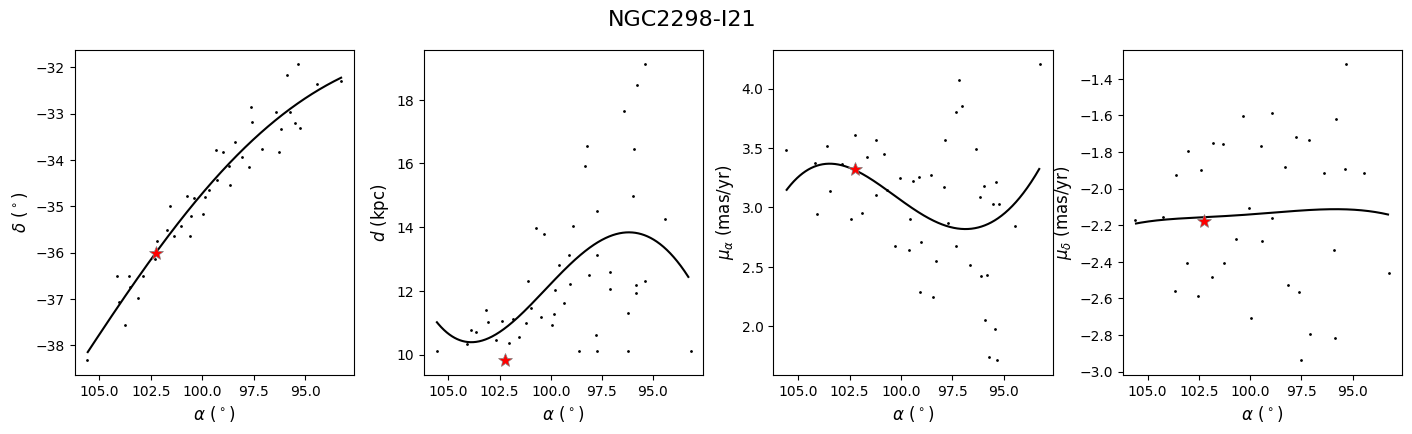

In [687]:
fig=plt.figure(1,figsize=(15,5))    
fig.subplots_adjust(wspace=0.25,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax=fig.add_subplot(141)
ax.plot(mwsts['NGC2298-I21'].track.ra, mwsts['NGC2298-I21'].track.dec,'-k', lw=1.5)
ax.plot(NGC2298_I21radec[0],NGC2298_I21radec[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\delta$ ($^\circ$)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(142)
ax.plot(mwsts['NGC2298-I21'].track.ra, mwsts['NGC2298-I21'].track.distance,'-k', lw=1.5)
ax.plot(NGC2298_I21rad[0],NGC2298_I21rad[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$d$ (kpc)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(143)
ax.plot(mwsts['NGC2298-I21'].track.ra, mwsts['NGC2298-I21'].track.pm_ra_cosdec,'-k', lw=1.5)
ax.plot(NGC2298_I21rapmra[0],NGC2298_I21rapmra[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_ra_cosdec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\\alpha$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(144)
ax.plot(mwsts['NGC2298-I21'].track.ra, mwsts['NGC2298-I21'].track.pm_dec,'-k', lw=1.5)
ax.plot(NGC2298_I21rapmdec[0],NGC2298_I21rapmdec[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\delta$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

plt.suptitle('NGC2298-I21',fontsize=16);

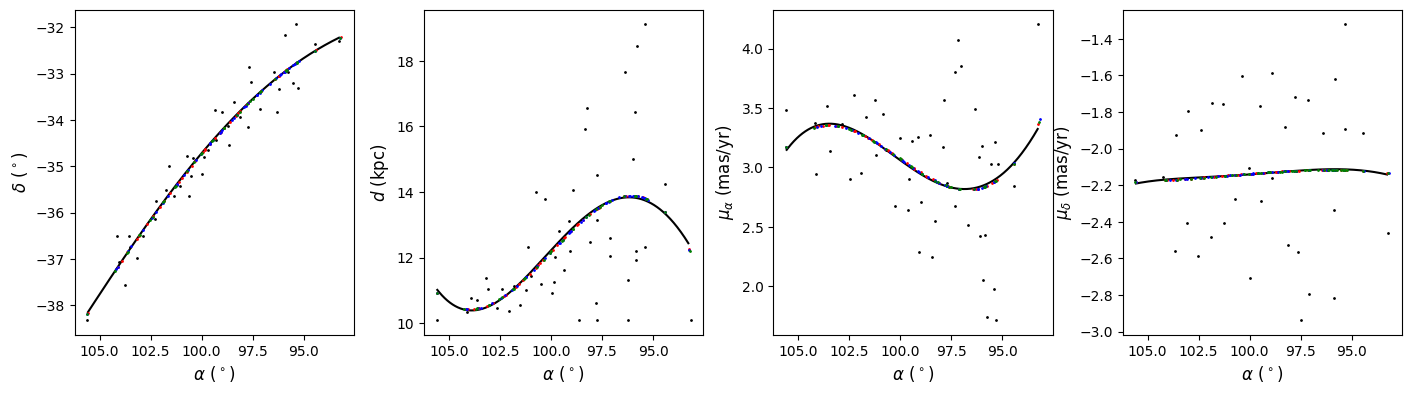

In [608]:
from scipy.optimize import curve_fit

def model1(phi1, a, b, c, d):
    return a + b*(phi1) + c*(phi1)**2 + d*(phi1)**3

params_radec, _ = curve_fit(model1, mwsts['NGC2298-I21'].track.ra.value, mwsts['NGC2298-I21'].track.dec.value, maxfev=5000)
params_rad, _ = curve_fit(model1, mwsts['NGC2298-I21'].track.ra.value, mwsts['NGC2298-I21'].track.distance.value, maxfev=5000)
params_rapmra, _ = curve_fit(model1, mwsts['NGC2298-I21'].track.ra.value, mwsts['NGC2298-I21'].track.pm_ra_cosdec.value, maxfev=5000)
params_rapmdec, _ = curve_fit(model1, mwsts['NGC2298-I21'].track.ra.value, mwsts['NGC2298-I21'].track.pm_dec.value, maxfev=5000)

decd = model1(NGC2298_I21rad[0].values, params_radec[0], params_radec[1], params_radec[2], params_radec[3])
decpmra = model1(NGC2298_I21rapmra[0].values, params_radec[0], params_radec[1], params_radec[2], params_radec[3])
decpmdec = model1(NGC2298_I21rapmdec[0].values, params_radec[0], params_radec[1], params_radec[2], params_radec[3])

ddec = model1(NGC2298_I21radec[0].values, params_rad[0], params_rad[1], params_rad[2], params_rad[3])
dpmra = model1(NGC2298_I21rapmra[0].values, params_rad[0], params_rad[1], params_rad[2], params_rad[3])
dpmdec = model1(NGC2298_I21rapmdec[0].values, params_rad[0], params_rad[1], params_rad[2], params_rad[3])

pmradec = model1(NGC2298_I21radec[0].values, params_rapmra[0], params_rapmra[1], params_rapmra[2], params_rapmra[3])
pmrad = model1(NGC2298_I21rad[0].values, params_rapmra[0], params_rapmra[1], params_rapmra[2], params_rapmra[3])
pmrapmdec = model1(NGC2298_I21rapmdec[0].values, params_rapmra[0], params_rapmra[1], params_rapmra[2], params_rapmra[3])

pmdecdec = model1(NGC2298_I21radec[0].values, params_rapmdec[0], params_rapmdec[1], params_rapmdec[2], params_rapmdec[3])
pmdecd = model1(NGC2298_I21rad[0].values, params_rapmdec[0], params_rapmdec[1], params_rapmdec[2], params_rapmdec[3])
pmdecpmra = model1(NGC2298_I21rapmra[0].values, params_rapmdec[0], params_rapmdec[1], params_rapmdec[2], params_rapmdec[3])

fig=plt.figure(1,figsize=(15,5))    
fig.subplots_adjust(wspace=0.25,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax=fig.add_subplot(141)
ax.plot(mwsts['NGC2298-I21'].track.ra, mwsts['NGC2298-I21'].track.dec,'-k', lw=1.5)
ax.plot(NGC2298_I21radec[0],NGC2298_I21radec[1],'.k',ms=2)
ax.plot(NGC2298_I21rad[0],decd,'.r',ms=2)
ax.plot(NGC2298_I21rapmra[0],decpmra,'.b',ms=2)
ax.plot(NGC2298_I21rapmdec[0],decpmdec,'.g',ms=2)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\delta$ ($^\circ$)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(142)
ax.plot(mwsts['NGC2298-I21'].track.ra, mwsts['NGC2298-I21'].track.distance,'-k', lw=1.5)
ax.plot(NGC2298_I21rad[0],NGC2298_I21rad[1],'.k',ms=2)
ax.plot(NGC2298_I21radec[0],ddec,'.r',ms=2)
ax.plot(NGC2298_I21rapmra[0],dpmra,'.b',ms=2)
ax.plot(NGC2298_I21rapmdec[0],dpmdec,'.g',ms=2)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$d$ (kpc)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(143)
ax.plot(mwsts['NGC2298-I21'].track.ra, mwsts['NGC2298-I21'].track.pm_ra_cosdec,'-k', lw=1.5)
ax.plot(NGC2298_I21rapmra[0],NGC2298_I21rapmra[1],'.k',ms=2)
ax.plot(NGC2298_I21radec[0],pmradec,'.r',ms=2)
ax.plot(NGC2298_I21rad[0],pmrad,'.b',ms=2)
ax.plot(NGC2298_I21rapmdec[0],pmrapmdec,'.g',ms=2)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\\alpha$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(144)
ax.plot(mwsts['NGC2298-I21'].track.ra, mwsts['NGC2298-I21'].track.pm_dec,'-k', lw=1.5)
ax.plot(NGC2298_I21rapmdec[0],NGC2298_I21rapmdec[1],'.k',ms=2)
ax.plot(NGC2298_I21radec[0],pmdecdec,'.r',ms=2)
ax.plot(NGC2298_I21rad[0],pmdecd,'.b',ms=2)
ax.plot(NGC2298_I21rapmra[0],pmdecpmra,'.g',ms=2)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\delta$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

width_phi2: 0.413233768722099
width_pmphi1: 0.4670145464261327
width_pmphi2: 0.3523819870782614
width_dist: 2.2850748951671833


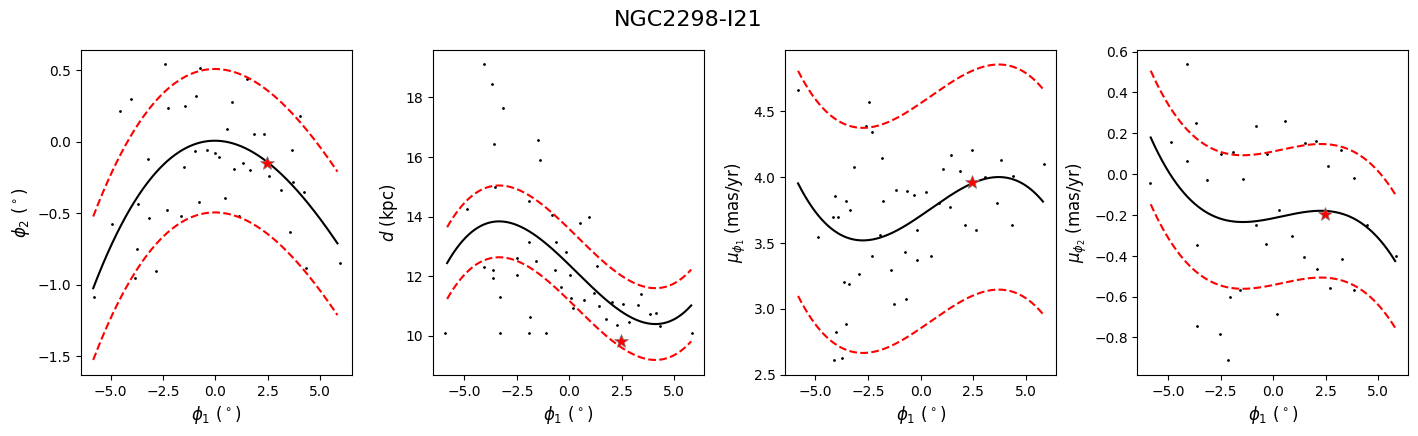

In [689]:
glob_st = glob_g.transform_to(mwsts['NGC2298-I21'].stream_frame)

def model1(phi1, a, b, c, d):
    return a + b*(phi1) + c*(phi1)**2 + d*(phi1)**3

params_radec, _ = curve_fit(model1, mwsts['NGC2298-I21'].track.ra.value, mwsts['NGC2298-I21'].track.dec.value, maxfev=5000)
params_rad, _ = curve_fit(model1, mwsts['NGC2298-I21'].track.ra.value, mwsts['NGC2298-I21'].track.distance.value, maxfev=5000)
params_rapmra, _ = curve_fit(model1, mwsts['NGC2298-I21'].track.ra.value, mwsts['NGC2298-I21'].track.pm_ra_cosdec.value, maxfev=5000)
params_rapmdec, _ = curve_fit(model1, mwsts['NGC2298-I21'].track.ra.value, mwsts['NGC2298-I21'].track.pm_dec.value, maxfev=5000)

decd = model1(NGC2298_I21rad[0].values, params_radec[0], params_radec[1], params_radec[2], params_radec[3])
decpmra = model1(NGC2298_I21rapmra[0].values, params_radec[0], params_radec[1], params_radec[2], params_radec[3])
decpmdec = model1(NGC2298_I21rapmdec[0].values, params_radec[0], params_radec[1], params_radec[2], params_radec[3])

ddec = model1(NGC2298_I21radec[0].values, params_rad[0], params_rad[1], params_rad[2], params_rad[3])
dpmra = model1(NGC2298_I21rapmra[0].values, params_rad[0], params_rad[1], params_rad[2], params_rad[3])
dpmdec = model1(NGC2298_I21rapmdec[0].values, params_rad[0], params_rad[1], params_rad[2], params_rad[3])

pmradec = model1(NGC2298_I21radec[0].values, params_rapmra[0], params_rapmra[1], params_rapmra[2], params_rapmra[3])
pmrad = model1(NGC2298_I21rad[0].values, params_rapmra[0], params_rapmra[1], params_rapmra[2], params_rapmra[3])
pmrapmdec = model1(NGC2298_I21rapmdec[0].values, params_rapmra[0], params_rapmra[1], params_rapmra[2], params_rapmra[3])

pmdecdec = model1(NGC2298_I21radec[0].values, params_rapmdec[0], params_rapmdec[1], params_rapmdec[2], params_rapmdec[3])
pmdecd = model1(NGC2298_I21rad[0].values, params_rapmdec[0], params_rapmdec[1], params_rapmdec[2], params_rapmdec[3])
pmdecpmra = model1(NGC2298_I21rapmra[0].values, params_rapmdec[0], params_rapmdec[1], params_rapmdec[2], params_rapmdec[3])


NGC2298_radec_g = ac.SkyCoord(ra=NGC2298_I21radec[0].values*u.deg,
                              dec=NGC2298_I21radec[1].values*u.deg)
NGC2298_phi12_c = NGC2298_radec_g.transform_to(mwsts['NGC2298-I21'].stream_frame)
print('width_phi2:', np.std(NGC2298_phi12_c.phi2).value)



NGC2298_rapmra_g = ac.SkyCoord(ra=NGC2298_I21rapmra[0].values*u.deg,
                                  dec=decpmra*u.deg,
                                  pm_ra_cosdec=NGC2298_I21rapmra[1].values*u.mas/u.yr,
                                  pm_dec=pmdecpmra*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(NGC2298_I21rapmra[0]))*u.km/u.s)  
NGC2298_phi1pmphi1_c = NGC2298_rapmra_g.transform_to(mwsts['NGC2298-I21'].stream_frame)
print('width_pmphi1:', np.std(NGC2298_phi1pmphi1_c.pm_phi1_cosphi2).value)



NGC2298_rapmdec_g = ac.SkyCoord(ra=NGC2298_I21rapmdec[0].values*u.deg,
                                  dec=decpmdec*u.deg,
                                  pm_ra_cosdec=pmrapmdec*u.mas/u.yr,
                                  pm_dec=NGC2298_I21rapmdec[1].values*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(NGC2298_I21rapmdec[0]))*u.km/u.s)  
NGC2298_phi1pmphi2_c = NGC2298_rapmdec_g.transform_to(mwsts['NGC2298-I21'].stream_frame)
print('width_pmphi2:', np.std(NGC2298_phi1pmphi2_c.pm_phi2).value)



NGC2298_rad_g = ac.SkyCoord(ra=NGC2298_I21rad[0].values*u.deg,
                            dec=decd*u.deg,
                            distance=NGC2298_I21rad[1].values*u.kpc)
    
NGC2298_phi1d_c = NGC2298_rad_g.transform_to(mwsts['NGC2298-I21'].stream_frame)
print('width_dist:', np.std(NGC2298_I21rad[1]))


widths.loc['NGC2298-I21'].width_phi2 = np.std(M2_phi12_c.phi2).value
widths.loc['NGC2298-I21'].width_dist =  np.std(M2_I21rad[1])
widths.loc['NGC2298-I21'].width_pmphi1 = np.std(M2_phi1pmphi1_c.pm_phi1_cosphi2).value
widths.loc['NGC2298-I21'].width_pmphi2 = np.std(M2_phi1pmphi2_c.pm_phi2).value


fig2=plt.figure(2,figsize=(15,5))    
fig2.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax2=fig2.add_subplot(141)
ax2.plot(mwsts['NGC2298-I21'].track.transform_to(mwsts['NGC2298-I21'].stream_frame).phi1, mwsts['NGC2298-I21'].track.transform_to(mwsts['NGC2298-I21'].stream_frame).phi2,'-k', lw=1.5, zorder=99)
ax2.plot(NGC2298_phi12_c.phi1, NGC2298_phi12_c.phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC2298-I21'].track.transform_to(mwsts['NGC2298-I21'].stream_frame).phi1, mwsts['NGC2298-I21'].track.transform_to(mwsts['NGC2298-I21'].stream_frame).phi2 + n*widths.loc['NGC2298-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC2298-I21'].track.transform_to(mwsts['NGC2298-I21'].stream_frame).phi1, mwsts['NGC2298-I21'].track.transform_to(mwsts['NGC2298-I21'].stream_frame).phi2 - n*widths.loc['NGC2298-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\phi_2$ ($^\circ$)',fontsize=12)

ax2=fig2.add_subplot(142)
ax2.plot(mwsts['NGC2298-I21'].track.transform_to(mwsts['NGC2298-I21'].stream_frame).phi1, mwsts['NGC2298-I21'].track.distance,'-k', lw=1.5, zorder=99)
ax2.plot(NGC2298_phi1d_c.phi1, NGC2298_phi1d_c.distance,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC2298-I21'].track.transform_to(mwsts['NGC2298-I21'].stream_frame).phi1, mwsts['NGC2298-I21'].track.distance + n*widths.loc['NGC2298-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC2298-I21'].track.transform_to(mwsts['NGC2298-I21'].stream_frame).phi1, mwsts['NGC2298-I21'].track.distance - n*widths.loc['NGC2298-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$d$ (kpc)',fontsize=12)

ax2=fig2.add_subplot(143)
ax2.plot(mwsts['NGC2298-I21'].track.transform_to(mwsts['NGC2298-I21'].stream_frame).phi1, mwsts['NGC2298-I21'].track.transform_to(mwsts['NGC2298-I21'].stream_frame).pm_phi1_cosphi2,'-k', lw=1.5,zorder=99)
ax2.plot(NGC2298_phi1pmphi1_c.phi1, NGC2298_phi1pmphi1_c.pm_phi1_cosphi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi1_cosphi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC2298-I21'].track.transform_to(mwsts['NGC2298-I21'].stream_frame).phi1, mwsts['NGC2298-I21'].track.transform_to(mwsts['NGC2298-I21'].stream_frame).pm_phi1_cosphi2 + n*widths.loc['NGC2298-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC2298-I21'].track.transform_to(mwsts['NGC2298-I21'].stream_frame).phi1, mwsts['NGC2298-I21'].track.transform_to(mwsts['NGC2298-I21'].stream_frame).pm_phi1_cosphi2 - n*widths.loc['NGC2298-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_1}$ (mas/yr)',fontsize=12)

ax2=fig2.add_subplot(144)
ax2.plot(mwsts['NGC2298-I21'].track.transform_to(mwsts['NGC2298-I21'].stream_frame).phi1, mwsts['NGC2298-I21'].track.transform_to(mwsts['NGC2298-I21'].stream_frame).pm_phi2,'-k', lw=1.5,zorder=100)
ax2.plot(NGC2298_phi1pmphi2_c.phi1, NGC2298_phi1pmphi2_c.pm_phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC2298-I21'].track.transform_to(mwsts['NGC2298-I21'].stream_frame).phi1, mwsts['NGC2298-I21'].track.transform_to(mwsts['NGC2298-I21'].stream_frame).pm_phi2 + n*widths.loc['NGC2298-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC2298-I21'].track.transform_to(mwsts['NGC2298-I21'].stream_frame).phi1, mwsts['NGC2298-I21'].track.transform_to(mwsts['NGC2298-I21'].stream_frame).pm_phi2 - n*widths.loc['NGC2298-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_2}$ (mas/yr)',fontsize=12)

plt.suptitle('NGC2298-I21',fontsize=16);

## NGC5466

In [829]:
globs_ = globs[globs['Name'] == 'NGC 5466']

globs_d = pd.read_csv('../catalogs/globular_clusters_Baumgardt&Vasiliev2021.txt', header=0, sep='\s+')
globs_d_ = globs_d[globs_d.Cluster == 'NGC_5466']

glob_g = ac.SkyCoord(ra=globs_.RAJ2000[0]*u.deg,
                      dec=globs_.DEJ2000[0]*u.deg,
                      distance=float(globs_d_.Rsun.values[0])*u.kpc,
                      pm_ra_cosdec=globs_.pmRA[0]*u.mas/u.yr,
                      pm_dec=globs_.pmDE[0]*u.mas/u.yr,
                      radial_velocity=0*u.km/u.s)

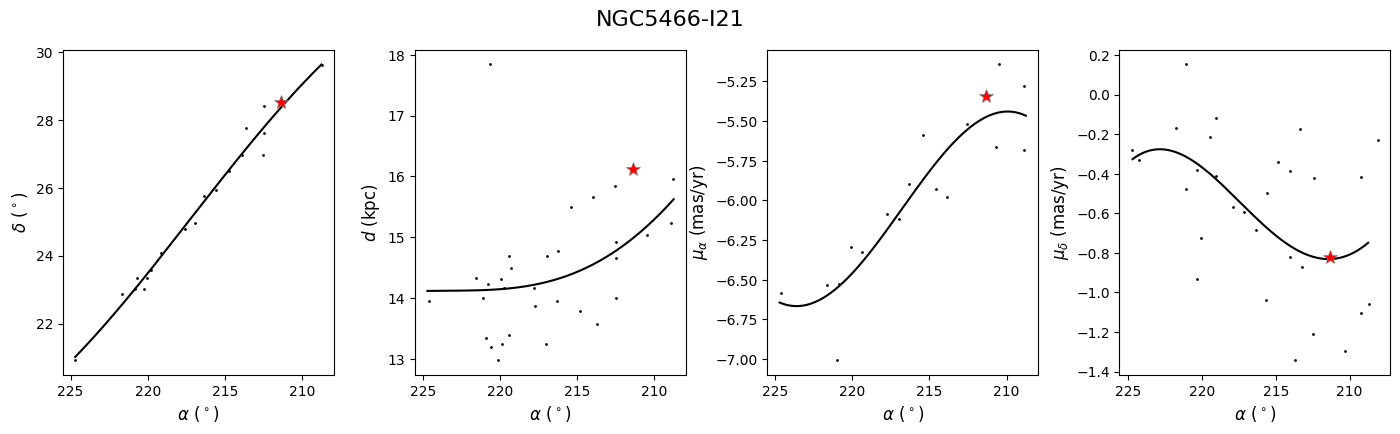

In [611]:
fig=plt.figure(1,figsize=(15,5))    
fig.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax=fig.add_subplot(141)
ax.plot(mwsts['NGC5466-I21'].track.ra, mwsts['NGC5466-I21'].track.dec,'-k', lw=1.5)
ax.plot(NGC5466_I21radec[0],NGC5466_I21radec[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\delta$ ($^\circ$)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(142)
ax.plot(mwsts['NGC5466-I21'].track.ra, mwsts['NGC5466-I21'].track.distance,'-k', lw=1.5)
ax.plot(NGC5466_I21rad[0],NGC5466_I21rad[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$d$ (kpc)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(143)
ax.plot(mwsts['NGC5466-I21'].track.ra, mwsts['NGC5466-I21'].track.pm_ra_cosdec,'-k', lw=1.5)
ax.plot(NGC5466_I21rapmra[0],NGC5466_I21rapmra[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_ra_cosdec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\\alpha$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(144)
ax.plot(mwsts['NGC5466-I21'].track.ra, mwsts['NGC5466-I21'].track.pm_dec,'-k', lw=1.5)
ax.plot(NGC5466_I21rapmdec[0],NGC5466_I21rapmdec[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\delta$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

plt.suptitle('NGC5466-I21',fontsize=16);

width_phi2: 0.28601834586638963
width_pmphi1: 0.39247331479694614
width_pmphi2: 0.3710065615262167
width_dist: 1.005609271708706


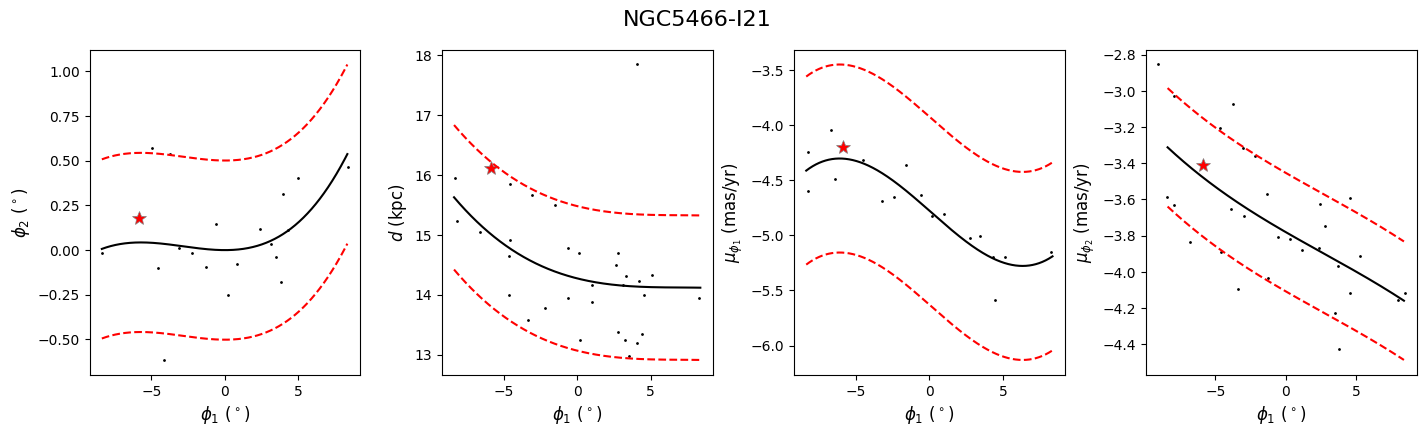

In [830]:
glob_st = glob_g.transform_to(mwsts['NGC5466-I21'].stream_frame)

def model1(phi1, a, b, c, d):
    return a + b*(phi1) + c*(phi1)**2 + d*(phi1)**3

params_radec, _ = curve_fit(model1, mwsts['NGC5466-I21'].track.ra.value, mwsts['NGC5466-I21'].track.dec.value, maxfev=5000)
params_rad, _ = curve_fit(model1, mwsts['NGC5466-I21'].track.ra.value, mwsts['NGC5466-I21'].track.distance.value, maxfev=5000)
params_rapmra, _ = curve_fit(model1, mwsts['NGC5466-I21'].track.ra.value, mwsts['NGC5466-I21'].track.pm_ra_cosdec.value, maxfev=5000)
params_rapmdec, _ = curve_fit(model1, mwsts['NGC5466-I21'].track.ra.value, mwsts['NGC5466-I21'].track.pm_dec.value, maxfev=5000)

decd = model1(NGC5466_I21rad[0].values, params_radec[0], params_radec[1], params_radec[2], params_radec[3])
decpmra = model1(NGC5466_I21rapmra[0].values, params_radec[0], params_radec[1], params_radec[2], params_radec[3])
decpmdec = model1(NGC5466_I21rapmdec[0].values, params_radec[0], params_radec[1], params_radec[2], params_radec[3])

ddec = model1(NGC5466_I21radec[0].values, params_rad[0], params_rad[1], params_rad[2], params_rad[3])
dpmra = model1(NGC5466_I21rapmra[0].values, params_rad[0], params_rad[1], params_rad[2], params_rad[3])
dpmdec = model1(NGC5466_I21rapmdec[0].values, params_rad[0], params_rad[1], params_rad[2], params_rad[3])

pmradec = model1(NGC5466_I21radec[0].values, params_rapmra[0], params_rapmra[1], params_rapmra[2], params_rapmra[3])
pmrad = model1(NGC5466_I21rad[0].values, params_rapmra[0], params_rapmra[1], params_rapmra[2], params_rapmra[3])
pmrapmdec = model1(NGC5466_I21rapmdec[0].values, params_rapmra[0], params_rapmra[1], params_rapmra[2], params_rapmra[3])

pmdecdec = model1(NGC5466_I21radec[0].values, params_rapmdec[0], params_rapmdec[1], params_rapmdec[2], params_rapmdec[3])
pmdecd = model1(NGC5466_I21rad[0].values, params_rapmdec[0], params_rapmdec[1], params_rapmdec[2], params_rapmdec[3])
pmdecpmra = model1(NGC5466_I21rapmra[0].values, params_rapmdec[0], params_rapmdec[1], params_rapmdec[2], params_rapmdec[3])


NGC5466_radec_g = ac.SkyCoord(ra=NGC5466_I21radec[0].values*u.deg,
                              dec=NGC5466_I21radec[1].values*u.deg)
NGC5466_phi12_c = NGC5466_radec_g.transform_to(mwsts['NGC5466-I21'].stream_frame)
print('width_phi2:', np.std(NGC5466_phi12_c.phi2).value)



NGC5466_rapmra_g = ac.SkyCoord(ra=NGC5466_I21rapmra[0].values*u.deg,
                                  dec=decpmra*u.deg,
                                  pm_ra_cosdec=NGC5466_I21rapmra[1].values*u.mas/u.yr,
                                  pm_dec=pmdecpmra*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(NGC5466_I21rapmra[0]))*u.km/u.s)  
NGC5466_phi1pmphi1_c = NGC5466_rapmra_g.transform_to(mwsts['NGC5466-I21'].stream_frame)
print('width_pmphi1:', np.std(NGC5466_phi1pmphi1_c.pm_phi1_cosphi2).value)



NGC5466_rapmdec_g = ac.SkyCoord(ra=NGC5466_I21rapmdec[0].values*u.deg,
                                  dec=decpmdec*u.deg,
                                  pm_ra_cosdec=pmrapmdec*u.mas/u.yr,
                                  pm_dec=NGC5466_I21rapmdec[1].values*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(NGC5466_I21rapmdec[0]))*u.km/u.s)  
NGC5466_phi1pmphi2_c = NGC5466_rapmdec_g.transform_to(mwsts['NGC5466-I21'].stream_frame)
print('width_pmphi2:', np.std(NGC5466_phi1pmphi2_c.pm_phi2).value)



NGC5466_rad_g = ac.SkyCoord(ra=NGC5466_I21rad[0].values*u.deg,
                            dec=decd*u.deg,
                            distance=NGC5466_I21rad[1].values*u.kpc)
    
NGC5466_phi1d_c = NGC5466_rad_g.transform_to(mwsts['NGC5466-I21'].stream_frame)
print('width_dist:', np.std(NGC5466_I21rad[1]))


widths.loc['NGC5466-I21'].width_phi2 = np.std(M2_phi12_c.phi2).value
widths.loc['NGC5466-I21'].width_dist =  np.std(M2_I21rad[1])
widths.loc['NGC5466-I21'].width_pmphi1 = np.std(M2_phi1pmphi1_c.pm_phi1_cosphi2).value
widths.loc['NGC5466-I21'].width_pmphi2 = np.std(M2_phi1pmphi2_c.pm_phi2).value


fig2=plt.figure(2,figsize=(15,5))    
fig2.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax2=fig2.add_subplot(141)
ax2.plot(mwsts['NGC5466-I21'].track.transform_to(mwsts['NGC5466-I21'].stream_frame).phi1, mwsts['NGC5466-I21'].track.transform_to(mwsts['NGC5466-I21'].stream_frame).phi2,'-k', lw=1.5, zorder=99)
ax2.plot(NGC5466_phi12_c.phi1, NGC5466_phi12_c.phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC5466-I21'].track.transform_to(mwsts['NGC5466-I21'].stream_frame).phi1, mwsts['NGC5466-I21'].track.transform_to(mwsts['NGC5466-I21'].stream_frame).phi2 + n*widths.loc['NGC5466-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC5466-I21'].track.transform_to(mwsts['NGC5466-I21'].stream_frame).phi1, mwsts['NGC5466-I21'].track.transform_to(mwsts['NGC5466-I21'].stream_frame).phi2 - n*widths.loc['NGC5466-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\phi_2$ ($^\circ$)',fontsize=12)

ax2=fig2.add_subplot(142)
ax2.plot(mwsts['NGC5466-I21'].track.transform_to(mwsts['NGC5466-I21'].stream_frame).phi1, mwsts['NGC5466-I21'].track.distance,'-k', lw=1.5, zorder=99)
ax2.plot(NGC5466_phi1d_c.phi1, NGC5466_phi1d_c.distance,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC5466-I21'].track.transform_to(mwsts['NGC5466-I21'].stream_frame).phi1, mwsts['NGC5466-I21'].track.distance + n*widths.loc['NGC5466-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC5466-I21'].track.transform_to(mwsts['NGC5466-I21'].stream_frame).phi1, mwsts['NGC5466-I21'].track.distance - n*widths.loc['NGC5466-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$d$ (kpc)',fontsize=12)

ax2=fig2.add_subplot(143)
ax2.plot(mwsts['NGC5466-I21'].track.transform_to(mwsts['NGC5466-I21'].stream_frame).phi1, mwsts['NGC5466-I21'].track.transform_to(mwsts['NGC5466-I21'].stream_frame).pm_phi1_cosphi2,'-k', lw=1.5,zorder=99)
ax2.plot(NGC5466_phi1pmphi1_c.phi1, NGC5466_phi1pmphi1_c.pm_phi1_cosphi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi1_cosphi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC5466-I21'].track.transform_to(mwsts['NGC5466-I21'].stream_frame).phi1, mwsts['NGC5466-I21'].track.transform_to(mwsts['NGC5466-I21'].stream_frame).pm_phi1_cosphi2 + n*widths.loc['NGC5466-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC5466-I21'].track.transform_to(mwsts['NGC5466-I21'].stream_frame).phi1, mwsts['NGC5466-I21'].track.transform_to(mwsts['NGC5466-I21'].stream_frame).pm_phi1_cosphi2 - n*widths.loc['NGC5466-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_1}$ (mas/yr)',fontsize=12)

ax2=fig2.add_subplot(144)
ax2.plot(mwsts['NGC5466-I21'].track.transform_to(mwsts['NGC5466-I21'].stream_frame).phi1, mwsts['NGC5466-I21'].track.transform_to(mwsts['NGC5466-I21'].stream_frame).pm_phi2,'-k', lw=1.5,zorder=100)
ax2.plot(NGC5466_phi1pmphi2_c.phi1, NGC5466_phi1pmphi2_c.pm_phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC5466-I21'].track.transform_to(mwsts['NGC5466-I21'].stream_frame).phi1, mwsts['NGC5466-I21'].track.transform_to(mwsts['NGC5466-I21'].stream_frame).pm_phi2 + n*widths.loc['NGC5466-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC5466-I21'].track.transform_to(mwsts['NGC5466-I21'].stream_frame).phi1, mwsts['NGC5466-I21'].track.transform_to(mwsts['NGC5466-I21'].stream_frame).pm_phi2 - n*widths.loc['NGC5466-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_2}$ (mas/yr)',fontsize=12)

plt.suptitle('NGC5466-I21',fontsize=16);

In [ ]:
#=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=

width_phi2: 1.202666957055849
width_pmphi1: 0.553974764625105
width_pmphi2: 0.38263799414034627
width_dist: 3.3811916279927607


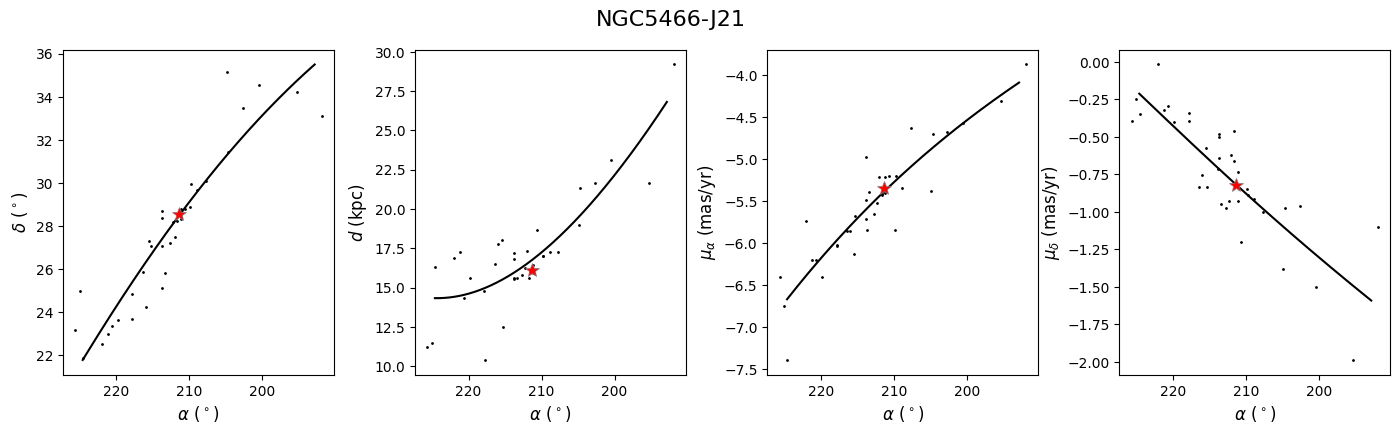

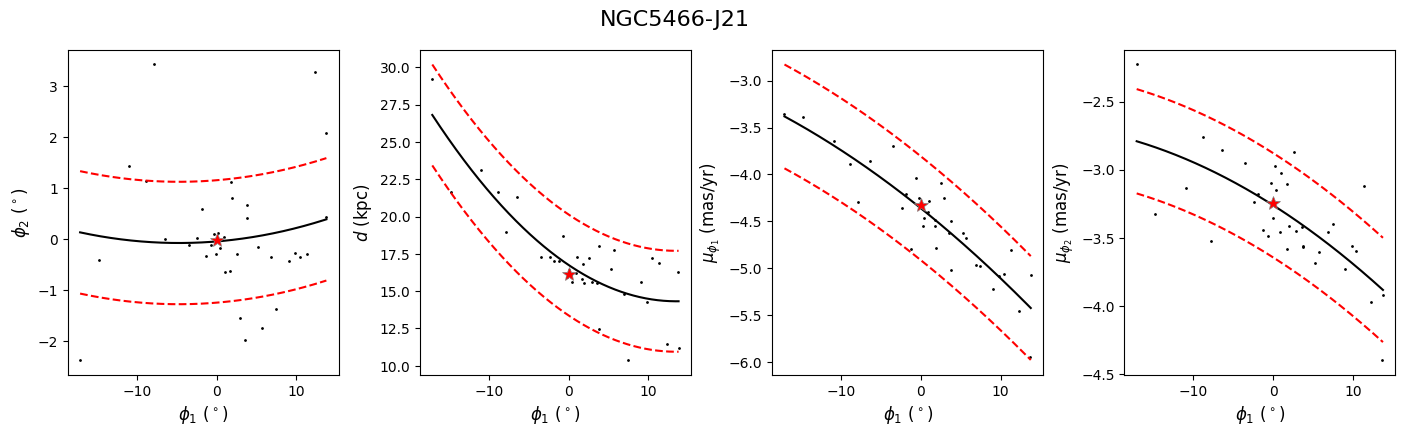

In [709]:
glob_st = glob_g.transform_to(mwsts['NGC5466-J21'].stream_frame)

NGC5466_J21_g = ac.SkyCoord(ra=NGC5466_J21['  ra']*u.deg,
                          dec=NGC5466_J21['        dec']*u.deg,
                          distance=NGC5466_J21['     Rhelio']*u.kpc,
                          pm_ra_cosdec=NGC5466_J21[' pmra']*u.mas/u.yr,
                          pm_dec=NGC5466_J21[' pmdec']*u.mas/u.yr,
                          radial_velocity=np.zeros(len(NGC5466_J21[' pmdec']))*u.km/u.s)
    
NGC5466_J21_c = NGC5466_J21_g.transform_to(mwsts['NGC5466-J21'].stream_frame)

print('width_phi2:',np.std(NGC5466_J21_c.phi2.value))
print('width_pmphi1:',np.std(NGC5466_J21_c.pm_phi1_cosphi2.value))
print('width_pmphi2:',np.std(NGC5466_J21_c.pm_phi2.value))
print('width_dist:',np.std(NGC5466_J21_g.distance.value))


widths.loc['NGC5466-J21'].width_phi2 = np.std(NGC5466_J21_c.phi2.value)
widths.loc['NGC5466-J21'].width_dist = np.std(NGC5466_J21_g.distance.value)
widths.loc['NGC5466-J21'].width_pmphi1 = np.std(NGC5466_J21_c.pm_phi1_cosphi2.value)
widths.loc['NGC5466-J21'].width_pmphi2 = np.std(NGC5466_J21_c.pm_phi2.value)


fig=plt.figure(1,figsize=(15,5))    
fig.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax=fig.add_subplot(141)
ax.plot(mwsts['NGC5466-J21'].track.ra, mwsts['NGC5466-J21'].track.dec,'-k', lw=1.5, zorder=99)
ax.plot(NGC5466_J21_g.ra, NGC5466_J21_g.dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\delta$ ($^\circ$)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(142)
ax.plot(mwsts['NGC5466-J21'].track.ra, mwsts['NGC5466-J21'].track.distance,'-k', lw=1.5, zorder=99)
ax.plot(NGC5466_J21_g.ra, NGC5466_J21_g.distance,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$d$ (kpc)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(143)
ax.plot(mwsts['NGC5466-J21'].track.ra, mwsts['NGC5466-J21'].track.pm_ra_cosdec,'-k', lw=1.5,zorder=99)
ax.plot(NGC5466_J21_g.ra, NGC5466_J21_g.pm_ra_cosdec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_ra_cosdec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\\alpha$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(144)
ax.plot(mwsts['NGC5466-J21'].track.ra, mwsts['NGC5466-J21'].track.pm_dec,'-k', lw=1.5,zorder=100)
ax.plot(NGC5466_J21_g.ra, NGC5466_J21_g.pm_dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\delta$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

plt.suptitle('NGC5466-J21',fontsize=16);


fig2=plt.figure(2,figsize=(15,5))    
fig2.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax2=fig2.add_subplot(141)
ax2.plot(mwsts['NGC5466-J21'].track.transform_to(mwsts['NGC5466-J21'].stream_frame).phi1, mwsts['NGC5466-J21'].track.transform_to(mwsts['NGC5466-J21'].stream_frame).phi2,'-k', lw=1.5, zorder=99)
ax2.plot(NGC5466_J21_c.phi1, NGC5466_J21_c.phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC5466-J21'].track.transform_to(mwsts['NGC5466-J21'].stream_frame).phi1, mwsts['NGC5466-J21'].track.transform_to(mwsts['NGC5466-J21'].stream_frame).phi2 + n*widths.loc['NGC5466-J21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC5466-J21'].track.transform_to(mwsts['NGC5466-J21'].stream_frame).phi1, mwsts['NGC5466-J21'].track.transform_to(mwsts['NGC5466-J21'].stream_frame).phi2 - n*widths.loc['NGC5466-J21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\phi_2$ ($^\circ$)',fontsize=12)

ax2=fig2.add_subplot(142)
ax2.plot(mwsts['NGC5466-J21'].track.transform_to(mwsts['NGC5466-J21'].stream_frame).phi1, mwsts['NGC5466-J21'].track.distance,'-k', lw=1.5, zorder=99)
ax2.plot(NGC5466_J21_c.phi1, NGC5466_J21_g.distance,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC5466-J21'].track.transform_to(mwsts['NGC5466-J21'].stream_frame).phi1, mwsts['NGC5466-J21'].track.distance + n*widths.loc['NGC5466-J21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC5466-J21'].track.transform_to(mwsts['NGC5466-J21'].stream_frame).phi1, mwsts['NGC5466-J21'].track.distance - n*widths.loc['NGC5466-J21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$d$ (kpc)',fontsize=12)

ax2=fig2.add_subplot(143)
ax2.plot(mwsts['NGC5466-J21'].track.transform_to(mwsts['NGC5466-J21'].stream_frame).phi1, mwsts['NGC5466-J21'].track.transform_to(mwsts['NGC5466-J21'].stream_frame).pm_phi1_cosphi2,'-k', lw=1.5,zorder=99)
ax2.plot(NGC5466_J21_c.phi1, NGC5466_J21_c.pm_phi1_cosphi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi1_cosphi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC5466-J21'].track.transform_to(mwsts['NGC5466-J21'].stream_frame).phi1, mwsts['NGC5466-J21'].track.transform_to(mwsts['NGC5466-J21'].stream_frame).pm_phi1_cosphi2 + n*widths.loc['NGC5466-J21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC5466-J21'].track.transform_to(mwsts['NGC5466-J21'].stream_frame).phi1, mwsts['NGC5466-J21'].track.transform_to(mwsts['NGC5466-J21'].stream_frame).pm_phi1_cosphi2 - n*widths.loc['NGC5466-J21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_1}$ (mas/yr)',fontsize=12)

ax2=fig2.add_subplot(144)
ax2.plot(mwsts['NGC5466-J21'].track.transform_to(mwsts['NGC5466-J21'].stream_frame).phi1, mwsts['NGC5466-J21'].track.transform_to(mwsts['NGC5466-J21'].stream_frame).pm_phi2,'-k', lw=1.5,zorder=100)
ax2.plot(NGC5466_J21_c.phi1, NGC5466_J21_c.pm_phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC5466-J21'].track.transform_to(mwsts['NGC5466-J21'].stream_frame).phi1, mwsts['NGC5466-J21'].track.transform_to(mwsts['NGC5466-J21'].stream_frame).pm_phi2 + n*widths.loc['NGC5466-J21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC5466-J21'].track.transform_to(mwsts['NGC5466-J21'].stream_frame).phi1, mwsts['NGC5466-J21'].track.transform_to(mwsts['NGC5466-J21'].stream_frame).pm_phi2 - n*widths.loc['NGC5466-J21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_2}$ (mas/yr)',fontsize=12)

plt.suptitle('NGC5466-J21',fontsize=16);

## NGC 6101

In [819]:
globs_ = globs[globs['Name'] == 'NGC 6101']

globs_d = pd.read_csv('../catalogs/globular_clusters_Baumgardt&Vasiliev2021.txt', header=0, sep='\s+')
globs_d_ = globs_d[globs_d.Cluster == 'NGC_6101']

glob_g = ac.SkyCoord(ra=globs_.RAJ2000[0]*u.deg,
                      dec=globs_.DEJ2000[0]*u.deg,
                      distance=float(globs_d_.Rsun.values[0])*u.kpc,
                      pm_ra_cosdec=globs_.pmRA[0]*u.mas/u.yr,
                      pm_dec=globs_.pmDE[0]*u.mas/u.yr,
                      radial_velocity=0*u.km/u.s)

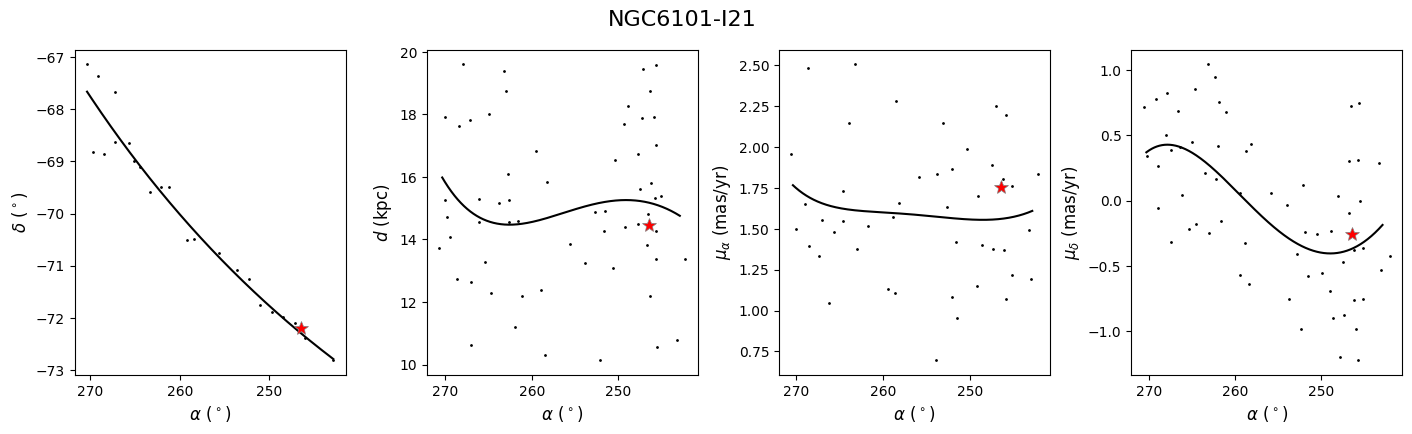

In [820]:
fig=plt.figure(1,figsize=(15,5))    
fig.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax=fig.add_subplot(141)
ax.plot(mwsts['NGC6101-I21'].track.ra, mwsts['NGC6101-I21'].track.dec,'-k', lw=1.5)
ax.plot(NGC6101_I21radec[0],NGC6101_I21radec[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\delta$ ($^\circ$)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(142)
ax.plot(mwsts['NGC6101-I21'].track.ra, mwsts['NGC6101-I21'].track.distance,'-k', lw=1.5)
ax.plot(NGC6101_I21rad[0],NGC6101_I21rad[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$d$ (kpc)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(143)
ax.plot(mwsts['NGC6101-I21'].track.ra, mwsts['NGC6101-I21'].track.pm_ra_cosdec,'-k', lw=1.5)
ax.plot(NGC6101_I21rapmra[0],NGC6101_I21rapmra[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_ra_cosdec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\\alpha$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(144)
ax.plot(mwsts['NGC6101-I21'].track.ra, mwsts['NGC6101-I21'].track.pm_dec,'-k', lw=1.5)
ax.plot(NGC6101_I21rapmdec[0],NGC6101_I21rapmdec[1],'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\delta$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

plt.suptitle('NGC6101-I21',fontsize=16);

width_phi2: 0.3098524089182277
width_pmphi1: 0.3740279041742806
width_pmphi2: 0.43155939434088464
width_dist: 2.492389648066468


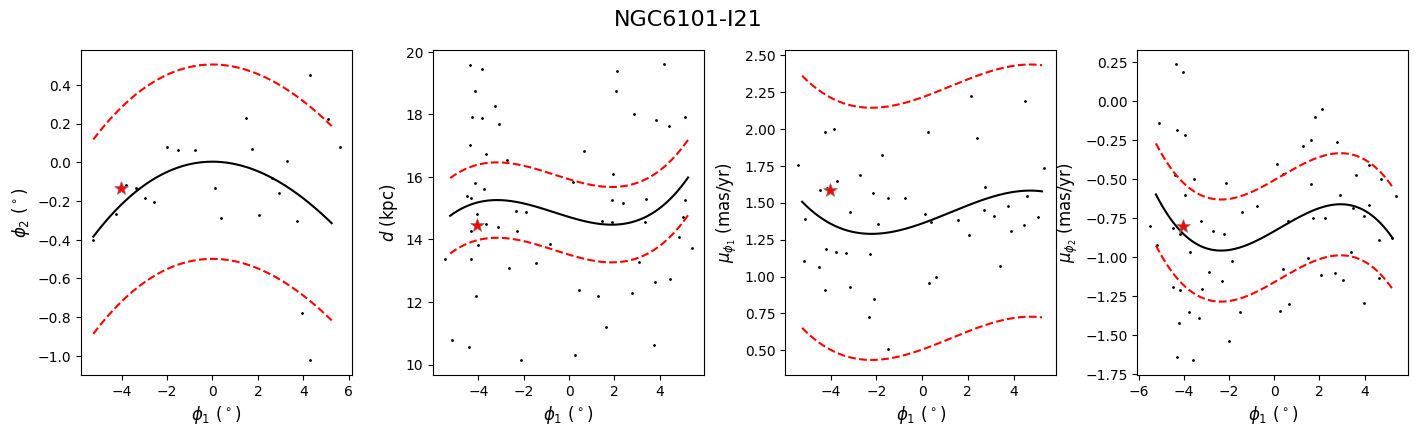

In [821]:
glob_st = glob_g.transform_to(mwsts['NGC6101-I21'].stream_frame)

def model1(phi1, a, b, c, d):
    return a + b*(phi1) + c*(phi1)**2 + d*(phi1)**3

params_radec, _ = curve_fit(model1, mwsts['NGC6101-I21'].track.ra.value, mwsts['NGC6101-I21'].track.dec.value, maxfev=5000)
params_rad, _ = curve_fit(model1, mwsts['NGC6101-I21'].track.ra.value, mwsts['NGC6101-I21'].track.distance.value, maxfev=5000)
params_rapmra, _ = curve_fit(model1, mwsts['NGC6101-I21'].track.ra.value, mwsts['NGC6101-I21'].track.pm_ra_cosdec.value, maxfev=5000)
params_rapmdec, _ = curve_fit(model1, mwsts['NGC6101-I21'].track.ra.value, mwsts['NGC6101-I21'].track.pm_dec.value, maxfev=5000)

decd = model1(NGC6101_I21rad[0].values, params_radec[0], params_radec[1], params_radec[2], params_radec[3])
decpmra = model1(NGC6101_I21rapmra[0].values, params_radec[0], params_radec[1], params_radec[2], params_radec[3])
decpmdec = model1(NGC6101_I21rapmdec[0].values, params_radec[0], params_radec[1], params_radec[2], params_radec[3])

ddec = model1(NGC6101_I21radec[0].values, params_rad[0], params_rad[1], params_rad[2], params_rad[3])
dpmra = model1(NGC6101_I21rapmra[0].values, params_rad[0], params_rad[1], params_rad[2], params_rad[3])
dpmdec = model1(NGC6101_I21rapmdec[0].values, params_rad[0], params_rad[1], params_rad[2], params_rad[3])

pmradec = model1(NGC6101_I21radec[0].values, params_rapmra[0], params_rapmra[1], params_rapmra[2], params_rapmra[3])
pmrad = model1(NGC6101_I21rad[0].values, params_rapmra[0], params_rapmra[1], params_rapmra[2], params_rapmra[3])
pmrapmdec = model1(NGC6101_I21rapmdec[0].values, params_rapmra[0], params_rapmra[1], params_rapmra[2], params_rapmra[3])

pmdecdec = model1(NGC6101_I21radec[0].values, params_rapmdec[0], params_rapmdec[1], params_rapmdec[2], params_rapmdec[3])
pmdecd = model1(NGC6101_I21rad[0].values, params_rapmdec[0], params_rapmdec[1], params_rapmdec[2], params_rapmdec[3])
pmdecpmra = model1(NGC6101_I21rapmra[0].values, params_rapmdec[0], params_rapmdec[1], params_rapmdec[2], params_rapmdec[3])


NGC6101_radec_g = ac.SkyCoord(ra=NGC6101_I21radec[0].values*u.deg,
                              dec=NGC6101_I21radec[1].values*u.deg)
NGC6101_phi12_c = NGC6101_radec_g.transform_to(mwsts['NGC6101-I21'].stream_frame)
print('width_phi2:', np.std(NGC6101_phi12_c.phi2).value)



NGC6101_rapmra_g = ac.SkyCoord(ra=NGC6101_I21rapmra[0].values*u.deg,
                                  dec=decpmra*u.deg,
                                  pm_ra_cosdec=NGC6101_I21rapmra[1].values*u.mas/u.yr,
                                  pm_dec=pmdecpmra*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(NGC6101_I21rapmra[0]))*u.km/u.s)  
NGC6101_phi1pmphi1_c = NGC6101_rapmra_g.transform_to(mwsts['NGC6101-I21'].stream_frame)
print('width_pmphi1:', np.std(NGC6101_phi1pmphi1_c.pm_phi1_cosphi2).value)



NGC6101_rapmdec_g = ac.SkyCoord(ra=NGC6101_I21rapmdec[0].values*u.deg,
                                  dec=decpmdec*u.deg,
                                  pm_ra_cosdec=pmrapmdec*u.mas/u.yr,
                                  pm_dec=NGC6101_I21rapmdec[1].values*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(NGC6101_I21rapmdec[0]))*u.km/u.s)  
NGC6101_phi1pmphi2_c = NGC6101_rapmdec_g.transform_to(mwsts['NGC6101-I21'].stream_frame)
print('width_pmphi2:', np.std(NGC6101_phi1pmphi2_c.pm_phi2).value)



NGC6101_rad_g = ac.SkyCoord(ra=NGC6101_I21rad[0].values*u.deg,
                            dec=decd*u.deg,
                            distance=NGC6101_I21rad[1].values*u.kpc)
    
NGC6101_phi1d_c = NGC6101_rad_g.transform_to(mwsts['NGC6101-I21'].stream_frame)
print('width_dist:', np.std(NGC6101_I21rad[1]))

# widths.loc['NGC6101-I21'] = [np.std(NGC6101_phi12_c.phi2).value, np.std(NGC6101_I21rad[1]), np.std(NGC6101_phi1pmphi1_c.pm_phi1_cosphi2).value, np.std(NGC6101_phi1pmphi2_c.pm_phi2).value]
widths.loc['NGC6101-I21'].width_phi2 = np.std(M2_phi12_c.phi2).value
widths.loc['NGC6101-I21'].width_dist =  np.std(M2_I21rad[1])
widths.loc['NGC6101-I21'].width_pmphi1 = np.std(M2_phi1pmphi1_c.pm_phi1_cosphi2).value
widths.loc['NGC6101-I21'].width_pmphi2 = np.std(M2_phi1pmphi2_c.pm_phi2).value


fig2=plt.figure(2,figsize=(15,5))    
fig2.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax2=fig2.add_subplot(141)
ax2.plot(mwsts['NGC6101-I21'].track.transform_to(mwsts['NGC6101-I21'].stream_frame).phi1, mwsts['NGC6101-I21'].track.transform_to(mwsts['NGC6101-I21'].stream_frame).phi2,'-k', lw=1.5, zorder=99)
ax2.plot(NGC6101_phi12_c.phi1, NGC6101_phi12_c.phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC6101-I21'].track.transform_to(mwsts['NGC6101-I21'].stream_frame).phi1, mwsts['NGC6101-I21'].track.transform_to(mwsts['NGC6101-I21'].stream_frame).phi2 + n*widths.loc['NGC6101-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC6101-I21'].track.transform_to(mwsts['NGC6101-I21'].stream_frame).phi1, mwsts['NGC6101-I21'].track.transform_to(mwsts['NGC6101-I21'].stream_frame).phi2 - n*widths.loc['NGC6101-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\phi_2$ ($^\circ$)',fontsize=12)

ax2=fig2.add_subplot(142)
ax2.plot(mwsts['NGC6101-I21'].track.transform_to(mwsts['NGC6101-I21'].stream_frame).phi1, mwsts['NGC6101-I21'].track.distance,'-k', lw=1.5, zorder=99)
ax2.plot(NGC6101_phi1d_c.phi1, NGC6101_phi1d_c.distance,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC6101-I21'].track.transform_to(mwsts['NGC6101-I21'].stream_frame).phi1, mwsts['NGC6101-I21'].track.distance + n*widths.loc['NGC6101-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC6101-I21'].track.transform_to(mwsts['NGC6101-I21'].stream_frame).phi1, mwsts['NGC6101-I21'].track.distance - n*widths.loc['NGC6101-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$d$ (kpc)',fontsize=12)

ax2=fig2.add_subplot(143)
ax2.plot(mwsts['NGC6101-I21'].track.transform_to(mwsts['NGC6101-I21'].stream_frame).phi1, mwsts['NGC6101-I21'].track.transform_to(mwsts['NGC6101-I21'].stream_frame).pm_phi1_cosphi2,'-k', lw=1.5,zorder=99)
ax2.plot(NGC6101_phi1pmphi1_c.phi1, NGC6101_phi1pmphi1_c.pm_phi1_cosphi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi1_cosphi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC6101-I21'].track.transform_to(mwsts['NGC6101-I21'].stream_frame).phi1, mwsts['NGC6101-I21'].track.transform_to(mwsts['NGC6101-I21'].stream_frame).pm_phi1_cosphi2 + n*widths.loc['NGC6101-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC6101-I21'].track.transform_to(mwsts['NGC6101-I21'].stream_frame).phi1, mwsts['NGC6101-I21'].track.transform_to(mwsts['NGC6101-I21'].stream_frame).pm_phi1_cosphi2 - n*widths.loc['NGC6101-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_1}$ (mas/yr)',fontsize=12)

ax2=fig2.add_subplot(144)
ax2.plot(mwsts['NGC6101-I21'].track.transform_to(mwsts['NGC6101-I21'].stream_frame).phi1, mwsts['NGC6101-I21'].track.transform_to(mwsts['NGC6101-I21'].stream_frame).pm_phi2,'-k', lw=1.5,zorder=100)
ax2.plot(NGC6101_phi1pmphi2_c.phi1, NGC6101_phi1pmphi2_c.pm_phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC6101-I21'].track.transform_to(mwsts['NGC6101-I21'].stream_frame).phi1, mwsts['NGC6101-I21'].track.transform_to(mwsts['NGC6101-I21'].stream_frame).pm_phi2 + n*widths.loc['NGC6101-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC6101-I21'].track.transform_to(mwsts['NGC6101-I21'].stream_frame).phi1, mwsts['NGC6101-I21'].track.transform_to(mwsts['NGC6101-I21'].stream_frame).pm_phi2 - n*widths.loc['NGC6101-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_2}$ (mas/yr)',fontsize=12)

plt.suptitle('NGC6101-I21',fontsize=16);

## NGC 6397

In [822]:
globs_ = globs[globs['Name'] == 'NGC 6397']

globs_d = pd.read_csv('../catalogs/globular_clusters_Baumgardt&Vasiliev2021.txt', header=0, sep='\s+')
globs_d_ = globs_d[globs_d.Cluster == 'NGC_6397']

glob_g = ac.SkyCoord(ra=globs_.RAJ2000[0]*u.deg,
                      dec=globs_.DEJ2000[0]*u.deg,
                      distance=float(globs_d_.Rsun.values[0])*u.kpc,
                      pm_ra_cosdec=globs_.pmRA[0]*u.mas/u.yr,
                      pm_dec=globs_.pmDE[0]*u.mas/u.yr,
                      radial_velocity=0*u.km/u.s)

width_phi2: 0.5856113236178127
width_pmphi1: 0.6570500956611344
width_pmphi2: 0.7648303818354708
width_dist: 0.08727297490465341


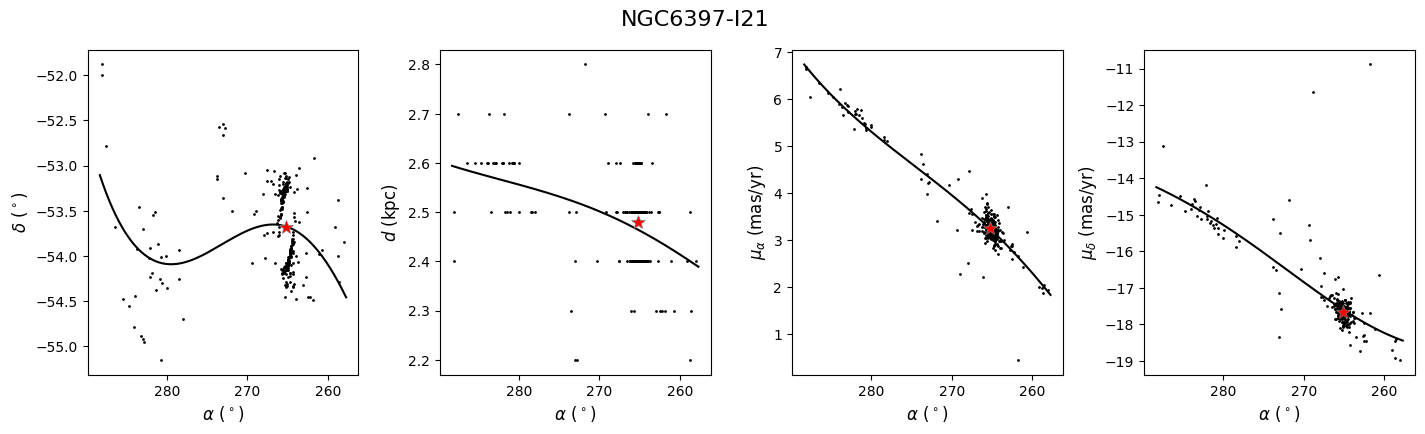

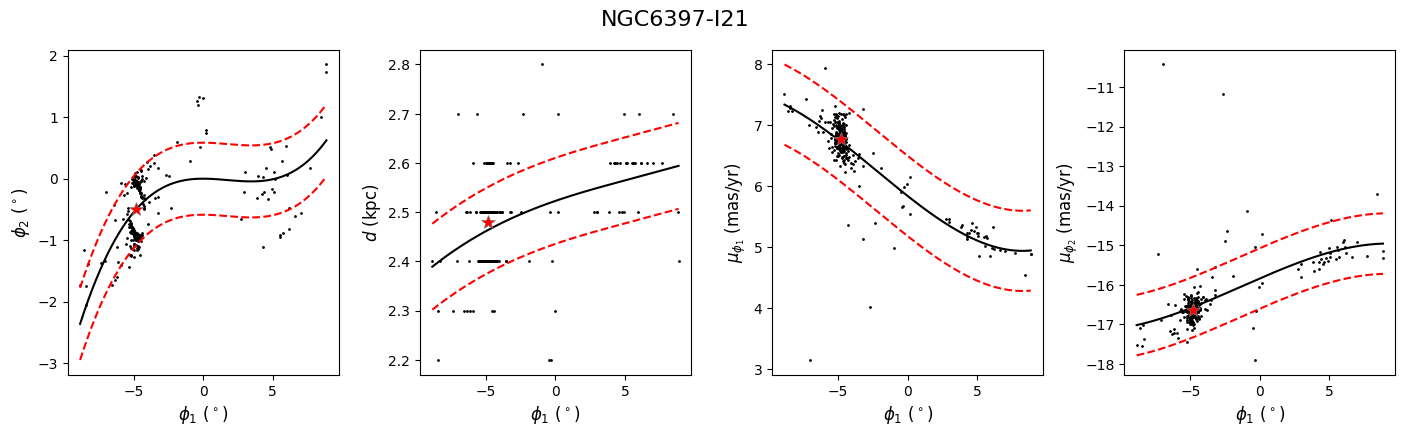

In [823]:
glob_st = glob_g.transform_to(mwsts['NGC6397-I21'].stream_frame)

NGC6397_I21 = I21[I21.StreamName=='NGC6397']

NGC6397_I21_g = ac.SkyCoord(ra=np.array(NGC6397_I21.ra_epoch2000)*u.deg,
                                  dec=np.array(NGC6397_I21.dec_epoch2000)*u.deg,
                                  distance=np.array(NGC6397_I21.dis)*u.kpc,
                                  pm_ra_cosdec=np.array(NGC6397_I21.pmra)*u.mas/u.yr,
                                  pm_dec=np.array(NGC6397_I21.pmdec)*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(NGC6397_I21.pmdec))*u.km/u.s)
    
NGC6397_I21_c = NGC6397_I21_g.transform_to(mwsts['NGC6397-I21'].stream_frame)

print('width_phi2:',np.std(NGC6397_I21_c.phi2.value))
print('width_pmphi1:',np.std(NGC6397_I21_c.pm_phi1_cosphi2.value))
print('width_pmphi2:',np.std(NGC6397_I21_c.pm_phi2.value))
print('width_dist:',np.std(NGC6397_I21_g.distance.value))

# widths.loc['NGC6397-I21'] = [np.std(NGC6397_I21_c.phi2.value), np.std(NGC6397_I21_g.distance.value), np.std(NGC6397_I21_c.pm_phi1_cosphi2.value), np.std(NGC6397_I21_c.pm_phi2.value)]
widths.loc['NGC6397-I21'].width_phi2 = np.std(NGC6397_I21_c.phi2.value)
widths.loc['NGC6397-I21'].width_dist = np.std(NGC6397_I21_g.distance.value)
widths.loc['NGC6397-I21'].width_pmphi1 = np.std(NGC6397_I21_c.pm_phi1_cosphi2.value)
widths.loc['NGC6397-I21'].width_pmphi2 = np.std(NGC6397_I21_c.pm_phi2.value)


fig=plt.figure(1,figsize=(15,5))    
fig.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax=fig.add_subplot(141)
ax.plot(mwsts['NGC6397-I21'].track.ra, mwsts['NGC6397-I21'].track.dec,'-k', lw=1.5, zorder=99)
ax.plot(NGC6397_I21_g.ra, NGC6397_I21_g.dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\delta$ ($^\circ$)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(142)
ax.plot(mwsts['NGC6397-I21'].track.ra, mwsts['NGC6397-I21'].track.distance,'-k', lw=1.5, zorder=99)
ax.plot(NGC6397_I21_g.ra, NGC6397_I21_g.distance,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$d$ (kpc)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(143)
ax.plot(mwsts['NGC6397-I21'].track.ra, mwsts['NGC6397-I21'].track.pm_ra_cosdec,'-k', lw=1.5,zorder=99)
ax.plot(NGC6397_I21_g.ra, NGC6397_I21_g.pm_ra_cosdec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_ra_cosdec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\\alpha$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(144)
ax.plot(mwsts['NGC6397-I21'].track.ra, mwsts['NGC6397-I21'].track.pm_dec,'-k', lw=1.5,zorder=100)
ax.plot(NGC6397_I21_g.ra, NGC6397_I21_g.pm_dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\delta$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

plt.suptitle('NGC6397-I21',fontsize=16);


fig2=plt.figure(2,figsize=(15,5))    
fig2.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax2=fig2.add_subplot(141)
ax2.plot(mwsts['NGC6397-I21'].track.transform_to(mwsts['NGC6397-I21'].stream_frame).phi1, mwsts['NGC6397-I21'].track.transform_to(mwsts['NGC6397-I21'].stream_frame).phi2,'-k', lw=1.5, zorder=99)
ax2.plot(NGC6397_I21_c.phi1, NGC6397_I21_c.phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC6397-I21'].track.transform_to(mwsts['NGC6397-I21'].stream_frame).phi1, mwsts['NGC6397-I21'].track.transform_to(mwsts['NGC6397-I21'].stream_frame).phi2 + n*widths.loc['NGC6397-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC6397-I21'].track.transform_to(mwsts['NGC6397-I21'].stream_frame).phi1, mwsts['NGC6397-I21'].track.transform_to(mwsts['NGC6397-I21'].stream_frame).phi2 - n*widths.loc['NGC6397-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\phi_2$ ($^\circ$)',fontsize=12)

ax2=fig2.add_subplot(142)
ax2.plot(mwsts['NGC6397-I21'].track.transform_to(mwsts['NGC6397-I21'].stream_frame).phi1, mwsts['NGC6397-I21'].track.distance,'-k', lw=1.5, zorder=99)
ax2.plot(NGC6397_I21_c.phi1, NGC6397_I21_g.distance,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC6397-I21'].track.transform_to(mwsts['NGC6397-I21'].stream_frame).phi1, mwsts['NGC6397-I21'].track.distance + n*widths.loc['NGC6397-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC6397-I21'].track.transform_to(mwsts['NGC6397-I21'].stream_frame).phi1, mwsts['NGC6397-I21'].track.distance - n*widths.loc['NGC6397-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$d$ (kpc)',fontsize=12)

ax2=fig2.add_subplot(143)
ax2.plot(mwsts['NGC6397-I21'].track.transform_to(mwsts['NGC6397-I21'].stream_frame).phi1, mwsts['NGC6397-I21'].track.transform_to(mwsts['NGC6397-I21'].stream_frame).pm_phi1_cosphi2,'-k', lw=1.5,zorder=99)
ax2.plot(NGC6397_I21_c.phi1, NGC6397_I21_c.pm_phi1_cosphi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi1_cosphi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC6397-I21'].track.transform_to(mwsts['NGC6397-I21'].stream_frame).phi1, mwsts['NGC6397-I21'].track.transform_to(mwsts['NGC6397-I21'].stream_frame).pm_phi1_cosphi2 + n*widths.loc['NGC6397-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC6397-I21'].track.transform_to(mwsts['NGC6397-I21'].stream_frame).phi1, mwsts['NGC6397-I21'].track.transform_to(mwsts['NGC6397-I21'].stream_frame).pm_phi1_cosphi2 - n*widths.loc['NGC6397-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_1}$ (mas/yr)',fontsize=12)

ax2=fig2.add_subplot(144)
ax2.plot(mwsts['NGC6397-I21'].track.transform_to(mwsts['NGC6397-I21'].stream_frame).phi1, mwsts['NGC6397-I21'].track.transform_to(mwsts['NGC6397-I21'].stream_frame).pm_phi2,'-k', lw=1.5,zorder=100)
ax2.plot(NGC6397_I21_c.phi1, NGC6397_I21_c.pm_phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['NGC6397-I21'].track.transform_to(mwsts['NGC6397-I21'].stream_frame).phi1, mwsts['NGC6397-I21'].track.transform_to(mwsts['NGC6397-I21'].stream_frame).pm_phi2 + n*widths.loc['NGC6397-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['NGC6397-I21'].track.transform_to(mwsts['NGC6397-I21'].stream_frame).phi1, mwsts['NGC6397-I21'].track.transform_to(mwsts['NGC6397-I21'].stream_frame).pm_phi2 - n*widths.loc['NGC6397-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_2}$ (mas/yr)',fontsize=12)

plt.suptitle('NGC6397-I21',fontsize=16);

## Pal5

In [729]:
globs_ = globs[globs['Name'] == 'Pal 5']

globs_d = pd.read_csv('../catalogs/globular_clusters_Baumgardt&Vasiliev2021.txt', header=0, sep='\s+')
globs_d_ = globs_d[globs_d.Cluster == 'Pal_5']

glob_g = ac.SkyCoord(ra=globs_.RAJ2000[0]*u.deg,
                      dec=globs_.DEJ2000[0]*u.deg,
                      distance=float(globs_d_.Rsun.values[0])*u.kpc,
                      pm_ra_cosdec=globs_.pmRA[0]*u.mas/u.yr,
                      pm_dec=globs_.pmDE[0]*u.mas/u.yr,
                      radial_velocity=0*u.km/u.s)

width_phi2: 0.7721930169545818
width_pmphi1: 0.5304376183321443
width_pmphi2: 0.3793715864909933
width_dist: 3.0527537659555115


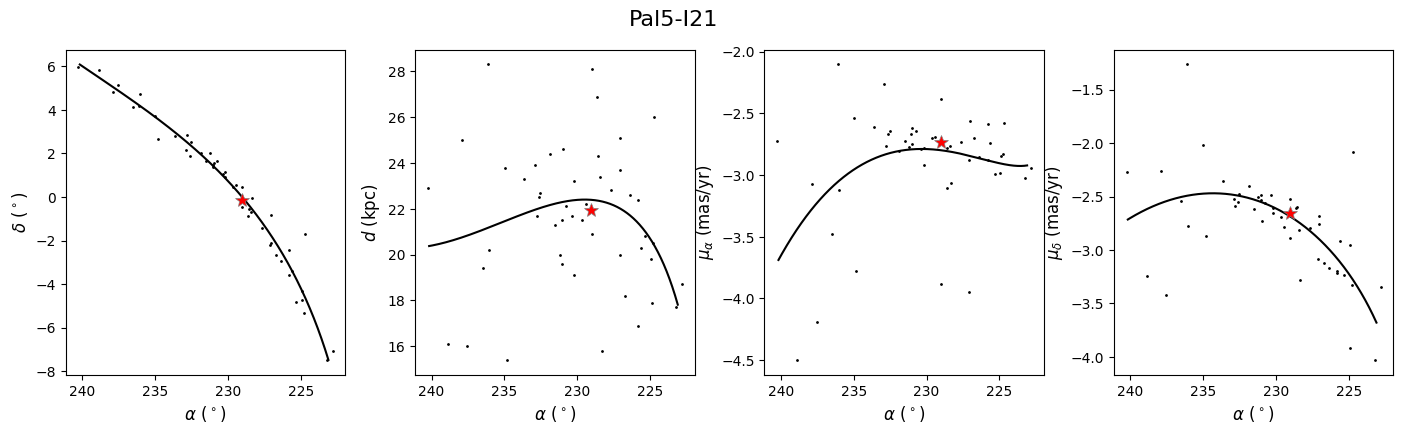

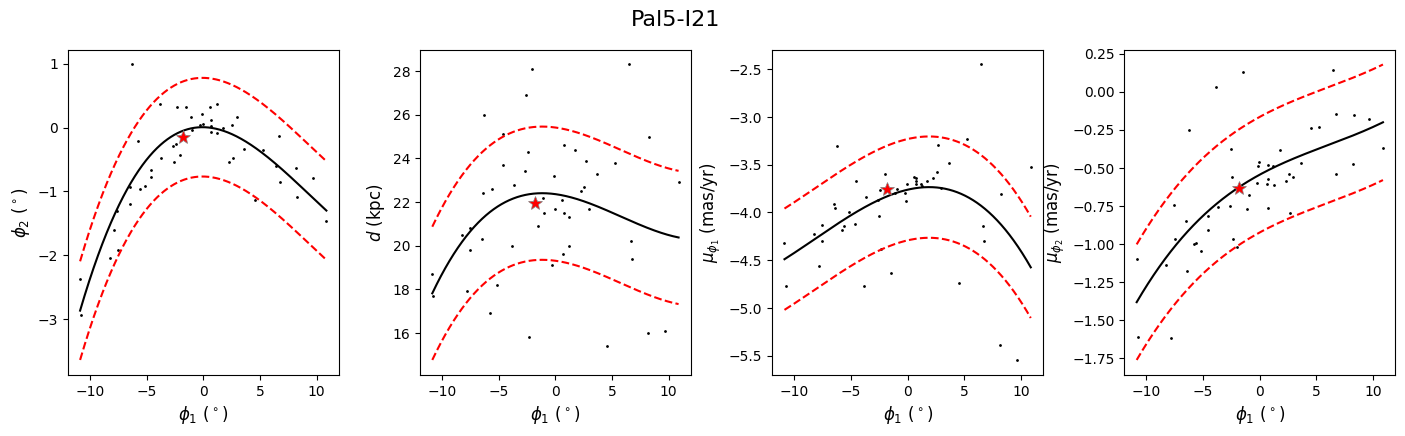

In [707]:
glob_st = glob_g.transform_to(mwsts['Pal5-I21'].stream_frame)

Pal5_I21 = I21[I21.StreamName=='Pal5']

Pal5_I21_g = ac.SkyCoord(ra=np.array(Pal5_I21.ra_epoch2000)*u.deg,
                                  dec=np.array(Pal5_I21.dec_epoch2000)*u.deg,
                                  distance=np.array(Pal5_I21.dis)*u.kpc,
                                  pm_ra_cosdec=np.array(Pal5_I21.pmra)*u.mas/u.yr,
                                  pm_dec=np.array(Pal5_I21.pmdec)*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(Pal5_I21.pmdec))*u.km/u.s)
    
Pal5_I21_c = Pal5_I21_g.transform_to(mwsts['Pal5-I21'].stream_frame)

print('width_phi2:',np.std(Pal5_I21_c.phi2.value))
print('width_pmphi1:',np.std(Pal5_I21_c.pm_phi1_cosphi2.value))
print('width_pmphi2:',np.std(Pal5_I21_c.pm_phi2.value))
print('width_dist:',np.std(Pal5_I21_g.distance.value))

widths.loc['Pal5-I21'].width_phi2 = np.std(Pal5_I21_c.phi2.value)
widths.loc['Pal5-I21'].width_dist = np.std(Pal5_I21_g.distance.value)
widths.loc['Pal5-I21'].width_pmphi1 = np.std(Pal5_I21_c.pm_phi1_cosphi2.value)
widths.loc['Pal5-I21'].width_pmphi2 = np.std(Pal5_I21_c.pm_phi2.value)


fig=plt.figure(1,figsize=(15,5))    
fig.subplots_adjust(wspace=0.25,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax=fig.add_subplot(141)
ax.plot(mwsts['Pal5-I21'].track.ra, mwsts['Pal5-I21'].track.dec,'-k', lw=1.5, zorder=99)
ax.plot(Pal5_I21_g.ra, Pal5_I21_g.dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\delta$ ($^\circ$)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(142)
ax.plot(mwsts['Pal5-I21'].track.ra, mwsts['Pal5-I21'].track.distance,'-k', lw=1.5, zorder=99)
ax.plot(Pal5_I21_g.ra, Pal5_I21_g.distance,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$d$ (kpc)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(143)
ax.plot(mwsts['Pal5-I21'].track.ra, mwsts['Pal5-I21'].track.pm_ra_cosdec,'-k', lw=1.5,zorder=99)
ax.plot(Pal5_I21_g.ra, Pal5_I21_g.pm_ra_cosdec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_ra_cosdec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\\alpha$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(144)
ax.plot(mwsts['Pal5-I21'].track.ra, mwsts['Pal5-I21'].track.pm_dec,'-k', lw=1.5,zorder=100)
ax.plot(Pal5_I21_g.ra, Pal5_I21_g.pm_dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\delta$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

plt.suptitle('Pal5-I21',fontsize=16);


fig2=plt.figure(2,figsize=(15,5))    
fig2.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax2=fig2.add_subplot(141)
ax2.plot(mwsts['Pal5-I21'].track.transform_to(mwsts['Pal5-I21'].stream_frame).phi1, mwsts['Pal5-I21'].track.transform_to(mwsts['Pal5-I21'].stream_frame).phi2,'-k', lw=1.5, zorder=99)
ax2.plot(Pal5_I21_c.phi1, Pal5_I21_c.phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['Pal5-I21'].track.transform_to(mwsts['Pal5-I21'].stream_frame).phi1, mwsts['Pal5-I21'].track.transform_to(mwsts['Pal5-I21'].stream_frame).phi2 + n*widths.loc['Pal5-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['Pal5-I21'].track.transform_to(mwsts['Pal5-I21'].stream_frame).phi1, mwsts['Pal5-I21'].track.transform_to(mwsts['Pal5-I21'].stream_frame).phi2 - n*widths.loc['Pal5-I21'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\phi_2$ ($^\circ$)',fontsize=12)

ax2=fig2.add_subplot(142)
ax2.plot(mwsts['Pal5-I21'].track.transform_to(mwsts['Pal5-I21'].stream_frame).phi1, mwsts['Pal5-I21'].track.distance,'-k', lw=1.5, zorder=99)
ax2.plot(Pal5_I21_c.phi1, Pal5_I21_g.distance,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['Pal5-I21'].track.transform_to(mwsts['Pal5-I21'].stream_frame).phi1, mwsts['Pal5-I21'].track.distance + n*widths.loc['Pal5-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['Pal5-I21'].track.transform_to(mwsts['Pal5-I21'].stream_frame).phi1, mwsts['Pal5-I21'].track.distance - n*widths.loc['Pal5-I21'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$d$ (kpc)',fontsize=12)

ax2=fig2.add_subplot(143)
ax2.plot(mwsts['Pal5-I21'].track.transform_to(mwsts['Pal5-I21'].stream_frame).phi1, mwsts['Pal5-I21'].track.transform_to(mwsts['Pal5-I21'].stream_frame).pm_phi1_cosphi2,'-k', lw=1.5,zorder=99)
ax2.plot(Pal5_I21_c.phi1, Pal5_I21_c.pm_phi1_cosphi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi1_cosphi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['Pal5-I21'].track.transform_to(mwsts['Pal5-I21'].stream_frame).phi1, mwsts['Pal5-I21'].track.transform_to(mwsts['Pal5-I21'].stream_frame).pm_phi1_cosphi2 + n*widths.loc['Pal5-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['Pal5-I21'].track.transform_to(mwsts['Pal5-I21'].stream_frame).phi1, mwsts['Pal5-I21'].track.transform_to(mwsts['Pal5-I21'].stream_frame).pm_phi1_cosphi2 - n*widths.loc['Pal5-I21'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_1}$ (mas/yr)',fontsize=12)

ax2=fig2.add_subplot(144)
ax2.plot(mwsts['Pal5-I21'].track.transform_to(mwsts['Pal5-I21'].stream_frame).phi1, mwsts['Pal5-I21'].track.transform_to(mwsts['Pal5-I21'].stream_frame).pm_phi2,'-k', lw=1.5,zorder=100)
ax2.plot(Pal5_I21_c.phi1, Pal5_I21_c.pm_phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['Pal5-I21'].track.transform_to(mwsts['Pal5-I21'].stream_frame).phi1, mwsts['Pal5-I21'].track.transform_to(mwsts['Pal5-I21'].stream_frame).pm_phi2 + n*widths.loc['Pal5-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['Pal5-I21'].track.transform_to(mwsts['Pal5-I21'].stream_frame).phi1, mwsts['Pal5-I21'].track.transform_to(mwsts['Pal5-I21'].stream_frame).pm_phi2 - n*widths.loc['Pal5-I21'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_2}$ (mas/yr)',fontsize=12)

plt.suptitle('Pal5-I21',fontsize=16);

width_phi2: 0.8709036889726793
width_pmphi1: 0.3797987390890597
width_pmphi2: 0.2942102082565203
width_dist: 1.1516705823782687


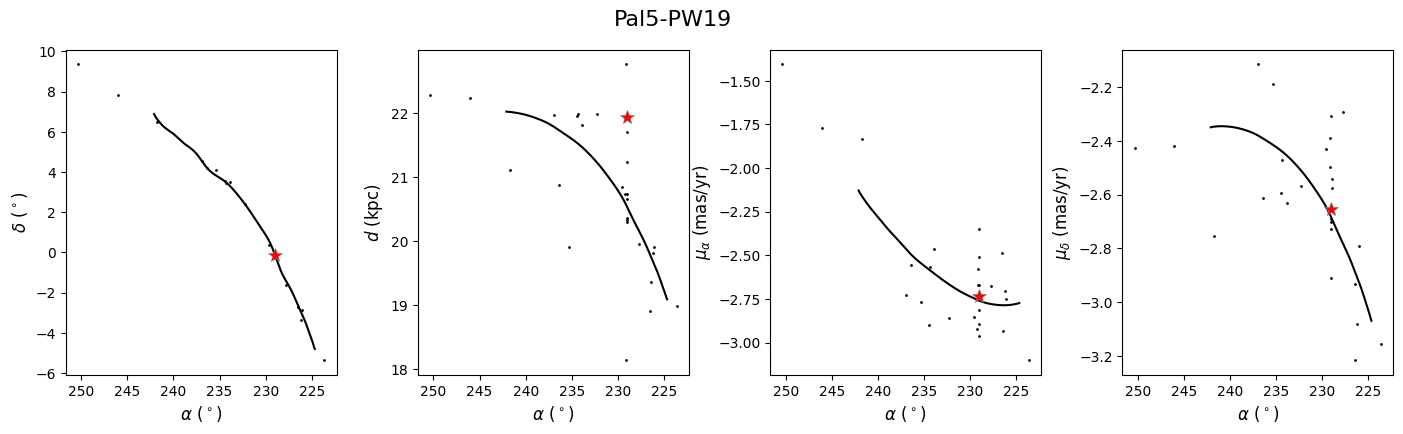

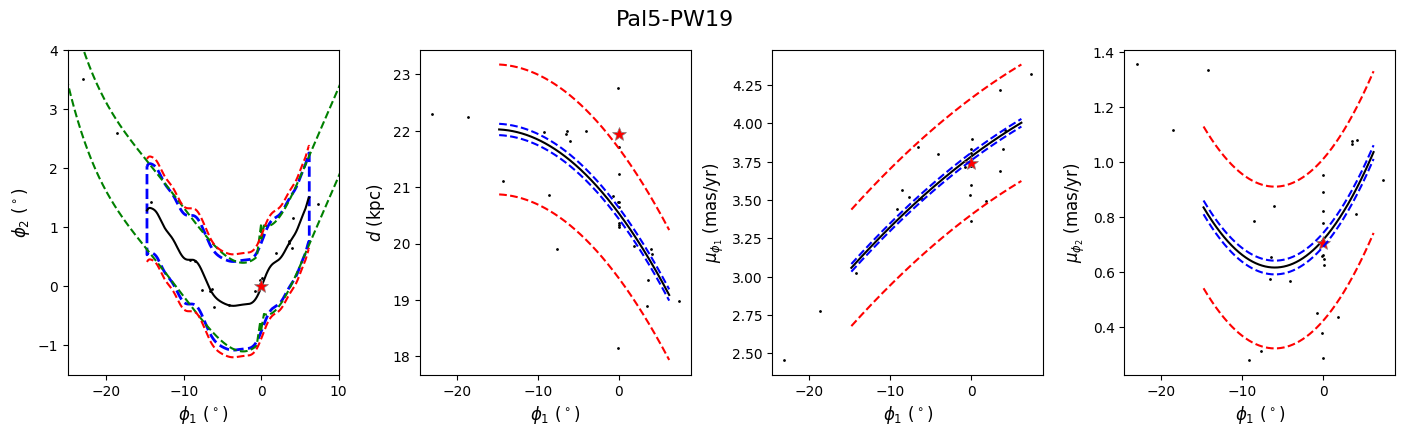

In [738]:
on_poly = mwsts['Pal5-PW19'].create_sky_polygon_footprint_from_track(width=1.5*u.deg, phi2_offset=0.*u.deg)
C_int_Pal5PW19 = [0.05, 0.05, 0.2]

glob_st = glob_g.transform_to(mwsts['Pal5-PW19'].stream_frame)

Pal5_PW19 = pd.DataFrame(Pal5_PW19[(Pal5_PW19['Memb']>0.5) & (Pal5_PW19['Track']==1)])

Pal5_PW19_g = ac.SkyCoord(ra=np.array(Pal5_PW19.RA_ICRS)*u.deg,
                                  dec=np.array(Pal5_PW19.DE_ICRS)*u.deg,
                                  distance=np.array(Pal5_PW19.Dist)*u.kpc,
                                  pm_ra_cosdec=np.array(Pal5_PW19.pmRA)*u.mas/u.yr,
                                  pm_dec=np.array(Pal5_PW19.pmDE)*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(Pal5_PW19.pmDE))*u.km/u.s)
    
Pal5_PW19_c = Pal5_PW19_g.transform_to(mwsts['Pal5-PW19'].stream_frame)

print('width_phi2:',np.std(Pal5_PW19_c.phi2.value))
print('width_pmphi1:',np.std(Pal5_PW19_c.pm_phi1_cosphi2.value))
print('width_pmphi2:',np.std(Pal5_PW19_c.pm_phi2.value))
print('width_dist:',np.std(Pal5_PW19_g.distance.value))

widths.loc['Pal5-PW19'].width_phi2 = np.std(Pal5_PW19_c.phi2.value)
widths.loc['Pal5-PW19'].width_dist = np.std(Pal5_PW19_g.distance.value)
widths.loc['Pal5-PW19'].width_pmphi1 = np.std(Pal5_PW19_c.pm_phi1_cosphi2.value)
widths.loc['Pal5-PW19'].width_pmphi2 = np.std(Pal5_PW19_c.pm_phi2.value)


fig=plt.figure(1,figsize=(15,5))    
fig.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax=fig.add_subplot(141)
ax.plot(mwsts['Pal5-PW19'].track.ra, mwsts['Pal5-PW19'].track.dec,'-k', lw=1.5, zorder=99)
ax.plot(Pal5_PW19_g.ra, Pal5_PW19_g.dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\delta$ ($^\circ$)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(142)
ax.plot(mwsts['Pal5-PW19'].track.ra, mwsts['Pal5-PW19'].track.distance,'-k', lw=1.5, zorder=99)
ax.plot(Pal5_PW19_g.ra, Pal5_PW19_g.distance,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$d$ (kpc)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(143)
ax.plot(mwsts['Pal5-PW19'].track.ra, mwsts['Pal5-PW19'].track.pm_ra_cosdec,'-k', lw=1.5,zorder=99)
ax.plot(Pal5_PW19_g.ra, Pal5_PW19_g.pm_ra_cosdec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_ra_cosdec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\\alpha$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(144)
ax.plot(mwsts['Pal5-PW19'].track.ra, mwsts['Pal5-PW19'].track.pm_dec,'-k', lw=1.5,zorder=100)
ax.plot(Pal5_PW19_g.ra, Pal5_PW19_g.pm_dec,'.k',ms=2)
ax.plot(glob_g.ra, glob_g.pm_dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\delta$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

plt.suptitle('Pal5-PW19',fontsize=16);


fig2=plt.figure(2,figsize=(15,5))    
fig2.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax2=fig2.add_subplot(141)
ax2.plot(mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).phi1, mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).phi2,'-k', lw=1.5, zorder=99)
ax2.plot(Pal5_PW19_c.phi1, Pal5_PW19_c.phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).phi1, mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).phi2 + n*widths.loc['Pal5-PW19'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).phi1, mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).phi2 - n*widths.loc['Pal5-PW19'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(on_poly.phi1, on_poly.phi2, '--', c='blue', lw=2)
ax2.plot(on_poly2.transform_to(mwsts['Pal5-PW19'].stream_frame).phi1, on_poly2.transform_to(mwsts['Pal5-PW19'].stream_frame).phi2,'--',c='green',lw=1.5)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\phi_2$ ($^\circ$)',fontsize=12)
ax2.set_xlim(-25,10)
ax2.set_ylim(-1.5,4)

ax2=fig2.add_subplot(142)
ax2.plot(mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).phi1, mwsts['Pal5-PW19'].track.distance,'-k', lw=1.5, zorder=99)
ax2.plot(Pal5_PW19_c.phi1, Pal5_PW19_g.distance,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).phi1, mwsts['Pal5-PW19'].track.distance + n*widths.loc['Pal5-PW19'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).phi1, mwsts['Pal5-PW19'].track.distance - n*widths.loc['Pal5-PW19'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).phi1, mwsts['Pal5-PW19'].track.distance + C_int_Pal5PW19[2]*u.kpc/2,'--',c='blue',lw=1.5,zorder=102)
ax2.plot(mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).phi1, mwsts['Pal5-PW19'].track.distance - C_int_Pal5PW19[2]*u.kpc/2,'--',c='blue',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$d$ (kpc)',fontsize=12)

ax2=fig2.add_subplot(143)
ax2.plot(mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).phi1, mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).pm_phi1_cosphi2,'-k', lw=1.5,zorder=99)
ax2.plot(Pal5_PW19_c.phi1, Pal5_PW19_c.pm_phi1_cosphi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi1_cosphi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).phi1, mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).pm_phi1_cosphi2 + n*widths.loc['Pal5-PW19'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).phi1, mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).pm_phi1_cosphi2 - n*widths.loc['Pal5-PW19'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).phi1, mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).pm_phi1_cosphi2 + C_int_Pal5PW19[0]*u.mas/u.yr/2,'--',c='blue',lw=1.5,zorder=102)
ax2.plot(mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).phi1, mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).pm_phi1_cosphi2 - C_int_Pal5PW19[0]*u.mas/u.yr/2,'--',c='blue',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_1}$ (mas/yr)',fontsize=12)

ax2=fig2.add_subplot(144)
ax2.plot(mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).phi1, mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).pm_phi2,'-k', lw=1.5,zorder=100)
ax2.plot(Pal5_PW19_c.phi1, Pal5_PW19_c.pm_phi2,'.k',ms=2)
ax2.plot(glob_st.phi1, glob_st.pm_phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).phi1, mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).pm_phi2 + n*widths.loc['Pal5-PW19'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).phi1, mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).pm_phi2 - n*widths.loc['Pal5-PW19'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).phi1, mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).pm_phi2 + C_int_Pal5PW19[1]*u.mas/u.yr/2,'--',c='blue',lw=1.5,zorder=102)
ax2.plot(mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).phi1, mwsts['Pal5-PW19'].track.transform_to(mwsts['Pal5-PW19'].stream_frame).pm_phi2 - C_int_Pal5PW19[1]*u.mas/u.yr/2,'--',c='blue',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_2}$ (mas/yr)',fontsize=12)

plt.suptitle('Pal5-PW19',fontsize=16);

In [747]:
.8709*2

1.7418

In [725]:
widths.loc['Pal5-PW19']

width_phi2      0.870904
width_dist      1.151671
width_pmphi1    0.379799
width_pmphi2     0.29421
Name: Pal5-PW19, dtype: object

In [753]:
print('factor phi2: ',(1.5/2)/widths.loc['Pal5-PW19'].width_phi2)
print('factor pmphi1: ',C_int_Pal5PW19[0]/widths.loc['Pal5-PW19'].width_pmphi1)
print('factor pmphi2: ',C_int_Pal5PW19[1]/widths.loc['Pal5-PW19'].width_pmphi2)
print('factor dist: ',C_int_Pal5PW19[2]/widths.loc['Pal5-PW19'].width_dist)

print('\n')

print('factor phi2: ',1/((1.5/2)/widths.loc['Pal5-PW19'].width_phi2))
print('factor pmphi1: ',1/(C_int_Pal5PW19[0]/widths.loc['Pal5-PW19'].width_pmphi1))
print('factor pmphi2: ',1/(C_int_Pal5PW19[1]/widths.loc['Pal5-PW19'].width_pmphi2))
print('factor dist: ',1/(C_int_Pal5PW19[2]/widths.loc['Pal5-PW19'].width_dist))

print('\n')

print(1/((1.5/2)/widths.loc['Pal5-PW19'].width_phi2))
mean_factor = (np.mean([1/(C_int_Pal5PW19[0]/widths.loc['Pal5-PW19'].width_pmphi1), 1/(C_int_Pal5PW19[1]/widths.loc['Pal5-PW19'].width_pmphi2), 1/(C_int_Pal5PW19[2]/widths.loc['Pal5-PW19'].width_dist)]))
print(mean_factor)

factor phi2:  0.8611744438523418
factor pmphi1:  0.1316486729785467
factor pmphi2:  0.16994651645943323
factor dist:  0.17366076989392926


factor phi2:  1.1612049186302391
factor pmphi1:  7.595974781781193
factor pmphi2:  5.884204165130405
factor dist:  5.758352911891343


1.1612049186302391
6.412843952934313


In [757]:
widths.loc['Pal5-PW19',['width_pmphi1', 'width_pmphi2', 'width_dist']]/mean_factor

width_pmphi1    0.059225
width_pmphi2    0.045878
width_dist      0.179588
Name: Pal5-PW19, dtype: object

## Tucana III

In [681]:
Tucana_g = ac.SkyCoord(ra=359.15*u.deg,
                      dec=-59.15*u.deg,
                      distance=25.1*u.kpc) #Drlica-Wagner
Tucana_st = Tucana_g.transform_to(mwsts['TucanaIII-S19'].stream_frame)

width_phi2: 0.11785968274666817
width_pmphi1: 0.14006396025507678
width_pmphi2: 0.1107700116382013
width_dist: 4.83689321314914


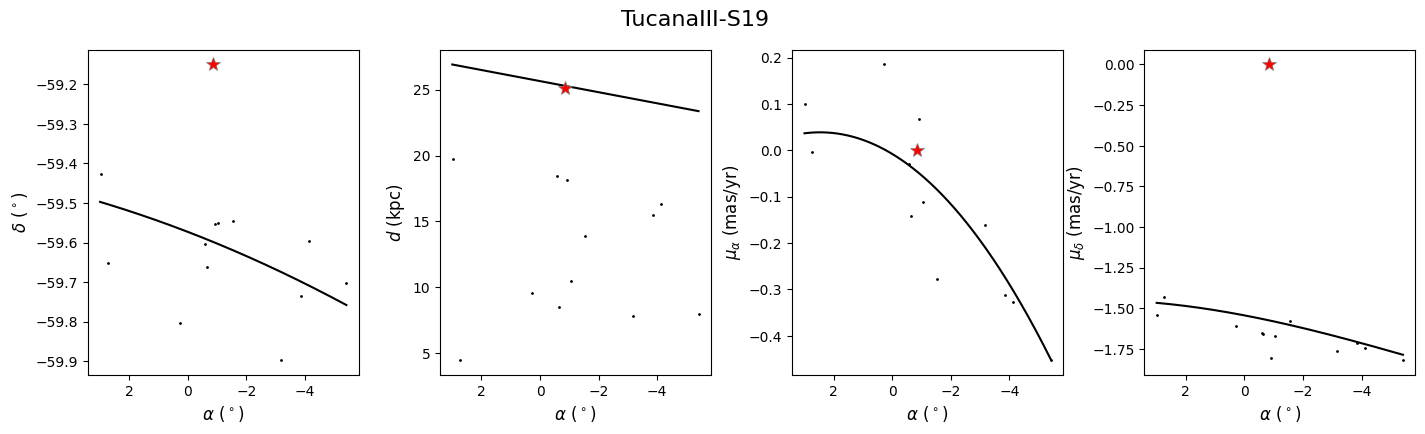

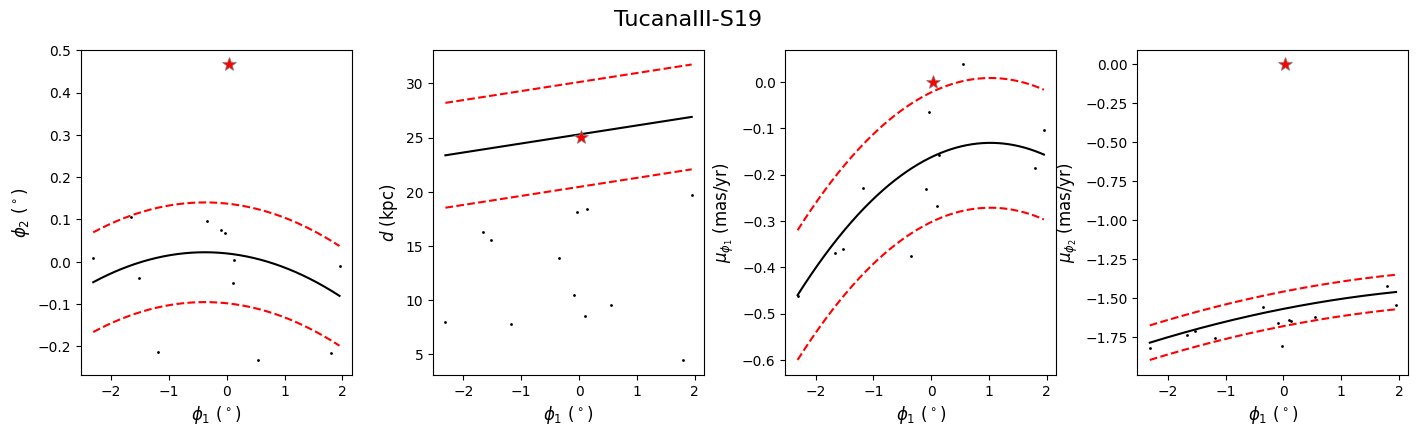

In [683]:
pd.set_option('display.max_columns', None)
TucIII_S19 = S19[S19.Stream=='TucanaIII']
TucIII_S19 = TucIII_S19[TucIII_S19.parallax>0.05]

TucIII_S19_g = ac.SkyCoord(ra=np.array(TucIII_S19.ra_epoch2000)*u.deg,
                                  dec=np.array(TucIII_S19.dec_epoch2000)*u.deg,
                                  distance=np.array(1/TucIII_S19.parallax)*u.kpc,
                                  pm_ra_cosdec=np.array(TucIII_S19.pmra)*u.mas/u.yr,
                                  pm_dec=np.array(TucIII_S19.pmdec)*u.mas/u.yr,
                                  radial_velocity=np.zeros(len(TucIII_S19.pmdec))*u.km/u.s)
    
TucIII_S19_c = TucIII_S19_g.transform_to(mwsts['TucanaIII-S19'].stream_frame)

print('width_phi2:',np.std(TucIII_S19_c.phi2.value))
print('width_pmphi1:',np.std(TucIII_S19_c.pm_phi1_cosphi2.value))
print('width_pmphi2:',np.std(TucIII_S19_c.pm_phi2.value))
print('width_dist:',np.std(TucIII_S19_g.distance.value))

widths.loc['TucanaIII-S19'].width_phi2 = np.std(TucIII_S19_c.phi2.value)
widths.loc['TucanaIII-S19'].width_dist = np.std(TucIII_S19_g.distance.value)
widths.loc['TucanaIII-S19'].width_pmphi1 = np.std(TucIII_S19_c.pm_phi1_cosphi2.value)
widths.loc['TucanaIII-S19'].width_pmphi2 = np.std(TucIII_S19_c.pm_phi2.value)


fig=plt.figure(1,figsize=(15,5))    
fig.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax=fig.add_subplot(141)
ax.plot(mwsts['TucanaIII-S19'].track.ra.wrap_at(180*u.deg), mwsts['TucanaIII-S19'].track.dec,'-k', lw=1.5, zorder=99)
ax.plot(TucIII_S19_g.ra.wrap_at(180*u.deg), TucIII_S19_g.dec,'.k',ms=2)
ax.plot(Tucana_g.ra.wrap_at(180*u.deg), Tucana_g.dec, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\delta$ ($^\circ$)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(142)
ax.plot(mwsts['TucanaIII-S19'].track.ra.wrap_at(180*u.deg), mwsts['TucanaIII-S19'].track.distance,'-k', lw=1.5, zorder=99)
ax.plot(TucIII_S19_g.ra.wrap_at(180*u.deg), TucIII_S19_g.distance,'.k',ms=2)
ax.plot(Tucana_g.ra.wrap_at(180*u.deg), Tucana_g.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$d$ (kpc)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(143)
ax.plot(mwsts['TucanaIII-S19'].track.ra.wrap_at(180*u.deg), mwsts['TucanaIII-S19'].track.pm_ra_cosdec,'-k', lw=1.5,zorder=99)
ax.plot(TucIII_S19_g.ra.wrap_at(180*u.deg), TucIII_S19_g.pm_ra_cosdec,'.k',ms=2)
ax.plot(Tucana_g.ra.wrap_at(180*u.deg), 0, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\\alpha$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

ax=fig.add_subplot(144)
ax.plot(mwsts['TucanaIII-S19'].track.ra.wrap_at(180*u.deg), mwsts['TucanaIII-S19'].track.pm_dec,'-k', lw=1.5,zorder=100)
ax.plot(TucIII_S19_g.ra.wrap_at(180*u.deg), TucIII_S19_g.pm_dec,'.k',ms=2)
ax.plot(Tucana_g.ra.wrap_at(180*u.deg), 0, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax.set_xlabel('$\\alpha$ ($^\circ$)',fontsize=12)
ax.set_ylabel('$\mu_\delta$ (mas/yr)',fontsize=12)
ax.invert_xaxis()

plt.suptitle('TucanaIII-S19',fontsize=16);


fig2=plt.figure(2,figsize=(15,5))    
fig2.subplots_adjust(wspace=0.3,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax2=fig2.add_subplot(141)
ax2.plot(mwsts['TucanaIII-S19'].track.transform_to(mwsts['TucanaIII-S19'].stream_frame).phi1, mwsts['TucanaIII-S19'].track.transform_to(mwsts['TucanaIII-S19'].stream_frame).phi2,'-k', lw=1.5, zorder=99)
ax2.plot(TucIII_S19_c.phi1, TucIII_S19_c.phi2,'.k',ms=2)
ax2.plot(Tucana_st.phi1, Tucana_st.phi2, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['TucanaIII-S19'].track.transform_to(mwsts['TucanaIII-S19'].stream_frame).phi1, mwsts['TucanaIII-S19'].track.transform_to(mwsts['TucanaIII-S19'].stream_frame).phi2 + n*widths.loc['TucanaIII-S19'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['TucanaIII-S19'].track.transform_to(mwsts['TucanaIII-S19'].stream_frame).phi1, mwsts['TucanaIII-S19'].track.transform_to(mwsts['TucanaIII-S19'].stream_frame).phi2 - n*widths.loc['TucanaIII-S19'].width_phi2*u.deg/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\phi_2$ ($^\circ$)',fontsize=12)

ax2=fig2.add_subplot(142)
ax2.plot(mwsts['TucanaIII-S19'].track.transform_to(mwsts['TucanaIII-S19'].stream_frame).phi1, mwsts['TucanaIII-S19'].track.distance,'-k', lw=1.5, zorder=99)
ax2.plot(TucIII_S19_c.phi1, TucIII_S19_c.distance,'.k',ms=2)
ax2.plot(Tucana_st.phi1, Tucana_st.distance, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['TucanaIII-S19'].track.transform_to(mwsts['TucanaIII-S19'].stream_frame).phi1, mwsts['TucanaIII-S19'].track.distance + n*widths.loc['TucanaIII-S19'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['TucanaIII-S19'].track.transform_to(mwsts['TucanaIII-S19'].stream_frame).phi1, mwsts['TucanaIII-S19'].track.distance - n*widths.loc['TucanaIII-S19'].width_dist*u.kpc/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$d$ (kpc)',fontsize=12)

ax2=fig2.add_subplot(143)
ax2.plot(mwsts['TucanaIII-S19'].track.transform_to(mwsts['TucanaIII-S19'].stream_frame).phi1, mwsts['TucanaIII-S19'].track.transform_to(mwsts['TucanaIII-S19'].stream_frame).pm_phi1_cosphi2,'-k', lw=1.5,zorder=99)
ax2.plot(TucIII_S19_c.phi1, TucIII_S19_c.pm_phi1_cosphi2,'.k',ms=2)
ax2.plot(Tucana_st.phi1, 0, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['TucanaIII-S19'].track.transform_to(mwsts['TucanaIII-S19'].stream_frame).phi1, mwsts['TucanaIII-S19'].track.transform_to(mwsts['TucanaIII-S19'].stream_frame).pm_phi1_cosphi2 + n*widths.loc['TucanaIII-S19'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['TucanaIII-S19'].track.transform_to(mwsts['TucanaIII-S19'].stream_frame).phi1, mwsts['TucanaIII-S19'].track.transform_to(mwsts['TucanaIII-S19'].stream_frame).pm_phi1_cosphi2 - n*widths.loc['TucanaIII-S19'].width_pmphi1*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_1}$ (mas/yr)',fontsize=12)

ax2=fig2.add_subplot(144)
ax2.plot(mwsts['TucanaIII-S19'].track.transform_to(mwsts['TucanaIII-S19'].stream_frame).phi1, mwsts['TucanaIII-S19'].track.transform_to(mwsts['TucanaIII-S19'].stream_frame).pm_phi2,'-k', lw=1.5,zorder=100)
ax2.plot(TucIII_S19_c.phi1, TucIII_S19_c.pm_phi2,'.k',ms=2)
ax2.plot(Tucana_st.phi1, 0, '*', c='gray', mfc='red',ms=10, mew=.5,zorder=101)
ax2.plot(mwsts['TucanaIII-S19'].track.transform_to(mwsts['TucanaIII-S19'].stream_frame).phi1, mwsts['TucanaIII-S19'].track.transform_to(mwsts['TucanaIII-S19'].stream_frame).pm_phi2 + n*widths.loc['TucanaIII-S19'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.plot(mwsts['TucanaIII-S19'].track.transform_to(mwsts['TucanaIII-S19'].stream_frame).phi1, mwsts['TucanaIII-S19'].track.transform_to(mwsts['TucanaIII-S19'].stream_frame).pm_phi2 - n*widths.loc['TucanaIII-S19'].width_pmphi2*u.mas/u.yr/2,'--',c='red',lw=1.5,zorder=102)
ax2.set_xlabel('$\phi_1$ ($^\circ$)',fontsize=12)
ax2.set_ylabel('$\mu_{\phi_2}$ (mas/yr)',fontsize=12)


plt.suptitle('TucanaIII-S19',fontsize=16);

## Resumen

In [827]:
widths.sort_values('TrackName')

width_phi2 width_dist width_pmphi1 width_pmphi2
TrackName                                                     
Fimbulthul-I21   3.824924    0.78802     3.412031     3.736645
Fjorm-I21        2.847056   1.154675     1.494764     1.263825
Gjoll-I21         0.69876   0.307324     2.254171     0.478484
M2-G22           4.679204        0.0     2.167662     0.424777
M2-I21           0.501923    1.20532     0.853582     0.327026
M5-G19           1.135932   1.006221     1.210678     0.573935
M5-I21           0.424955   0.638833     0.828208     0.936785
M68-I21          0.516401   0.404418     1.416439     0.689793
M68-P19          2.303455   3.086828     1.490779     0.861307
M92-I21          2.121984   1.503154     0.875972     1.075951
NGC1261-I21      1.297877   4.693632     0.452035     0.349501
NGC1851-I21      2.442767   3.593385     0.148716     0.095102
NGC2298-I21      0.501923    1.20532     0.853582     0.327026
NGC2808-I21      0.510359   2.291752     1.777029     0.940116
NGC288-I21       0.885729   0.733475     0.271176     0.315491
NGC3201-I21      0.659707   0.808572     1.558403      0.59159
NGC3201-P21      2.500204   2.905074    10.730593     0.791338
NGC5466-I21      0.501923    1.20532     0.853582     0.327026
NGC5466-J21      1.202667   3.381192     0.553975     0.382638
NGC6101-I21      0.501923    1.20532     0.853582     0.327026
NGC6397-I21      0.585611   0.087273      0.65705      0.76483
OmegaCen-I21     3.824924    0.78802     3.412031     3.736645
Pal5-I21         0.772193   3.052754     0.530438     0.379372
Pal5-PW19        0.870904   1.151671     0.379799      0.29421
TucanaIII-S19     0.11786   4.836893     0.140064      0.11077

# Pal 5

Initializing galstreams library from master_log... 


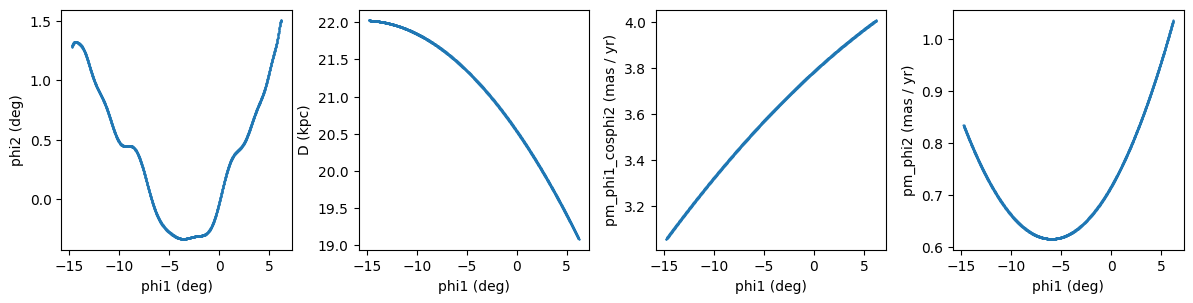

In [3]:
st = 'Pal5-PW19'
Name = 'Pal 5'
Name_d = 'Pal_5'

mwsts = galstreams.MWStreams(verbose=False, implement_Off=True)

scat_kwds = dict(marker='.',label=st, s=1)#, fontsize=10)
# galstreams.plot_5D_tracks_subplots_row(mwsts[st].track, frame = ac.ICRS(), show_ylabels=True, )
# galstreams.plot_5D_tracks_subplots_row(mwsts[st].track, frame = ac.Galactic(), show_ylabels=True, )

galstreams.plot_5D_tracks_subplots_row(mwsts[st].track, frame = mwsts[st].stream_frame, show_ylabels=True, scat_kwds=scat_kwds)

In [4]:
phi1_t = mwsts[st].track.transform_to(mwsts[st].stream_frame).phi1
phi2_t = mwsts[st].track.transform_to(mwsts[st].stream_frame).phi2
pmphi1_t = mwsts[st].track.transform_to(mwsts[st].stream_frame).pm_phi1_cosphi2
pmphi2_t = mwsts[st].track.transform_to(mwsts[st].stream_frame).pm_phi2
d_t = mwsts[st].track.transform_to(mwsts[st].stream_frame).distance


phi1o = min(phi1_t.deg) - (max(phi1_t.deg)-min(phi1_t.deg))/3
phi1f = max(phi1_t.deg) + (max(phi1_t.deg)-min(phi1_t.deg))/3
phi2o = min(phi2_t.deg) - (max(phi2_t.deg)-min(phi2_t.deg))/1
phi2f = max(phi2_t.deg) + (max(phi2_t.deg)-min(phi2_t.deg))/1

phi1_lim = (phi1o,phi1f)
phi2_lim = (phi2o,phi2f)

In [6]:
_tbl = Table.read('../catalogs/gaiaDR3/masterv4.rrls.gapzo.gdr3-full.csv.gz', format='ascii.csv')
_tbl_dist = Table.read('../catalogs/gaiaDR3/masterv4.rrls.gapzo.dist.short.csv.gz', format='ascii.csv') #OverflowError warning
_tbl['Dist'] = _tbl_dist['Dist']
_tbl['Dist_err'] = _tbl_dist['Dist_err']
_tbl['metallicity_gaia'] = _tbl_dist['metallicity_gaia']


def skip_mask(ra, dec):
    c1 = ac.SkyCoord(ra, dec)
    c2 = ac.SkyCoord(skip_globs['RAJ2000']*u.deg, skip_globs['DEJ2000']*u.deg)

    mask = np.ones(len(ra), dtype=bool)
    for c in c2:
        mask &= c1.separation(c) > 0.5*u.deg

    return mask

def skip_mask2(ra, dec):
    c1 = ac.SkyCoord(ra, dec)
    c2 = ac.SkyCoord(Angle(darwf_galax['RAJ2000'] + 'hours').value*15*u.deg, Angle(darwf_galax['DEJ2000'] + 'degrees').value*u.deg)

    mask = np.ones(len(ra), dtype=bool)
    for c in c2:
        mask &= c1.separation(c) > 0.5*u.deg

    return mask

In [7]:
f = fits.open('../catalogs/globular_clusters_Vasiliev&Baumgardt2021.fit')
globs = f[1].data
globs_ = globs[globs['Name'] == Name]

globs_d = pd.read_csv('../catalogs/globular_clusters_Baumgardt&Vasiliev2021.txt', header=0, sep='\s+')
globs_d_ = globs_d[globs_d.Cluster == Name_d]


glob_g = ac.SkyCoord(ra=globs_.RAJ2000[0]*u.deg,
                      dec=globs_.DEJ2000[0]*u.deg,
                      distance=float(globs_d_.Rsun.values[0])*u.kpc,
                      pm_ra_cosdec=globs_.pmRA[0]*u.mas/u.yr,
                      pm_dec=globs_.pmDE[0]*u.mas/u.yr,
                      radial_velocity=0*u.km/u.s)

glob_st = glob_g.transform_to(mwsts[st].stream_frame)


f = fits.open('../catalogs/darwf_galaxies_localgroup_McConnachie2012.fit')
darwf_galax = f[1].data



In [9]:
rao = min(mwsts[st].track.ra.deg) - (max(mwsts[st].track.ra.deg)-min(mwsts[st].track.ra.deg))/4
raf = max(mwsts[st].track.ra.deg) + (max(mwsts[st].track.ra.deg)-min(mwsts[st].track.ra.deg))/4
deco = min(mwsts[st].track.dec.deg) - (max(mwsts[st].track.dec.deg)-min(mwsts[st].track.dec.deg))/2
decf = max(mwsts[st].track.dec.deg) + (max(mwsts[st].track.dec.deg)-min(mwsts[st].track.dec.deg))/2
do = min(mwsts[st].track.distance.kpc) - (max(mwsts[st].track.distance.kpc)-min(mwsts[st].track.distance.kpc))*3
df = max(mwsts[st].track.distance.kpc) + (max(mwsts[st].track.distance.kpc)-min(mwsts[st].track.distance.kpc))*3

ra_lim = (rao, raf)
dec_lim = (deco, decf)
d_lim = (do, df)

#pal5
# d_lim = (10, 35)
# ra_lim = (215, 255)
# dec_lim = (-15, 10)

print(ra_lim)
print(dec_lim)
print(d_lim)

skip_globs = globs[(globs['RAJ2000'] > ra_lim[0]) & (globs['RAJ2000'] < ra_lim[1]) & 
                   (globs['DEJ2000'] > dec_lim[0]) & (globs['DEJ2000'] < dec_lim[1]) &
                   (globs['Name'] != Name)]

skip_galax = darwf_galax[(Angle(darwf_galax['RAJ2000'] + 'hours').value*15 > ra_lim[0]) & (Angle(darwf_galax['RAJ2000'] + 'hours').value*15 < ra_lim[1]) & 
                         (Angle(darwf_galax['DEJ2000'] + 'degrees').value > dec_lim[0]) & (Angle(darwf_galax['DEJ2000'] + 'degrees').value < dec_lim[1])]

g_all = GaiaData(_tbl)
c_all = g_all.get_skycoord(distance=g_all.Dist*u.kpc, radial_velocity = np.zeros(len(g_all.Dist))*u.km/u.s)
c_all_st = c_all.transform_to(mwsts[st].stream_frame)

mask =  (g_all.ra > ra_lim[0]*u.deg) & (g_all.ra < ra_lim[1]*u.deg) & \
        (g_all.dec > dec_lim[0]*u.deg) & (g_all.dec < dec_lim[1]*u.deg) & \
        skip_mask(g_all.ra, g_all.dec) & \
        skip_mask2(g_all.ra, g_all.dec) & \
        (g_all.pmra.value!=1e20) & (g_all.pmdec.value != 1e20) & \
        (g_all.pmra.value != 0.) & (g_all.pmdec.value != 0.) & \
        (g_all.Dist > d_lim[0]) & (g_all.Dist < d_lim[1])


g_all = g_all[mask]
c_all = c_all[mask]
c_all_st = c_all_st[mask]

phi1 = c_all_st.phi1 #deg
phi2 = c_all_st.phi2 #deg
pmphi1 = c_all_st.pm_phi1_cosphi2 #mas/yr
pmphi2 = c_all_st.pm_phi2 #mas/yr
d = g_all.Dist #kpc
e_d = g_all.Dist_err #kpc

y = np.array([pmphi1.value, pmphi2.value, d])

ra = g_all.ra.value #deg
dec = g_all.dec.value #deg

pmra = c_all.pm_ra_cosdec.value #data['pmRA'][mask] #mas/yr
e_pmra = g_all.pmra_error.value #mas/yr
pmdec = c_all.pm_dec.value #data['pmDE'][mask] #mas/yr
e_pmdec = g_all.pmdec_error.value #mas/yr
pmra_pmdec_corr = g_all.pmra_pmdec_corr


#Matriz de covarianza de las estrellas intrinsica + observacional 
C_pm_radec = g_all.get_cov()[:, 3:5, 3:5]
C_pm = gc.transform_pm_cov(c_all, C_pm_radec, mwsts[st].stream_frame)
C_obs = np.zeros((len(e_pmra),3,3)) #Matriz de covarianza observacional en el frame del stream
C_obs[:,:2,:2] = C_pm
C_obs[:,2,2] = e_d**2


C_int = np.diag([0.05, 0.05, 0.2])**2 #HACK, mas/yr, mas/yr, kpc

C_tot = C_int + C_obs

width = 1.5 #HACK

on_poly = mwsts[st].create_sky_polygon_footprint_from_track(width=width*u.deg, phi2_offset=0.*u.deg)
field = ac.SkyCoord(ra=ra*u.deg, dec=dec*u.deg, frame='icrs')
footprint = galstreams.get_mask_in_poly_footprint(on_poly, field, stream_frame=mwsts[st].stream_frame)


(220.29828134300914, 246.45293329027237)
(-10.6423199510995, 12.724899484307443)
(10.28271090213503, 30.82893131699109)


In [726]:
#Price-Whelan 2019
f = fits.open('../catalogs/streams/pal5/RRLwithprobthin.fit')
data = f[1].data
star_PW = (data.Memb>0.5) & (data.Track==1)

data_PW_g = ac.SkyCoord(ra=data.RA_ICRS*u.deg,
                      dec=data.DE_ICRS*u.deg,
                      distance=data.Dist*u.kpc,
                      pm_ra_cosdec=data.pmRA*u.mas/u.yr,
                      pm_dec=data.pmDE*u.mas/u.yr,
                      radial_velocity=np.zeros(len(data.RA_ICRS))*u.km/u.s)

data_PW_st = data_PW_g.transform_to(mwsts[st].stream_frame)

skypath = np.loadtxt('../catalogs/streams/pal5/pal5_extended_skypath.icrs.txt')
skypath_N = ac.SkyCoord(ra=skypath[:,0]*u.deg, dec=skypath[:,1]*u.deg, frame='icrs')
skypath_S = ac.SkyCoord(ra=skypath[:,0]*u.deg, dec=skypath[:,2]*u.deg, frame='icrs')

# Concatenate N track, S-flipped track and add first point at the end to close the polygon (needed for ADQL)
on_poly2 = ac.SkyCoord(ra = np.concatenate((skypath_N.ra,skypath_S.ra[::-1],skypath_N.ra[:1])),
                        dec = np.concatenate((skypath_N.dec,skypath_S.dec[::-1],skypath_N.dec[:1])),
                        unit=u.deg, frame='icrs')
footprint2 = galstreams.get_mask_in_poly_footprint(on_poly2, field, stream_frame=mwsts[st].stream_frame)

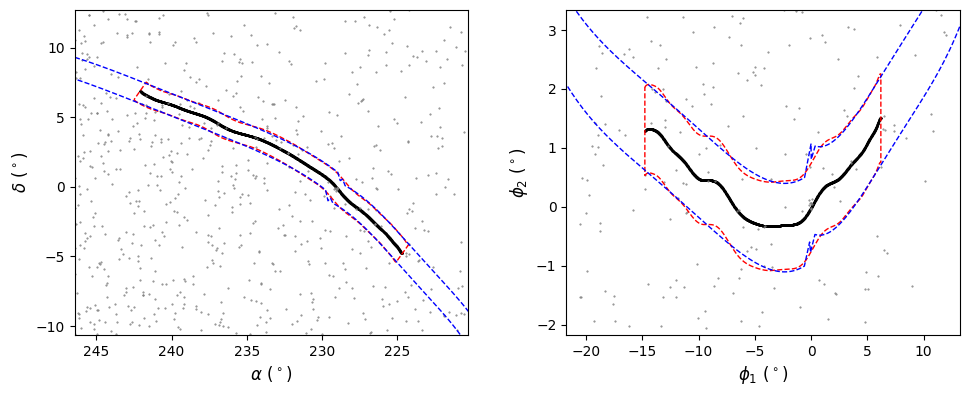

In [11]:
fig=plt.figure(1,figsize=(10,5))    
fig.subplots_adjust(wspace=0.25,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax=fig.add_subplot(121)
ax.plot(mwsts[st].track.ra, mwsts[st].track.dec,'.k', ms=1)
ax.plot(ra,dec,'.', c='gray', ms=1)
ax.plot(on_poly.transform_to(ac.ICRS).ra,on_poly.transform_to(ac.ICRS).dec,'--',c='red',lw=1)
ax.plot(on_poly2.ra, on_poly2.dec,'--',c='red',lw=1)
ax.set_xlim(ra_lim)
ax.set_ylim(dec_lim)
ax.invert_xaxis()
ax.set_xlabel('$\\alpha$ ($^\circ$)', fontsize=12)
ax.set_ylabel('$\delta$ ($^\circ$)', fontsize=12)

ax=fig.add_subplot(122)
ax.plot(phi1_t, phi2_t,'.k', ms=1)
ax.plot(phi1,phi2,'.', c='gray', ms=1)
ax.plot(on_poly.phi1, on_poly.phi2,'--',c='red',lw=1)
ax.plot(on_poly2.transform_to(mwsts[st].stream_frame).phi1, on_poly2.transform_to(mwsts[st].stream_frame).phi2,'--',c='red',lw=1)
ax.set_xlim(phi1_lim)
ax.set_ylim(phi2_lim)
# ax.set_xlim([-20,15])
# ax.set_ylim([-3,5])
ax.set_xlabel('$\phi_1$ ($^\circ$)', fontsize=12)
ax.set_ylabel('$\phi_2$ ($^\circ$)', fontsize=12);

N = 3 , BIC = 7868.442122290874
N = 4 , BIC = 7802.1017421411
N = 5 , BIC = 7830.500797890021
N = 6 , BIC = 7820.864124076687
N = 7 , BIC = 7869.503674173642
N = 8 , BIC = 7861.3022046404085
N = 9 , BIC = 7965.7928784806145
N = 10 , BIC = 7962.777416110437
N = 11 , BIC = 8049.240219689005

N_best: 4 

Delta_BIC[N_best]: [ 66.34038015   0.          28.39905575  18.76238194  67.40193203
  59.2004625  163.69113634 160.67567397 247.13847755] 

Delta_BIC2<10:
 [[ True False False False  True  True False False False]
 [False  True False False False False False False False]
 [False False  True  True False False False False False]
 [False False  True  True False False False False False]
 [ True False False False  True  True False False False]
 [ True False False False  True  True False False False]
 [False False False False False False  True  True False]
 [False False False False False False  True  True False]
 [False False False False False False False False  True]]


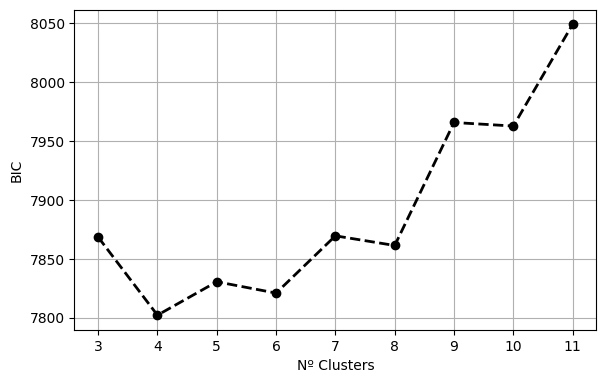

In [12]:
# import datetime

pmra_out, pmdec_out, d_out = pmra[~footprint], pmdec[~footprint], d[~footprint]
C_pm_radec_out, e_d_out = C_pm_radec[~footprint], e_d[~footprint]
# pmra_out, pmdec_out, d_out = pmra[~footprint2], pmdec[~footprint2], d[~footprint2]
# C_pm_radec_out, e_d_out = C_pm_radec[~footprint2], e_d[~footprint2]
    
X = np.vstack([pmra_out, pmdec_out, d_out]).T
Xerr = np.zeros(X.shape + X.shape[-1:])
Xerr[:,:2,:2] = C_pm_radec_out
Xerr[:,2,2] = e_d_out**2

# Start = datetime.datetime.now()

xdgmm = XDGMM()
param_range = np.arange(3,12)#N_lim[0],N_lim[1]
# Loop over component numbers, fitting XDGMM model and computing the BIC:
bic, optimal_n_comp, lowest_bic = xdgmm.bic_test(X, Xerr, param_range)

N_best_xd = optimal_n_comp

# End = datetime.datetime.now()
# print('time: ', End-Start,'\n')

Delta_BIC = np.zeros((len(param_range),len(param_range)))
for i in range(len(param_range)):
    for j in range(len(param_range)):
        Delta_BIC[i,j] = bic[i] - bic[j]

# print('BIC:', bic)
print('\nN_best:', optimal_n_comp,'\n')
i_best_xd = np.where(param_range == optimal_n_comp)[0][0]
print('Delta_BIC[N_best]:', Delta_BIC[:,i_best_xd],'\n')
bla = np.abs(Delta_BIC)<10
print('Delta_BIC<10:\n',bla)


fig = plt.figure(1,figsize=(6,4))
fig.subplots_adjust(wspace=0.3,hspace=0.34,top=0.94,bottom=0.14,left=0.12,right=0.99)
ax = fig.add_subplot(111)
ax.plot(param_range, bic, '--k', marker='o', lw=2, ms=6)
ax.grid()
ax.set_xlabel('Nº Clusters')
ax.set_ylabel('BIC');

In [13]:
# pmra_out, pmdec_out, d_out = pmra[~footprint], pmdec[~footprint], d[~footprint]
X = np.vstack([pmra_out, pmdec_out, d_out]).T
# N_best_xd = 6

gmm_best = GaussianMixture(n_components=N_best_xd, covariance_type='full', max_iter=1000)
gmm_best.fit(X)
print("GMM_{0} converge:".format(N_best_xd), gmm_best.converged_)

np.save('../census/bkg/' + st + 'w' + str(width) + '_gmm_weights', gmm_best.weights_, allow_pickle=False)
np.save('../census/bkg/' + st + 'w' + str(width) + '_gmm_means', gmm_best.means_, allow_pickle=False)
np.save('../census/bkg' + st + 'w' + str(width) + '_gmm_covariances', gmm_best.covariances_, allow_pickle=False)

ll_bgn = gmm_best.score_samples(np.vstack([pmra, pmdec, d]).T) #ln_likelihood del fondo para cada estrella n
# ll_bgn

GMM_4 converge: True


In [14]:
from scipy.optimize import curve_fit

def model(phi1, a, b, c, d, x):
    return a + b*(phi1-x) + c*(phi1-x)**2 + d*(phi1-x)**3

# def model(phi1, a, b, c, x):
#     return a + b*(phi1-x) + c*(phi1-x)**2

params_mu1, _ = curve_fit(model, phi1_t.value, pmphi1_t.value, maxfev=5000)
params_mu2, _ = curve_fit(model, phi1_t.value, pmphi2_t.value, maxfev=5000)
params_d, _ = curve_fit(model, phi1_t.value, d_t, maxfev=5000)

theta = np.array([params_mu1[0], params_mu2[0], params_d[0], 
                  params_mu1[1], params_mu2[1], params_d[1], 
                  params_mu1[2], params_mu2[2], params_d[2], 
                  params_mu1[3], params_mu2[3], params_d[3], 
                  params_mu1[4], params_mu2[4], params_d[4], 
                  0.2])
# theta = np.array([params_mu1[0], params_mu2[0], params_d[0], 
#                   params_mu1[1], params_mu2[1], params_d[1], 
#                   params_mu1[2], params_mu2[2], params_d[2], 
#                   params_mu1[3], params_mu2[3], params_d[3], 
#                   0.2])
theta

array([ 3.84797124e+00,  7.83593222e-01,  2.01159770e+01,  3.74865390e-02,
        4.36367249e-02, -2.19834339e-01, -6.42300036e-04,  2.83199993e-03,
       -6.32700053e-03, -1.99869993e-12, -2.97057423e-13, -1.67794196e-11,
        1.66417231e+00,  1.72517228e+00,  2.02484563e+00,  2.00000000e-01])

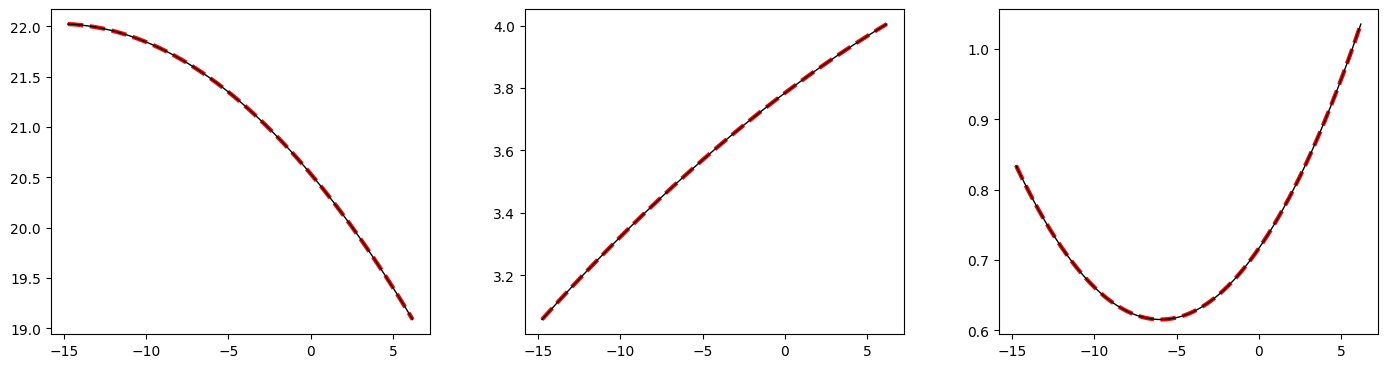

In [15]:
d_ = model(phi1_t.value, params_d[0], params_d[1], params_d[2], params_d[3], params_d[4])
pm1 = model(phi1_t.value, params_mu1[0], params_mu1[1], params_mu1[2], params_mu1[3], params_mu1[4])
pm2 = model(phi1_t.value, params_mu2[0], params_mu2[1], params_mu2[2], params_mu2[3], params_mu2[4])


fig=plt.figure(1,figsize=(15,5))    
fig.subplots_adjust(wspace=0.25,hspace=0.2,top=0.9,bottom=0.25,left=0.095,right=0.98)

ax=fig.add_subplot(131)
ax.plot(phi1_t, d_t,'-k',lw=1)
ax.plot(phi1_t, d_,'--',c='red',lw=3,zorder=1)

ax=fig.add_subplot(132)
ax.plot(phi1_t, pmphi1_t,'-k',lw=1)
ax.plot(phi1_t, pm1,'--',c='red',lw=3,zorder=1)

ax=fig.add_subplot(133)
ax.plot(phi1_t, pmphi2_t,'-k',lw=1)
ax.plot(phi1_t, pm2,'--',c='red',lw=3,zorder=1)


In [16]:
def lnlike_st(theta):

    a_mu1, a_mu2, a_d, b_mu1, b_mu2, b_d, c_mu1, c_mu2, c_d, d_mu1, d_mu2, d_d, x_mu1, x_mu2, x_d, _ = theta

    model_mu1 = model(phi1.value, a_mu1, b_mu1, c_mu1, d_mu1, x_mu1)
    model_mu2 = model(phi1.value, a_mu2, b_mu2, c_mu2, d_mu2, x_mu2)
    model_d = model(phi1.value, a_d, b_d, c_d, d_d, x_d)
    model_ = np.array([model_mu1, model_mu2, model_d])
    
#     a_mu1, a_mu2, a_d, b_mu1, b_mu2, b_d, c_mu1, c_mu2, c_d, x_mu1, x_mu2, x_d, _ = theta

#     model_mu1 = model(phi1.value, a_mu1, b_mu1, c_mu1, x_mu1)
#     model_mu2 = model(phi1.value, a_mu2, b_mu2, c_mu2, x_mu2)
#     model_d = model(phi1.value, a_d, b_d, c_d, x_d)
#     model_ = np.array([model_mu1, model_mu2, model_d])
    
    ll_st = log_multivariate_gaussian(y.T, model_.T, C_tot)
    
    return ll_st

def ln_likelihood(theta):

    f = theta[-1]
    arg1 = np.log(f) + lnlike_st(theta)
    arg2 = np.log(1.-f) + ll_bgn

    return np.logaddexp(arg1, arg2), arg1, arg2

In [17]:
ln_l, arg1 , arg2 = ln_likelihood(theta)


star = (np.exp(ln_l)>0.1) #& footprint
print(star.sum())

18


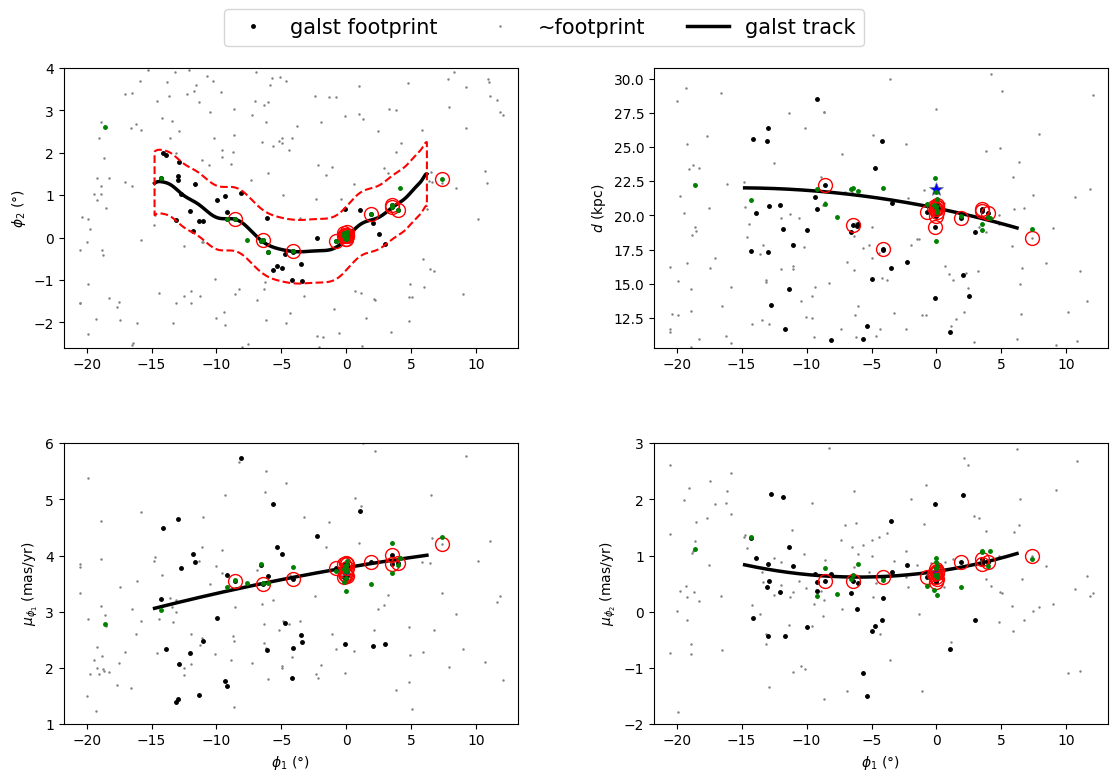

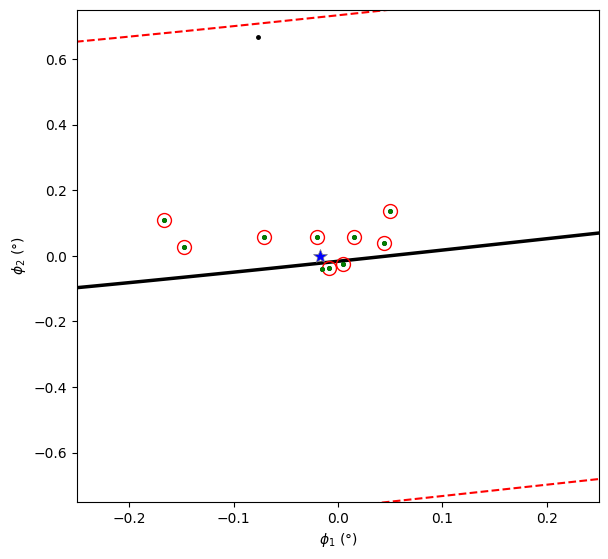

In [19]:
inside = footprint
out = ~footprint

mask_xy = (phi1.value>=phi1_lim[0]) & (phi1.value<phi1_lim[1]) & (phi2.value>=phi2_lim[0]) & (phi2.value<=phi2_lim[1])


fig2=plt.figure(2,figsize=(12,8))
fig2.subplots_adjust(wspace=0.3,hspace=0.34,top=0.95,bottom=0.13,left=0.1,right=0.97)
ax2=fig2.add_subplot(221)
ax2.plot(phi1[inside],phi2[inside],'.', color = 'black', ms=5, label='galst footprint',zorder=0)
ax2.plot(phi1[out],phi2[out],'.',ms=1.5, color = 'gray', label='~footprint')
ax2.plot(phi1_t,phi2_t,'k-',lw=2.5,label='galst track')
ax2.plot(on_poly.transform_to(mwsts[st].stream_frame).phi1, on_poly.transform_to(mwsts[st].stream_frame).phi2, ls='--', lw=1.5, color='red')
ax2.plot(glob_st.phi1, glob_st.phi2, '*', c='gray', mfc='blue',ms=10, mew=.5)
ax2.set_ylabel('$\phi_2$ (°)')
ax2.set_xlim(phi1_lim)
ax2.set_ylim(np.array(phi2_lim)*1.2)

ax2.plot(phi1[star],phi2[star], 'o', c='red', mfc='None', ms=10, mew=1)
ax2.plot(data_PW_st.phi1[star_PW], data_PW_st.phi2[star_PW], '.',c='green',ms=5)  

ax2=fig2.add_subplot(222)
ax2.plot(phi1[inside & mask_xy],d[inside & mask_xy],'.',color='black',ms=5,zorder=1)
ax2.plot(phi1[out & mask_xy],d[out & mask_xy],'.', color='gray',ms=1.5,zorder=0)
ax2.plot(phi1_t,d_t,'k-',lw=2.5)
ax2.plot(glob_st.phi1, glob_st.distance, '*', c='gray', mfc='blue',ms=10, mew=.5)
ax2.set_ylabel('$d$ (kpc)')
ax2.set_xlim(phi1_lim)
ax2.set_ylim(d_lim)

ax2.plot(phi1[star],d[star], 'o', c='red', mfc='None', ms=10, mew=1)
ax2.plot(data_PW_st.phi1[star_PW], data_PW_g.distance[star_PW], '.',c='green',ms=5)  



ax2=fig2.add_subplot(223)
ax2.plot(phi1[inside & mask_xy],pmphi1[inside & mask_xy],'.', color='black',ms=5,zorder=1)
ax2.plot(phi1[out & mask_xy],pmphi1[out & mask_xy],'.', color='gray',ms=1.5,zorder=0)
ax2.plot(phi1_t,pmphi1_t,'k-',lw=2.5)
ax2.plot(glob_st.phi1, glob_st.pm_phi1_cosphi2, '*', c='gray', mfc='blue',ms=10, mew=.5)
ax2.set_xlabel('$\phi_1$ (°)')
ax2.set_ylabel('$\mu_{\phi_1}$ (mas/yr)')
ax2.set_xlim(phi1_lim)
ax2.set_ylim([1,6])

ax2.plot(phi1[star],pmphi1[star], 'o', c='red', mfc='None', ms=10, mew=1)
ax2.plot(data_PW_st.phi1[star_PW], data_PW_st.pm_phi1_cosphi2[star_PW], '.',c='green',ms=5)  


ax2=fig2.add_subplot(224)
ax2.plot(phi1[inside & mask_xy],pmphi2[inside & mask_xy],'.',color='black',ms=5,zorder=1)
ax2.plot(phi1[out & mask_xy],pmphi2[out & mask_xy],'.',color='gray',ms=1.5,zorder=0)
ax2.plot(phi1_t,pmphi2_t,'k-',lw=2.5)
ax2.plot(glob_st.phi1, glob_st.pm_phi2, '*', c='gray', mfc='blue',ms=10, mew=.5)
ax2.set_xlabel('$\phi_1$ (°)')
ax2.set_ylabel('$\mu_{\phi_2}$ (mas/yr)')
ax2.set_xlim(phi1_lim)
ax2.set_ylim([-2.,3]);

ax2.plot(phi1[star],pmphi2[star], 'o', c='red', mfc='None', ms=10, mew=1)
ax2.plot(data_PW_st.phi1[star_PW], data_PW_st.pm_phi2[star_PW], '.',c='green',ms=5)  


fig2.legend(bbox_to_anchor=(0.5,1) , loc='center', ncol=5, fontsize=15);


fig3=plt.figure(3,figsize=(6,6))
fig3.subplots_adjust(wspace=0.3,hspace=0.34,top=0.95,bottom=0.13,left=0.1,right=0.97)
ax3=fig3.add_subplot(111)
ax3.plot(phi1[inside],phi2[inside],'.', color = 'black', ms=5, label='galst footprint',zorder=0)
ax3.plot(phi1[out],phi2[out],'.',ms=1.5, color = 'gray', label='~footprint')
ax3.plot(phi1_t,phi2_t,'k-',lw=2.5,label='galst track')
ax3.plot(on_poly.transform_to(mwsts[st].stream_frame).phi1, on_poly.transform_to(mwsts[st].stream_frame).phi2, ls='--', lw=1.5, color='red')
ax3.plot(glob_st.phi1, glob_st.phi2, '*', c='gray', mfc='blue',ms=10, mew=.5)
ax3.set_xlabel('$\phi_1$ (°)')
ax3.set_ylabel('$\phi_2$ (°)')
ax3.set_xlim(-.25,.25)
ax3.set_ylim(-.75,.75)

ax3.plot(phi1[star],phi2[star], 'o', c='red', mfc='None', ms=10, mew=1)
ax3.plot(data_PW_st.phi1[star_PW], data_PW_st.phi2[star_PW], '.',c='green',ms=5)  

# Todos